# Linear Regression
Try to find a function that can predict the temperature by using salnty.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sympy import diff, symbols, lambdify
from sympy.abc import x, y
from sklearn import preprocessing

In [2]:
data = pd.read_csv('/Users/yuwenchen/Desktop/2190_3685_bundle_archive/bottle.csv')
data = pd.DataFrame(data)

/Users/yuwenchen/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.head()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Cleaning
Simply drop the null value.

In [4]:
# predict the water temperature based on salinity
att = data[['T_degC', 'Salnty']]

# remove NAN values
att = att.dropna()

# reset the index
att = att.reset_index(drop=True)

In [5]:
# 0-1 normalization
def normalization (x):
    return (x - min(x)) / (max(x) - min(x))

In [6]:
att['nor_Salnty'] = normalization(att['Salnty'])
att['nor_T_degC'] = normalization(att['T_degC'])

In [7]:
batchSize = 1000

In [8]:
x_data = att['nor_Salnty'].loc[:batchSize].tolist()
y_data = att['nor_T_degC'].loc[:batchSize].tolist()

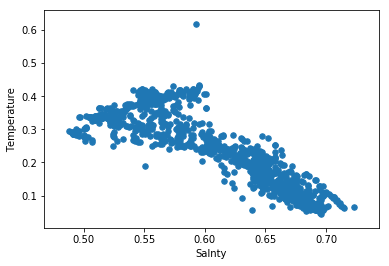

In [9]:
plt.scatter(x_data, y_data, s = 30)
plt.xlabel('Salnty')
plt.ylabel('Temperature')
plt.show()

# Traning Phase
Use Gradient Descent to train the linear model *y = wx + b*.
Randomly generate w and b between -1 and 1.
Use Adagrad for learning rate.

In [26]:
b = 1.06 # initial b
w = -0.6 # initial w
lr = 0.001 # learning rate
iteration = 50000

# store initial vlaues for plotting
b_history = []
w_history = []
loss_history = []

# set the learning rate be different
lr_b = 0
lr_w = 0

x, y, w1, b1 = symbols('x, y, w1, b1')
lossf = (y - (b1 + w1*x))**2
diff_b = lambdify([x, y, w1, b1], diff(lossf, b1))
diff_w = lambdify([x, y, w1, b1], diff(lossf, w1))

# interation start, use gradient descent to find the best b and w that can let the output be the least 
for i in range(iteration):
    b_grad = 0.0
    w_grad = 0.0
    loss = 0.0

    for n in range(len(x_data)):
        
        # compute the loss
        loss = loss + (y_data[n] - (b + w*x_data[n]))**2
        
        # compute ∂L/∂w 
        b_grad = b_grad + diff_b(x_data[n], y_data[n], w, b)
        
        # compute ∂L/∂b
        w_grad = w_grad + diff_w(x_data[n], y_data[n], w, b)
    
    # use Adagrad for leanring rate
    lr_b = lr_b + b_grad ** 2
    lr_w = lr_w + w_grad ** 2
    
    b = b - lr/np.sqrt(lr_b) * b_grad
    w = w - lr/np.sqrt(lr_w) * w_grad
    
    print(b, w, loss)
    
    # for plotting
    loss_history.append(loss)
    b_history.append(b)
    w_history.append(w)

1.0590000000000002 -0.601 215.38831810277668
1.0582941423407004 -0.6017058682533479 213.91222093434195
1.0577184345351027 -0.6022815900112352 212.8734273415227
1.0572202678645624 -0.6027797722766901 212.02808515015172
1.056775000064554 -0.6032250566483582 211.29798799219122
1.056368771706098 -0.6036313022288187 210.64650717108213
1.0559928797608453 -0.6040072118624668 210.05304289710605
1.055641438202877 -0.6043586714613745 209.50465998527352
1.0553102472362554 -0.6046898807461086 208.99261034455355
1.054996186281577 -0.6050039602435662 208.5106521657031
1.0546968617936 -0.6053033034609208 208.05414766881717
1.0544103902791497 -0.6055897938628444 207.61953963937984
1.0541352580514127 -0.6058649451142389 207.20402892450676
1.053870226962375 -0.606129995345895 206.8053659868764
1.0536142689382857 -0.6063859726177679 206.42171079743702
1.053366519244171 -0.6066337416536012 206.0515355383478
1.053126242319033 -0.6068740380051202 205.69355514277154
1.052892806281768 -0.6071074935456774 205.

1.0365731049531468 -0.6234301666020898 182.2749569228515
1.0364964805736963 -0.6235068128696257 182.17061236776223
1.0364201025064954 -0.6235832128332326 182.06663580301992
1.0363439684692637 -0.6236593687751625 181.9630237879096
1.0362680762147753 -0.6237352829426132 181.8597729349204
1.0361924235301103 -0.6238109575484768 181.75687990859825
1.0361170082359255 -0.6238863947720691 181.6543414244348
1.0360418281857455 -0.6239615967598381 181.55215424778416
1.0359668812652734 -0.6240365656260543 181.45031519281116
1.0358921653917181 -0.6241113034534816 181.3488211214648
1.0358176785131425 -0.6241858122940315 181.24766894248143
1.035743418607826 -0.6242600941693982 181.14685561041432
1.035669383683646 -0.6243341510716789 181.0463781246901
1.0355955717774739 -0.6244079849639766 180.94623352868683
1.0355219809545884 -0.6244815977809876 180.8464189088377
1.0354486093081032 -0.6245549914295733 180.74693139376055
1.035375454958409 -0.6246281677893184 180.64776815340818
1.035302516052631 -0.624

1.026263088719836 -0.6337438693080739 168.52326695151757
1.0262100180749567 -0.6337969629643078 168.4539602786736
1.026157033227228 -0.6338499708292604 168.3847806107215
1.0261041337823205 -0.6339028932972536 168.31572735863253
1.0260513193489202 -0.6339557307595927 168.24679993790275
1.0259985895386976 -0.6340084836045994 168.17799776850222
1.0259459439662753 -0.6340611522176431 168.1093202748305
1.0258933822491965 -0.6341137369811726 168.04076688566636
1.0258409040078946 -0.6341662382747465 167.97233703412337
1.0257885088656626 -0.6342186564750641 167.9040301576031
1.0257361964486227 -0.6342709919559956 167.83584569774962
1.0256839663856967 -0.634323245088611 167.76778310040572
1.0256318183085769 -0.6343754162412104 167.69984181556842
1.0255797518516974 -0.634427505779352 167.6320212973447
1.025527766652205 -0.6344795140658812 167.56432100391157
1.0254758623499318 -0.6345314414609583 167.49674039746822
1.0254240385873672 -0.6345832883220865 167.42927894420134
1.02537229500963 -0.6346

1.0186157578591624 -0.6413949759520284 158.690277472696
1.0185728725771925 -0.6414378851073335 158.63600597470938
1.018530034244964 -0.6414807473178329 158.5818035561569
1.0184872427182163 -0.6415235627277827 158.5276700023839
1.0184444978534288 -0.6415663314806997 158.4736050998382
1.018401799507814 -0.6416090537193673 158.41960863606542
1.0183591475393132 -0.6416517295858399 158.36568039969723
1.0183165418065907 -0.6416943592214491 158.31182018044677
1.0182739821690292 -0.641736942766808 158.2580277690991
1.0182314684867246 -0.6417794803618168 158.204302957504
1.0181890006204808 -0.6418219721456675 158.15064553856925
1.0181465784318042 -0.6418644182568494 158.09705530625064
1.0181042017829 -0.6419068188331534 158.04353205554796
1.0180618705366662 -0.6419491740116775 157.99007558249505
1.0180195845566888 -0.6419914839288315 157.93668568415396
1.0179773437072377 -0.6420337487203418 157.88336215860713
1.0179351478532612 -0.6420759685212558 157.8301048049494
1.0178929968603816 -0.6421181

1.0124181837458788 -0.6475963316693109 150.9474264944178
1.0123812389495024 -0.6476333010656445 150.90187415536622
1.0123443251088649 -0.647670239510655 150.85636712493934
1.0123074421520089 -0.6477071470762968 150.81090529633713
1.0122705900072564 -0.6477440238342451 150.76548856317552
1.0122337686032075 -0.6477808698558974 150.72011681948612
1.012196977868738 -0.6478176852123751 150.67478995970959
1.0121602177329991 -0.6478544699745247 150.6295078786977
1.0121234881254146 -0.6478912242129193 150.5842704717079
1.0120867889756806 -0.6479279479978606 150.53907763440407
1.012050120213763 -0.6479646413993796 150.49392926285114
1.0120134817698971 -0.6480013044872388 150.44882525351474
1.0119768735745853 -0.6480379373309331 150.4037655032598
1.0119402955585959 -0.6480745399996913 150.35874990934718
1.011903747652962 -0.648111112562478 150.31377836943
1.01186722978898 -0.6481476550879942 150.26885078155655
1.0118307418982075 -0.6481841676446796 150.22396704416266
1.0117942839124632 -0.648220

1.0067279776747857 -0.653290629396568 144.01566185529728
1.006695313383125 -0.6533233189807962 143.97635913873432
1.0066626711258095 -0.6533559865347298 143.937088502722
1.0066300508620767 -0.6533886320991298 143.89784988688928
1.00659745255129 -0.6534212557146308 143.85864323105193
1.006564876152938 -0.6534538574217422 143.81946847521357
1.0065323216266346 -0.6534864372608484 143.78032555956287
1.0064997889321181 -0.6535189952722094 143.74121442447375
1.0064672780292505 -0.653551531495961 143.70213501050387
1.0064347888780172 -0.6535840459721161 143.66308725839502
1.0064023214385267 -0.6536165387405645 143.624071109071
1.0063698756710096 -0.6536490098410738 143.58508650363802
1.0063374515358179 -0.6536814593132898 143.54613338338208
1.0063050489934255 -0.6537138871967371 143.50721168977128
1.006272668004427 -0.6537462935308195 143.46832136445187
1.0062403085295364 -0.6537786783548206 143.4294623492489
1.0062079705295883 -0.6538110417079044 143.3906345861662
1.0061756539655362 -0.65384

1.0012862253991497 -0.658736894015655 137.54480799428154
1.0012569063044927 -0.6587662390901062 137.510362782058
1.0012276036188876 -0.6587955677592773 137.47594132690662
1.001198317317444 -0.6588248800480572 137.44154359203742
1.0011690473753347 -0.6588541759812715 137.4071695407556
1.0011397937677957 -0.6588834555836831 137.37281913645825
1.0011105564701257 -0.658912718879992 137.33849234263644
1.0010813354576857 -0.6589419658948358 137.30418912287428
1.0010521307058993 -0.6589711966527896 137.26990944084787
1.0010229421902517 -0.6590004111783666 137.2356532603257
1.0009937698862905 -0.6590296094960182 137.20142054516722
1.0009646137696246 -0.659058791630134 137.16721125932526
1.0009354738159244 -0.6590879576050424 137.1330253668413
1.0009063500009214 -0.6591171074450102 137.0988628318501
1.0008772423004084 -0.6591462411742436 137.06472361857502
1.0008481506902387 -0.6591753588168878 137.03060769133094
1.0008190751463262 -0.6592044603970277 136.99651501452195
1.0007900156446452 -0.65

0.9970320657838324 -0.6629950185733444 132.5937046156267
0.9970049739942978 -0.6630221368979581 132.56247670757978
0.996977895463009 -0.6630492419679147 132.53126790300058
0.9969508301725514 -0.6630763338006279 132.5000781761911
0.9969237781055488 -0.6631034124134728 132.46890750150823
0.9968967392446629 -0.6631304778237865 132.43775585336672
0.9968697135725939 -0.663157530048868 132.40662320623753
0.9968427010720795 -0.6631845691059782 132.37550953464742
0.9968157017258956 -0.6632115950123404 132.34441481317967
0.9967887155168558 -0.6632386077851399 132.31333901647326
0.996761742427811 -0.6632656074415244 132.28228211922405
0.99673478244165 -0.6632925939986044 132.2512440961815
0.9967078355412988 -0.6633195674734527 132.22022492215197
0.9966809017097207 -0.6633465278831049 132.1892245719964
0.9966539809299161 -0.6633734752445596 132.1582430206316
0.9966270731849225 -0.6634004095747782 132.12728024302845
0.9966001784578143 -0.6634273308906852 132.09633621421258
0.9965732967317029 -0.66

0.9927295410156057 -0.6673019694345111 127.68221678186043
0.9927044262684079 -0.6673271112953504 127.65383036794347
0.9926793223497544 -0.6673522423310742 127.62545947473531
0.9926542292472429 -0.6673773625540839 127.5971040839639
0.9926291469484949 -0.6674024719767572 127.56876417739147
0.9926040754411557 -0.667427570611448 127.54043973681715
0.9925790147128942 -0.6674526584704864 127.51213074407427
0.992553964751403 -0.6674777355661791 127.4838371810309
0.9925289255443982 -0.6675028019108089 127.4555590295908
0.9925038970796195 -0.6675278575166355 127.42729627169163
0.99247887934483 -0.6675529023958947 127.39904888930609
0.9924538723278161 -0.6675779365607993 127.37081686444205
0.9924288760163876 -0.6676029600235387 127.34260017914127
0.9924038903983776 -0.667627972796279 127.31439881547986
0.9923789154616424 -0.6676529748911629 127.28621275556917
0.9923539511940611 -0.6676779663203105 127.25804198155329
0.9923289975835363 -0.6677029470958183 127.22988647561212
0.9923040546179933 -0.

0.9886532406127633 -0.6713828723854379 123.11787870993157
0.9886297877286044 -0.6714063529478412 123.09186809825742
0.9886063438800544 -0.6714298244779319 123.06587036782012
0.9885829090579602 -0.6714532869848622 123.03988550515678
0.9885594832531845 -0.6714767404777687 123.01391349682739
0.9885360664566054 -0.6715001849657726 122.98795432941446
0.9885126586591165 -0.6715236204579795 122.96200798952452
0.988489259851627 -0.6715470469634798 122.93607446378614
0.9884658700250611 -0.671570464491348 122.91015373885055
0.988442489170359 -0.6715938730506438 122.88424580139217
0.9884191172784759 -0.6716172726504109 122.85835063810792
0.9883957543403821 -0.6716406632996784 122.8324682357177
0.9883724003470635 -0.6716640450074597 122.80659858096321
0.9883490552895212 -0.671687417782753 122.78074166060952
0.9883257191587714 -0.6717107816345413 122.7548974614435
0.9883023919458456 -0.6717341365717927 122.72906597027539
0.98827907364179 -0.6717574826034599 122.70324717393649
0.9882557642376666 -0.

0.9850099614065623 -0.6750306215769308 119.1115745476308
0.9849878473312078 -0.6750527638492843 119.08746778700635
0.984965741002805 -0.6750748983778767 119.0633720135027
0.9849436424142857 -0.6750970251697755 119.03928721673942
0.9849215515585928 -0.6751191442320372 119.01521338635153
0.9848994684286801 -0.6751412555717076 118.99115051199074
0.9848773930175121 -0.6751633591958214 118.9670985833244
0.9848553253180639 -0.6751854551114028 118.94305759003585
0.9848332653233215 -0.6752075433254654 118.919027521824
0.9848112130262816 -0.6752296238450117 118.89500836840433
0.9847891684199517 -0.6752516966770339 118.87100011950729
0.9847671314973497 -0.6752737618285131 118.84700276487914
0.9847451022515045 -0.67529581930642 118.82301629428294
0.9847230806754553 -0.6753178691177149 118.79904069749614
0.9847010667622522 -0.675339911269347 118.7750759643125
0.9846790605049557 -0.6753619457682553 118.75112208454163
0.9846570618966368 -0.675383972621368 118.72717904800814
0.9846350709303773 -0.675

0.9816077184719457 -0.6784373588323794 115.43265995908246
0.981586747203191 -0.6784583587950715 115.41016994529389
0.9815657826854849 -0.6784793520098165 115.38768945699385
0.9815448249132196 -0.6785003384822216 115.36521848595787
0.9815238738807949 -0.6785213182178865 115.3427570239734
0.9815029295826183 -0.6785422912224031 115.32030506283986
0.9814819920131055 -0.6785632575013553 115.2978625943671
0.9814610611666795 -0.6785842170603194 115.2754296103769
0.9814401370377716 -0.6786051699048639 115.253006102703
0.9814192196208203 -0.6786261160405493 115.23059206318965
0.9813983089102725 -0.6786470554729289 115.20818748369359
0.9813774049005821 -0.6786679882075477 115.18579235608229
0.9813565075862112 -0.6786889142499432 115.16340667223473
0.9813356169616294 -0.6787098336056452 115.14103042404167
0.9813147330213142 -0.6787307462801759 115.11866360340441
0.9812938557597506 -0.6787516522790499 115.09630620223601
0.9812729851714311 -0.6787725516077737 115.07395821246091
0.9812521212508561 -

0.9779762957856517 -0.6820739374311342 111.57232971159739
0.9779564445312923 -0.6820938179236541 111.5514155227462
0.9779365991404151 -0.6821136925557069 111.53050955876618
0.9779167596085966 -0.6821335613317155 111.5096118131803
0.9778969259314189 -0.6821534242560978 111.48872227952039
0.9778770981044695 -0.6821732813332655 111.46784095132585
0.9778572761233418 -0.6821931325676248 111.44696782214541
0.9778374599836346 -0.6822129779635766 111.42610288553534
0.9778176496809522 -0.682232817525516 111.4052461350599
0.9777978452109046 -0.6822526512578326 111.3843975642924
0.9777780465691074 -0.6822724791649104 111.36355716681337
0.9777582537511815 -0.6822923012511278 111.34272493621225
0.9777384667527538 -0.6823121175208579 111.32190086608651
0.9777186855694562 -0.6823319279784679 111.3010849500413
0.9776989101969265 -0.6823517326283198 111.28027718169034
0.9776791406308079 -0.68237153147477 111.25947755465576
0.977659376866749 -0.6823913245221693 111.23868606256733
0.977639618900404 -0.68

0.9747202743320197 -0.6853349128546659 108.16934783375737
0.9747013501518985 -0.6853538667734603 108.1497305590468
0.9746824311638218 -0.6853728155031549 108.13012052686368
0.9746635173641855 -0.685391759047353 108.11051773193941
0.9746446087493899 -0.6854106974096544 108.0909221690117
0.9746257053158391 -0.6854296305936541 108.0713338328241
0.974606807059942 -0.6854485586029432 108.05175271812685
0.9745879139781111 -0.6854674814411085 108.03217881967537
0.9745690260667634 -0.6854863991117327 108.0126121322326
0.9745501433223203 -0.6855053116183942 107.99305265056667
0.9745312657412067 -0.6855242189646674 107.97350036945235
0.9745123933198525 -0.6855431211541223 107.9539552836701
0.9744935260546911 -0.6855620181903249 107.93441738800718
0.9744746639421603 -0.6855809100768371 107.91488667725604
0.9744558069787022 -0.6855997968172164 107.89536314621604
0.9744369551607627 -0.6856186784150164 107.87584678969246
0.9744181084847922 -0.6856375548737866 107.85633760249655
0.9743992669472449 -0

0.9718287326470988 -0.6882311291342681 105.19348573021827
0.9718105773151883 -0.6882493146596141 105.17493821825592
0.9717924266600911 -0.6882674955110334 105.15639719613229
0.9717742806787856 -0.6882856716915472 105.13786265943625
0.9717561393682531 -0.6883038432041737 105.11933460376204
0.9717380027254787 -0.6883220100519276 105.10081302470796
0.9717198707474506 -0.6883401722378204 105.08229791787731
0.97170174343116 -0.6883583297648604 105.06378927887832
0.9716836207736017 -0.6883764826360526 105.04528710332434
0.9716655027717738 -0.6883946308543984 105.026791386833
0.9716473894226773 -0.6884127744228966 105.00830212502721
0.9716292807233168 -0.6884309133445421 104.98981931353394
0.9716111766707 -0.6884490476223268 104.97134294798602
0.9715930772618379 -0.6884671772592396 104.95287302402009
0.9715749824937447 -0.6884853022582657 104.93440953727801
0.971556892363438 -0.6885034226223874 104.91595248340668
0.9715388068679385 -0.6885215383545836 104.89750185805671
0.97152072600427 -0.68

0.9687376035955588 -0.6913275549946664 102.0602607434367
0.9687202192168615 -0.6913449700639773 102.0427799976303
0.9687028390347562 -0.6913623809395252 102.02530504117048
0.9686854630467262 -0.6913797876238265 102.00783587038913
0.9686680912502573 -0.6913971901193949 101.99037248162195
0.968650723642838 -0.6914145884287419 101.97291487120808
0.968633360221959 -0.6914319825543763 101.95546303549091
0.9686160009851138 -0.6914493724988043 101.93801697081666
0.9685986459297984 -0.6914667582645296 101.9205766735365
0.9685812950535113 -0.6914841398540534 101.90314214000477
0.9685639483537535 -0.6915015172698744 101.88571336657924
0.9685466058280285 -0.6915188905144888 101.86829034962163
0.9685292674738425 -0.6915362595903901 101.85087308549731
0.968511933288704 -0.6915536245000695 101.83346157057565
0.968494603270124 -0.6915709852460156 101.81605580122904
0.9684772774156163 -0.6915883418307144 101.7986557738344
0.9684599557226968 -0.6916056942566495 101.78126148477142
0.9684426381888843 -0.

0.9659576433192698 -0.6941125549768632 99.28483844765545
0.9659409114651754 -0.6941293179787211 99.26825544728064
0.965924183428699 -0.6941460771657417 99.25167768429897
0.9659074592076958 -0.6941628325400696 99.23510515558807
0.965890738800023 -0.6941795841038474 99.21853785803007
0.9658740222035397 -0.6941963318592155 99.20197578850943
0.9658573094161073 -0.6942130758083125 99.18541894391366
0.9658406004355888 -0.6942298159532748 99.1688673211329
0.9658238952598498 -0.6942465522962369 99.15232091706089
0.9658071938867574 -0.6942632848393311 99.13577972859417
0.965790496314181 -0.6942800135846877 99.11924375263197
0.965773802539992 -0.6942967385344353 99.10271298607638
0.9657571125620636 -0.6943134596907001 99.08618742583299
0.9657404263782714 -0.6943301770556065 99.06966706881015
0.9657237439864926 -0.6943468906312769 99.05315191191899
0.9657070653846067 -0.6943636004198315 99.0366419520736
0.9656903905704951 -0.6943803064233887 99.02013718619135
0.9656737195420412 -0.694397008644064

0.963198642976879 -0.6968768269395925 96.570033375814
0.9631825238928313 -0.6968929776347641 96.55428867049744
0.9631664082926635 -0.6969091248487918 96.53854871723695
0.9631502961745382 -0.6969252685835127 96.52281351336322
0.9631341875366194 -0.6969414088407624 96.50708305620809
0.9631180823770729 -0.696957545622375 96.4913573431064
0.9631019806940662 -0.6969736789301827 96.47563637139541
0.9630858824857682 -0.6969898087660162 96.45992013841472
0.9630697877503498 -0.6970059351317047 96.44420864150622
0.9630536964859832 -0.6970220580290756 96.42850187801442
0.9630376086908422 -0.6970381774599546 96.41279984528562
0.9630215243631026 -0.6970542934261659 96.39710254066925
0.9630054435009415 -0.6970704059295321 96.38140996151684
0.9629893661025377 -0.6970865149718741 96.36572210518227
0.9629732921660715 -0.6971026205550114 96.35003896902184
0.9629572216897252 -0.6971187226807615 96.33436055039395
0.9629411546716823 -0.6971348213509406 96.31868684665973
0.962925091110128 -0.697150916567363

0.960725083075549 -0.6993553510994664 94.16970964943026
0.9607094862323002 -0.6993709799776637 94.15467540900121
0.9606938926048998 -0.6993866056427106 94.1396455314256
0.9606783021917431 -0.6994022280962116 94.1246200143746
0.9606627149912268 -0.6994178473397697 94.1095988555217
0.9606471310017489 -0.6994334633749868 94.09458205254325
0.9606315502217089 -0.6994490762034632 94.0795696031158
0.9606159726495073 -0.699464685826798 94.06456150491947
0.9606003982835463 -0.6994802922465888 94.04955775563566
0.9605848271222293 -0.699495895464432 94.03455835294722
0.9605692591639611 -0.6995114954819227 94.01956329454079
0.9605536944071478 -0.6995270923006545 94.004572578103
0.9605381328501967 -0.6995426859222196 93.98958620132338
0.9605225744915169 -0.6995582763482091 93.97460416189303
0.9605070193295183 -0.6995738635802127 93.95962645750575
0.9604914673626124 -0.6995894476198186 93.9446530858567
0.960475918589212 -0.6996050284686137 93.92968404464251
0.9604603730077312 -0.6996206061281838 93.

0.9582845579319559 -0.7018010035405586 91.8325857692777
0.9582694531037189 -0.701816140829898 91.81821722414008
0.9582543512522125 -0.7018312751451693 91.80385269514099
0.9582392523760288 -0.7018464064877804 91.78949218023985
0.9582241564737611 -0.7018615348591377 91.7751356773988
0.9582090635440039 -0.7018766602606467 91.76078318458116
0.9581939735853526 -0.7018917826937114 91.74643469975214
0.9581788865964039 -0.7019069021597353 91.73209022087906
0.9581638025757555 -0.7019220186601202 91.71774974592918
0.9581487215220063 -0.7019371321962671 91.70341327287345
0.9581336434337562 -0.7019522427695757 91.68908079968323
0.9581185683096065 -0.7019673503814448 91.67475232433182
0.9581034961481594 -0.7019824550332718 91.6604278447946
0.9580884269480182 -0.7019975567264533 91.64610735904787
0.9580733607077874 -0.7020126554623844 91.6317908650698
0.9580582974260725 -0.7020277512424595 91.61747836084035
0.9580432371014803 -0.7020428440680716 91.60316984434088
0.9580281797326187 -0.70205793394061

0.9559047349257345 -0.7041860540523202 89.58337929095936
0.955890089190073 -0.7042007326724716 89.5696284417517
0.9558754462194273 -0.7042154085302372 89.55588130215354
0.9558608060125551 -0.7042300816268592 89.54213787036755
0.9558461685682148 -0.7042447519635787 89.52839814459786
0.955831533885166 -0.7042594195416361 89.5146621230498
0.9558169019621691 -0.7042740843622706 89.50092980393005
0.9558022727979856 -0.7042887464267207 89.48720118544647
0.9557876463913777 -0.7043034057362239 89.47347626580937
0.9557730227411089 -0.7043180622920165 89.45975504322881
0.9557584018459433 -0.7043327160953344 89.4460375159178
0.9557437837046461 -0.7043473671474121 89.43232368208962
0.9557291683159833 -0.7043620154494832 89.4186135399592
0.9557145556787221 -0.7043766610027805 89.40490708774335
0.9556999457916304 -0.7043913038085359 89.3912043236594
0.9556853386534772 -0.7044059438679803 89.37750524592677
0.9556707342630322 -0.7044205811823435 89.36380985276588
0.9556561326190662 -0.7044352157528547

0.953666911352607 -0.7064290059922239 87.49520886375015
0.953652679920214 -0.7064432707144592 87.48201236275868
0.9536384510709783 -0.7064575328561379 87.46881930846223
0.953624224803793 -0.7064717924183667 87.45562969926097
0.9536100011175519 -0.7064860494022515 87.44244353355707
0.9535957800111495 -0.7065003038088975 87.42926080975388
0.9535815614834815 -0.7065145556394091 87.41608152625558
0.9535673455334439 -0.70652880489489 87.40290568146793
0.953553132159934 -0.7065430515764428 87.38973327379725
0.9535389213618494 -0.7065572956851696 87.37656430165192
0.9535247131380888 -0.7065715372221714 87.3633987634406
0.9535105074875518 -0.7065857761885487 87.35023665757366
0.9534963044091386 -0.7066000125854011 87.33707798246256
0.9534821039017501 -0.7066142464138272 87.32392273651973
0.9534679059642883 -0.7066284776749251 87.31077091815897
0.9534537105956558 -0.706642706369792 87.29762252579525
0.9534395177947559 -0.7066569324995242 87.28447755784424
0.953425327560493 -0.7066711560652175 8

0.9512285946842188 -0.7088731540809686 85.24955591490958
0.9512147967257186 -0.7088869857791493 85.23693604329465
0.9512010011692057 -0.708900815077913 85.22431935685736
0.9511872080137015 -0.7089146419782381 85.21170585418696
0.9511734172582282 -0.7089284664811019 85.19909553387289
0.9511596289018089 -0.7089422885874814 85.18648839450579
0.9511458429434673 -0.708956108298353 85.17388443467831
0.9511320593822274 -0.708969925614692 85.1612836529824
0.9511182782171144 -0.7089837405374734 85.14868604801237
0.9511044994471537 -0.7089975530676713 85.13609161836287
0.9510907230713718 -0.7090113632062595 85.12350036262931
0.9510769490887955 -0.7090251709542106 85.11091227940894
0.9510631774984526 -0.7090389763124968 85.09832736729919
0.9510494082993713 -0.7090527792820898 85.08574562489892
0.9510356414905807 -0.7090665798639603 85.07316705080767
0.9510218770711104 -0.7090803780590784 85.06059164362603
0.9510081150399907 -0.7090941738684138 85.04801940195584
0.9509943553962527 -0.7091079672929

0.9491314376803104 -0.7109755371764049 83.34279960445107
0.9491179984907199 -0.7109890104995494 83.33065419503002
0.9491045615600375 -0.7110024815663308 83.31851176457492
0.949091126887382 -0.7110159503776305 83.30637231181625
0.9490776944718722 -0.7110294169343293 83.29423583548528
0.9490642643126279 -0.7110428812373073 83.2821023343144
0.9490508364087694 -0.711056343287444 83.26997180703657
0.9490374107594176 -0.7110698030856185 83.25784425238577
0.9490239873636939 -0.7110832606327092 83.24571966909679
0.9490105662207202 -0.7110967159295939 83.23359805590495
0.9489971473296193 -0.7111101689771498 83.22147941154721
0.9489837306895141 -0.7111236197762537 83.20936373476064
0.9489703162995287 -0.7111370683277816 83.1972510242834
0.9489569041587871 -0.7111505146326089 83.18514127885446
0.9489434942664143 -0.7111639586916108 83.1730344972137
0.948930086621536 -0.7111774005056614 83.16093067810213
0.9489166812232781 -0.7111908400756345 83.14882982026093
0.9489032780707672 -0.711204277402403

0.9470224157946102 -0.7130900181658032 81.44828506417697
0.9470093250698631 -0.7131031434268613 81.43659790587267
0.9469962364708682 -0.7131162665646884 81.42491353490963
0.9469831499968303 -0.7131293875800793 81.4132319501447
0.9469700656469551 -0.7131425064738283 81.40155315043519
0.9469569834204485 -0.7131556232467292 81.3898771346397
0.9469439033165172 -0.7131687378995755 81.37820390161724
0.9469308253343682 -0.7131818504331597 81.36653345022742
0.946917749473209 -0.7131949608482745 81.35486577933105
0.9469046757322476 -0.7132080691457114 81.3432008877892
0.9468916041106925 -0.7132211753262618 81.33153877446378
0.9468785346077528 -0.7132342793907166 81.31987943821751
0.9468654672226382 -0.713247381339866 81.30822287791415
0.9468524019545586 -0.7132604811744998 81.29656909241734
0.9468393388027245 -0.7132735788954073 81.28491808059256
0.9468262777663472 -0.7132866745033773 81.27326984130515
0.946813218844638 -0.7132997679991983 81.2616243734216
0.9468001620368091 -0.7133128593836577

0.9449161446052387 -0.7152019519573111 79.57928985885147
0.9449033902277835 -0.7152147412801173 79.5680424486937
0.9448906378528669 -0.7152275286028829 79.55679764883473
0.9448778874797706 -0.7152403139263258 79.54555545824395
0.9448651391077771 -0.7152530972511637 79.53431587589057
0.944852392736169 -0.7152658785781139 79.52307890074496
0.9448396483642292 -0.7152786579078929 79.51184453177783
0.9448269059912414 -0.7152914352412172 79.50061276796065
0.9448141656164897 -0.7153042105788026 79.48938360826554
0.9448014272392584 -0.7153169839213646 79.47815705166487
0.9447886908588324 -0.7153297552696181 79.4669330971325
0.9447759564744971 -0.7153425246242776 79.45571174364188
0.944763224085538 -0.7153552919860574 79.44449299016809
0.9447504936912415 -0.7153680573556711 79.43327683568621
0.9447377652908941 -0.715380820733832 79.42206327917206
0.9447250388837829 -0.7153935821212529 79.41085231960231
0.9447123144691953 -0.7154063415186462 79.39964395595375
0.9446995920464193 -0.71541909892672

0.9428009569803872 -0.717323045337453 77.72556176144343
0.9427885292831746 -0.7173355083977871 77.71473889612771
0.9427761034737131 -0.7173479695728457 77.70391847644086
0.9427636795513532 -0.7173604288632782 77.69310050145194
0.9427512575154459 -0.7173728862697336 77.6822849702303
0.9427388373653423 -0.7173853417928605 77.67147188184609
0.9427264191003939 -0.7173977954333072 77.66066123537023
0.9427140027199529 -0.7174102471917215 77.64985302987353
0.9427015882233716 -0.7174226970687511 77.63904726442786
0.9426891756100026 -0.7174351450650428 77.62824393810585
0.9426767648791994 -0.7174475911812436 77.61744304998021
0.9426643560303152 -0.7174600354179997 77.606644599124
0.9426519490627039 -0.7174724777759574 77.59584858461166
0.9426395439757198 -0.717484918255762 77.58505500551733
0.9426271407687176 -0.7174973568580588 77.57426386091608
0.9426147394410522 -0.7175097935834928 77.56347514988383
0.9426023399920791 -0.7175222284327083 77.55268887149676
0.942589942421154 -0.717534661406349

0.9407633370267832 -0.7193665693781484 75.96177847244347
0.9407512140766106 -0.7193787281006716 75.95134923295339
0.9407390929113538 -0.7193908850407339 75.94092229180971
0.9407269735304227 -0.7194030401989254 75.93049764816729
0.9407148559332269 -0.7194151935758363 75.92007530118195
0.9407027401191769 -0.719427345172056 75.90965525000934
0.9406906260876831 -0.7194394949881738 75.89923749380641
0.9406785138381565 -0.7194516430247789 75.88882203173019
0.9406664033700083 -0.7194637892824598 75.8784088629381
0.9406542946826502 -0.7194759337618047 75.86799798658781
0.9406421877754939 -0.7194880764634017 75.85758940183824
0.9406300826479518 -0.7195002173878384 75.84718310784864
0.9406179792994365 -0.7195123565357021 75.83677910377767
0.9406058777293608 -0.7195244939075798 75.8263773887857
0.9405937779371379 -0.7195366295040581 75.8159779620333
0.9405816799221816 -0.7195487633257233 75.80558082268126
0.9405695836839054 -0.7195608953731614 75.79518596989074
0.9405574892217239 -0.7195730256469

0.9389526603983054 -0.721182675366632 74.41252670193485
0.9389408004658414 -0.7211945714407973 74.4024352090357
0.9389289422327665 -0.7212064658180108 74.392345892182
0.9389170856985375 -0.7212183584988153 74.38225875059771
0.9389052308626119 -0.7212302494837535 74.37217378350765
0.9388933777244473 -0.7212421387733675 74.36209099013605
0.9388815262835013 -0.7212540263681995 74.3520103697091
0.9388696765392324 -0.7212659122687911 74.34193192145236
0.9388578284910988 -0.7212777964756838 74.33185564459217
0.9388459821385594 -0.7212896789894186 74.32178153835484
0.9388341374810734 -0.7213015598105365 74.31170960196809
0.9388222945180998 -0.7213134389395779 74.30163983465893
0.9388104532490986 -0.7213253163770831 74.29157223565579
0.9387986136735296 -0.7213371921235919 74.2815068041866
0.9387867757908529 -0.7213490661796442 74.27144353948054
0.9387749396005292 -0.7213609385457792 74.26138244076671
0.9387631051020192 -0.721372809222536 74.25132350727478
0.9387512722947842 -0.7213846782104534

0.9369488778684726 -0.723192673459262 72.71788936502801
0.9369373008735796 -0.7232042870109802 72.70815903973121
0.9369257254893428 -0.7232158989544604 72.69843076379844
0.9369141517152666 -0.7232275092901981 72.68870453652244
0.9369025795508557 -0.7232391180186885 72.67898035719689
0.936891008995615 -0.7232507251404263 72.66925822511578
0.9368794400490498 -0.7232623306559065 72.6595381395735
0.9368678727106655 -0.7232739345656233 72.64982009986436
0.936856306979968 -0.7232855368700708 72.64010410528367
0.9368447428564634 -0.723297137569743 72.63039015512689
0.9368331803396577 -0.7233087366651334 72.62067824868964
0.9368216194290576 -0.7233203341567355 72.6109683852683
0.9368100601241699 -0.7233319300450423 72.60126056415892
0.9367985024245016 -0.7233435243305466 72.59155478465888
0.9367869463295599 -0.7233551170137411 72.58185104606521
0.9367753918388526 -0.723366708095118 72.57214934767592
0.9367638389518874 -0.7233782975751696 72.56244968878887
0.9367522876681723 -0.7233898854543874

0.9350714284516622 -0.725076150439581 71.14900836371316
0.9350601091632427 -0.7250875066799857 71.13960495131182
0.9350487914075528 -0.7250988613900615 71.13020347720952
0.9350374751841375 -0.7251102145702637 71.12080394075821
0.9350261604925415 -0.7251215662210472 71.11140634130923
0.9350148473323101 -0.7251329163428668 71.10201067821502
0.9350035357029886 -0.725144264936177 71.09261695082853
0.9349922256041224 -0.7251556120014322 71.08322515850242
0.9349809170352577 -0.7251669575390864 71.07383530059003
0.9349696099959403 -0.7251783015495935 71.06444737644486
0.9349583044857165 -0.725189644033407 71.05506138542108
0.9349470005041328 -0.7252009849909804 71.04567732687262
0.9349356980507361 -0.7252123244227668 71.0362952001542
0.9349243971250731 -0.7252236623292192 71.02691500462112
0.9349130977266913 -0.7252349987107902 71.01753673962821
0.9349017998551379 -0.7252463335679323 71.00816040453104
0.9348905035099606 -0.7252576669010977 70.99878599868588
0.9348792086907074 -0.7252689987107

0.9332573816090941 -0.7268962147438564 69.6504910013475
0.9332463048411117 -0.7269073288514609 69.64139336435004
0.9332352295349962 -0.7269184414995834 69.63229756482238
0.9332241556903276 -0.7269295526886437 69.62320360216755
0.9332130833066861 -0.7269406624190613 69.61411147578866
0.9332020123836522 -0.7269517706912558 69.60502118508936
0.9331909429208065 -0.7269628775056465 69.59593272947336
0.9331798749177299 -0.7269739828626524 69.586846108345
0.9331688083740035 -0.7269850867626922 69.57776132110844
0.9331577432892084 -0.7269961892061849 69.56867836716867
0.9331466796629262 -0.7270072901935487 69.55959724593035
0.9331356174947385 -0.7270183897252018 69.55051795679921
0.9331245567842272 -0.7270294878015623 69.54144049918072
0.9331134975309745 -0.727040584423048 69.5323648724808
0.9331024397345625 -0.7270516795900764 69.5232910761056
0.9330913833945739 -0.7270627733030652 69.51421910946183
0.9330803285105911 -0.7270738655624315 69.5051489719561
0.9330692750821972 -0.7270849563685922

0.9315793933270143 -0.7285799436619228 68.27957562566274
0.9315685354587722 -0.7285908392335431 68.27075234953062
0.9315576789904564 -0.7286017334076071 68.26193082287816
0.9315468239216769 -0.7286126261845051 68.25311104515205
0.9315359702520439 -0.7286235175646265 68.24429301579838
0.9315251179811678 -0.7286344075483611 68.23547673426445
0.931514267108659 -0.7286452961360981 68.22666219999745
0.9315034176341284 -0.7286561833282268 68.21784941244462
0.9314925695571867 -0.7286670691251362 68.20903837105395
0.9314817228774451 -0.7286779535272152 68.20022907527343
0.9314708775945149 -0.7286888365348523 68.19142152455115
0.9314600337080073 -0.728699718148436 68.18261571833568
0.9314491912175342 -0.7287105983683546 68.17381165607591
0.9314383501227074 -0.7287214771949962 68.16500933722102
0.9314275104231388 -0.7287323546287487 68.15620876122003
0.9314166721184406 -0.7287432306699998 68.14740992752277
0.9314058352082252 -0.728754105319137 68.13861283557921
0.9313949996921052 -0.728764978576

0.9298171381222845 -0.7303484138350235 66.85554996810531
0.9298065047593165 -0.7303590852888674 66.84700639633216
0.9297958727347048 -0.7303697554067103 66.8384644867198
0.9297852420480881 -0.7303804241889135 66.82992423875622
0.9297746126991057 -0.7303910916358377 66.82138565192992
0.9297639846873965 -0.7304017577478438 66.81284872572971
0.9297533580126 -0.7304124225252923 66.80431345964466
0.9297427326743555 -0.7304230859685436 66.79577985316364
0.9297321086723028 -0.7304337480779579 66.78724790577624
0.9297214860060817 -0.7304444088538954 66.77871761697214
0.9297108646753323 -0.7304550682967159 66.77018898624145
0.9297002446796946 -0.7304657264067793 66.76166201307407
0.929689626018809 -0.7304763831844451 66.75313669696054
0.929679008692316 -0.7304870386300727 66.74461303739147
0.9296683926998562 -0.7304976927440214 66.73609103385795
0.9296577780410705 -0.7305083455266503 66.72757068585088
0.9296471647155998 -0.7305189969783182 66.71905199286138
0.9296365527230853 -0.730529647099384

0.9281534375508019 -0.732018161922239 65.52595725907041
0.9281430112733711 -0.7320286266616147 65.51767011320861
0.9281325862792307 -0.7320390901200416 65.50938455154574
0.9281221625680447 -0.7320495522978558 65.50110057360655
0.9281117401394771 -0.7320600131953932 65.49281817891564
0.928101318993192 -0.7320704728129894 65.48453736699784
0.9280908991288539 -0.7320809311509802 65.4762581373784
0.928080480546127 -0.7320913882097009 65.46798048958293
0.9280700632446761 -0.7321018439894869 65.45970442313674
0.928059647224166 -0.7321122984906732 65.45142993756579
0.9280492324842615 -0.7321227517135949 65.4431570323961
0.9280388190246278 -0.7321332036585868 65.43488570715378
0.92802840684493 -0.7321436543259836 65.42661596136563
0.9280179959448336 -0.7321541037161199 65.4183477945581
0.9280075863240039 -0.73216455182933 65.41008120625817
0.9279971779821068 -0.7321749986659483 65.40181619599286
0.927986770918808 -0.7321854442263087 65.39355276328976
0.9279763651337736 -0.7321958885107452 65.3

0.9264604421939232 -0.7337174962770173 64.18770276590323
0.9264502219894029 -0.7337277553264093 64.17966922687842
0.9264400030149937 -0.7337380131480182 64.17163719689175
0.9264297852703832 -0.7337482697421566 64.16360667550188
0.9264195687552588 -0.7337585251091369 64.1555776622672
0.9264093534693081 -0.7337687792492713 64.14755015674695
0.9263991394122189 -0.7337790321628721 64.1395241585001
0.926388926583679 -0.7337892838502512 64.13149966708578
0.9263787149833765 -0.7337995343117206 64.12347668206377
0.9263685046109996 -0.7338097835475921 64.11545520299345
0.9263582954662365 -0.7338200315581772 64.1074352294351
0.9263480875487756 -0.7338302783437874 64.09941676094837
0.9263378808583056 -0.7338405239047342 64.09139979709371
0.9263276753945151 -0.7338507682413287 64.08338433743174
0.9263174711570931 -0.7338610113538819 64.07537038152292
0.9263072681457284 -0.733871253242705 64.06735792892822
0.9262970663601101 -0.7338814939081085 64.05934697920875
0.9262868657999276 -0.73389173335040

0.9247805046137942 -0.7354039139298296 62.87447692535445
0.9247704844252722 -0.7354139733486027 62.86668798416818
0.9247604654167626 -0.7354240315896784 62.858900481339575
0.9247504475879743 -0.7354340886533477 62.85111441645808
0.9247404309386162 -0.7354441445399017 62.843329789113525
0.9247304154683974 -0.7354541992496312 62.83554659889603
0.924720401177027 -0.7354642527828268 62.827764845395436
0.9247103880642145 -0.7354743051397793 62.81998452820221
0.924700376129669 -0.7354843563207791 62.812205646906726
0.9246903653731005 -0.7354944063261166 62.804428201099476
0.9246803557942184 -0.735504455156082 62.796652190371724
0.9246703473927325 -0.7355145028109654 62.78887761431414
0.9246603401683527 -0.7355245492910569 62.78110447251789
0.9246503341207893 -0.7355345945966463 62.773332764574526
0.9246403292497524 -0.7355446387280233 62.7655624900754
0.9246303255549521 -0.7355546816854777 62.75779364861214
0.9246203230360989 -0.7355647234692988 62.75002623977698
0.9246103216929034 -0.735574

0.9231920923179645 -0.736998632461188 61.646271886944284
0.9231822573081676 -0.7370085070706628 61.638707978848146
0.9231724234333115 -0.7370183805474996 61.63114544563521
0.9231625906931238 -0.7370282528919707 61.623584286922636
0.9231527590873322 -0.7370381241043484 61.61602450232681
0.9231429286156645 -0.7370479941849047 61.60846609146508
0.9231330992778487 -0.7370578631339118 61.600909053954936
0.9231232710736129 -0.7370677309516412 61.59335338941311
0.9231134440026852 -0.737077597638365 61.58579909745763
0.9231036180647939 -0.7370874631943547 61.578246177706
0.9230937932596673 -0.7370973276198819 61.570694629776106
0.9230839695870341 -0.737107190915218 61.563144453286235
0.9230741470466227 -0.7371170530806344 61.555595647854055
0.9230643256381619 -0.7371269141164021 61.54804821309836
0.9230545053613805 -0.7371367740227923 61.540502148637444
0.9230446862160074 -0.7371466328000761 61.53295745408996
0.9230348682017718 -0.7371564904485243 61.525414129074875
0.9230250513184028 -0.73716

0.921613435076653 -0.7385837348303539 60.43858645054989
0.9216037804510625 -0.7385934294277238 60.431240385326454
0.9215941269177007 -0.738603122935156 60.42389563494292
0.9215844744763125 -0.7386128153529055 60.41655219904093
0.9215748231266431 -0.7386225066812271 60.40921007726217
0.9215651728684374 -0.7386321969203757 60.40186926924907
0.9215555237014408 -0.738641886070606 60.394529774643544
0.9215458756253986 -0.7386515741321725 60.38719159308802
0.9215362286400561 -0.7386612611053298 60.37985472422521
0.9215265827451591 -0.7386709469903323 60.372519167697114
0.921516937940453 -0.7386806317874343 60.36518492314722
0.9215072942256837 -0.7386903154968898 60.35785199021808
0.9214976516005969 -0.738699998118953 60.35052036855283
0.9214880100649387 -0.738709679653878 60.34319005779496
0.9214783696184551 -0.7387193601019185 60.33586105758732
0.9214687302608922 -0.7387290394633285 60.32853336757394
0.9214590919919962 -0.7387387177383614 60.321206987398135
0.9214494548115135 -0.73874839492

0.9199592223221125 -0.7402448967281929 59.186980753408506
0.919949752941591 -0.7402544064757866 59.179856947466895
0.9199402846106408 -0.7402639151760876 59.17273439651161
0.9199308173290238 -0.7402734228293343 59.16561310020827
0.9199213510965019 -0.7402829294357647 59.15849305822343
0.9199118859128369 -0.7402924349956167 59.151374270223215
0.9199024217777909 -0.7403019395091284 59.144256735874116
0.919892958691126 -0.7403114429765374 59.13714045484279
0.9198834966526044 -0.7403209453980816 59.13002542679597
0.9198740356619884 -0.7403304467739985 59.12291165140025
0.9198645757190406 -0.7403399471045257 59.11579912832274
0.9198551168235232 -0.7403494463899006 59.10868785723066
0.9198456589751989 -0.7403589446303606 59.10157783779113
0.9198362021738304 -0.7403684418261428 59.09446906967165
0.9198267464191805 -0.7403779379774845 59.087361552539676
0.919817291711012 -0.7403874330846228 59.080255286062766
0.919807838049088 -0.7403969271477947 59.07315026990862
0.9197983854331713 -0.7404064

0.9184294045573965 -0.7417813243650928 58.042137062735925
0.9184201031756892 -0.7417906664844282 58.03521350299715
0.9184108028059075 -0.7418000075941058 58.02829114552375
0.9184015034478274 -0.7418093476943495 58.02136999000301
0.9183922051012254 -0.7418186867853829 58.01445003612153
0.9183829077658778 -0.7418280248674295 58.00753128356666
0.918373611441561 -0.7418373619407128 58.00061373202571
0.9183643161280517 -0.7418466980054562 57.993697381185875
0.9183550218251264 -0.7418560330618831 57.98678223073465
0.9183457285325618 -0.7418653671102166 57.979868280359895
0.9183364362501348 -0.7418747001506798 57.97295552974918
0.9183271449776222 -0.7418840321834959 57.966043978590434
0.9183178547148011 -0.7418933632088877 57.95913362657165
0.9183085654614485 -0.741902693227078 57.95222447338099
0.9182992772173414 -0.7419120222382899 57.94531651870654
0.9182899899822572 -0.7419213502427459 57.93840976223679
0.9182807037559731 -0.7419306772406686 57.93150420366023
0.9182714185382667 -0.7419400

0.9169447651838831 -0.7432725516615288 56.94271862901058
0.9169356238964594 -0.7432817340508568 56.935984682961596
0.9169264835859932 -0.7432909154654848 56.92925189029948
0.9169173442522737 -0.7433000959056231 56.92252025072991
0.9169082058950904 -0.7433092753714825 56.915789763958635
0.9168990685142326 -0.7433184538632734 56.909060429691934
0.91688993210949 -0.7433276313812064 56.90233224763573
0.9168807966806521 -0.7433368079254915 56.8956052174962
0.9168716622275087 -0.7433459834963392 56.888879338979685
0.9168625287498494 -0.7433551580939596 56.88215461179269
0.9168533962474642 -0.7433643317185628 56.875431035641746
0.9168442647201429 -0.7433735043703587 56.86870861023355
0.9168351341676756 -0.7433826760495573 56.86198733527472
0.9168260045898523 -0.7433918467563685 56.85526721047214
0.9168168759864632 -0.7434010164910021 56.848548235533016
0.9168077483572986 -0.7434101852536678 56.8418304101644
0.9167986217021488 -0.7434193530445751 56.835113734073445
0.9167894960208041 -0.743428

0.9154585022100501 -0.744765585473146 55.85355848129218
0.9154495183825002 -0.7447746107719532 55.847009837221236
0.9154405354983656 -0.7447836351295922 55.840462299740636
0.9154315535574477 -0.7447926585462614 55.83391586857358
0.9154225725595482 -0.744801681022159 55.827370543443934
0.9154135925044687 -0.7448107025574834 55.82082632407499
0.9154046133920112 -0.7448197231524326 55.814283210190744
0.9153956352219772 -0.7448287428072048 55.80774120151485
0.9153866579941689 -0.744837761521998 55.801200297771175
0.9153776817083881 -0.7448467792970102 55.79466049868389
0.9153687063644369 -0.7448557961324392 55.788121803977084
0.9153597319621175 -0.744864812028483 55.78158421337497
0.915350758501232 -0.7448738269853392 55.775047726601834
0.9153417859815827 -0.7448828410032055 55.76851234338206
0.9153328144029719 -0.7448918540822794 55.76197806344041
0.915323843765202 -0.7449008662227586 55.7554448865013
0.9153148740680755 -0.7449098774248406 55.748912812289475
0.915305905311395 -0.744918887

0.9140683095128841 -0.746162274814133 54.8451794310441
0.9140594705024082 -0.7461711556456512 54.838800133739845
0.9140506324052324 -0.7461800355661067 54.83242190109073
0.914041795221169 -0.7461889145756871 54.826044732835534
0.9140329589500303 -0.7461977926745802 54.819668628713416
0.9140241235916288 -0.7462066698629733 54.813293588462905
0.9140152891457769 -0.746215546141054 54.8069196118237
0.9140064556122872 -0.7462244215090097 54.80054669853466
0.9139976229909723 -0.7462332959670276 54.79417484833534
0.9139887912816449 -0.746242169515295 54.78780406096513
0.9139799604841177 -0.7462510421539991 54.78143433616342
0.9139711305982036 -0.746259913883327 54.77506567367008
0.9139623016237154 -0.7462687847034659 54.7686980732246
0.9139534735604661 -0.7462776546146026 54.76233153456687
0.9139446464082687 -0.7462865236169242 54.75596605743676
0.9139358201669363 -0.7462953917106174 54.74960164157438
0.913926994836282 -0.7463042588958692 54.74323828671969
0.9139181704161191 -0.74631312517286

0.9127438578276779 -0.7474930667820207 53.893817823003396
0.9127351546362036 -0.7475018121317141 53.88759638373992
0.9127264523304158 -0.7475105565979494 53.88137597075069
0.9127177509101364 -0.7475193001809047 53.87515658378834
0.9127090503751875 -0.747528042880758 53.86893822260559
0.9127003507253909 -0.7475367846976873 53.86272088695542
0.9126916519605689 -0.7475455256318702 53.85650457659091
0.9126829540805436 -0.7475542656834845 53.85028929126486
0.9126742570851372 -0.7475630048527081 53.84407503073068
0.912665560974172 -0.7475717431397185 53.83786179474143
0.9126568657474703 -0.7475804805446934 53.83164958305042
0.9126481714048545 -0.7475892170678103 53.82543839541128
0.9126394779461472 -0.7475979527092467 53.81922823157714
0.9126307853711708 -0.7476066874691799 53.81301909130186
0.912622093679748 -0.7476154213477875 53.80681097433908
0.9126134028717013 -0.7476241543452465 53.800603880442466
0.9126047129468535 -0.7476328864617343 53.79439780936613
0.9125960239050274 -0.7476416176

0.9113539317047087 -0.7488898090412524 52.905218043237184
0.9113453688561397 -0.7488984144060769 52.89915870805959
0.9113368068653563 -0.748907018915335 52.89310036044966
0.91132824573219 -0.7489156225691952 52.88704300017367
0.9113196854564721 -0.748924225367826 52.88098662699813
0.9113111260380343 -0.7489328273113958 52.874931240689456
0.9113025674767081 -0.7489414284000728 52.8688768410145
0.9112940097723252 -0.7489500286340255 52.862823427739784
0.9112854529247173 -0.748958628013422 52.85677100063236
0.9112768969337162 -0.7489672265384305 52.85071955945863
0.9112683417991536 -0.7489758242092192 52.84466910398582
0.9112597875208616 -0.748984421025956 52.83861963398111
0.9112512340986719 -0.748993016988809 52.832571149211404
0.9112426815324166 -0.7490016120979462 52.82652364944368
0.9112341298219278 -0.7490102063535354 52.820477134445575
0.9112255789670375 -0.7490187997557446 52.81443160398432
0.911217028967578 -0.7490273923047414 52.808387057827375
0.9112084798233814 -0.749035984000

0.9099946755075486 -0.7502558960293852 51.948131879215154
0.9099862477977788 -0.7502643666097619 51.9422276368107
0.9099778209195277 -0.7502728363608301 51.93632434560651
0.9099693948726356 -0.7502813052827495 51.93042200538127
0.9099609696569426 -0.7502897733756798 51.92452061591426
0.9099525452722891 -0.7502982406397808 51.918620176984355
0.9099441217185154 -0.750306707075212 51.91272068837087
0.9099356989954618 -0.7503151726821329 51.906822149852935
0.9099272771029688 -0.750323637460703 51.900924561209955
0.909918856040877 -0.7503321014110818 51.895027922221296
0.9099104358090268 -0.7503405645334287 51.88913223266666
0.9099020164072589 -0.750349026827903 51.88323749232516
0.9098935978354139 -0.7503574882946641 51.87734370097683
0.9098851800933325 -0.7503659489338711 51.871450858401175
0.9098767631808555 -0.7503744087456833 51.86555896437793
0.9098683470978238 -0.7503828677302598 51.85966801868711
0.9098599318440782 -0.7503913258877596 51.8537780211086
0.9098515174194596 -0.750399783

0.9086401206395109 -0.7516174247207348 51.00389752586937
0.9086318255875651 -0.7516257630006248 50.99814454680293
0.9086235313419176 -0.7516341004764177 50.992392484088505
0.9086152379024172 -0.7516424371482648 50.98664133751682
0.9086069452689121 -0.7516507730163179 50.98089110687886
0.9085986534412509 -0.7516591080807282 50.97514179196526
0.9085903624192821 -0.7516674423416473 50.9693933925673
0.9085820722028545 -0.7516757757992264 50.963645908475684
0.9085737827918166 -0.7516841084536169 50.95789933948168
0.908565494186017 -0.75169244030497 50.952153685376565
0.9085572063853045 -0.7517007713534368 50.946408945951305
0.908548919389528 -0.7517091015991686 50.94066512099746
0.9085406331985363 -0.7517174310423164 50.934922210306325
0.9085323478121783 -0.7517257596830312 50.92918021366944
0.9085240632303029 -0.7517340875214642 50.92343913087811
0.9085157794527591 -0.7517424145577662 50.91769896172416
0.9085074964793959 -0.7517507407920883 50.91195970599901
0.9084992143100624 -0.751759066

0.9072332638350652 -0.7530317054564949 50.03328832338247
0.9072251044960072 -0.7530399083991525 50.02768905540864
0.9072169459380177 -0.7530481105629339 50.022090668998665
0.9072087881609531 -0.7530563119479826 50.01649316395493
0.9072006311646699 -0.7530645125544421 50.01089654007961
0.9071924749490246 -0.7530727123824558 50.00530079717516
0.9071843195138738 -0.753080911432167 49.99970593504412
0.9071761648590742 -0.7530891097037191 49.99411195348904
0.9071680109844823 -0.7530973071972554 49.98851885231266
0.9071598578899549 -0.7531055039129191 49.982926631317454
0.9071517055753489 -0.7531136998508533 49.97733529030605
0.9071435540405209 -0.7531218950112012 49.97174482908159
0.9071354032853279 -0.7531300893941059 49.96615524744665
0.9071272533096267 -0.7531382829997103 49.96056654520444
0.9071191041132743 -0.7531464758281576 49.954978722157705
0.9071109556961278 -0.7531546678795907 49.949391778109714
0.907102808058044 -0.7531628591541525 49.94380571286333
0.9070946611988802 -0.7531710

0.9058653116037703 -0.7544070577763243 49.099372570589004
0.905857282262532 -0.7544151310909165 49.093919530482836
0.9058492536787288 -0.7544232036502573 49.088467339425364
0.9058412258522244 -0.7544312754544826 49.08301599722912
0.9058331987828826 -0.7544393465037288 49.07756550370703
0.9058251724705675 -0.7544474167981317 49.07211585867212
0.9058171469151428 -0.7544554863378273 49.06666706193758
0.9058091221164727 -0.7544635551229517 49.061219113316064
0.9058010980744211 -0.7544716231536408 49.05577201262104
0.9057930747888521 -0.7544796904300305 49.05032575966577
0.9057850522596298 -0.7544877569522566 49.044880354263334
0.9057770304866184 -0.7544958227204548 49.03943579622703
0.905769009469682 -0.754503887734761 49.03399208537058
0.9057609892086849 -0.7545119519953108 49.028549221507014
0.9057529697034914 -0.75452001550224 49.023107204449936
0.9057449509539658 -0.7545280782556841 49.017666034013075
0.9057369329599725 -0.7545361402557788 49.01222571000995
0.9057289157213758 -0.754544

0.9045822515800068 -0.7556972255990048 48.23224269764592
0.90457434245994 -0.7557051790433174 48.22692398413569
0.9045664340759111 -0.7557131317537673 48.22160609029881
0.9045585264277907 -0.7557210837304843 48.216289015957486
0.904550619515449 -0.7557290349735978 48.21097276093401
0.9045427133387565 -0.7557369854832373 48.205657325050595
0.9045348078975836 -0.7557449352595323 48.20034270812972
0.9045269031918008 -0.7557528843026123 48.19502890999362
0.9045189992212788 -0.7557608326126067 48.18971593046508
0.904511095985888 -0.7557687801896449 48.18440376936643
0.9045031934854991 -0.7557767270338561 48.17909242652026
0.9044952917199828 -0.7557846731453697 48.173781901749116
0.9044873906892097 -0.7557926185243149 48.168472194875946
0.9044794903930506 -0.7558005631708209 48.163163305723316
0.9044715908313763 -0.7558085070850169 48.15785523411414
0.9044636920040575 -0.755816450267032 48.152547979871194
0.9044557939109652 -0.7558243927169954 48.14724154281746
0.9044478965519702 -0.75583233

0.9032793218016015 -0.7570075429567398 47.36043025283323
0.9032715331170554 -0.7570153763259643 47.355245211302154
0.9032637451475489 -0.7570232089823165 47.35006096067864
0.9032559578929585 -0.7570310409259196 47.344877500794006
0.9032481713531609 -0.757038872156897 47.3396948314793
0.9032403855280328 -0.757046702675372 47.33451295256604
0.9032326004174509 -0.7570545324814677 47.329331863885294
0.903224816021292 -0.7570623615753074 47.324151565268586
0.903217032339433 -0.757070189957014 47.31897205654733
0.9032092493717505 -0.7570780176267109 47.313793337553214
0.9032014671181215 -0.7570858445845211 47.30861540811736
0.9031936855784231 -0.7570936708305676 47.30343826807159
0.9031859047525319 -0.7571014963649733 47.298261917247714
0.9031781246403252 -0.7571093211878612 47.293086355477186
0.9031703452416798 -0.7571171452993544 47.287911582591924
0.903162566556473 -0.7571249686995757 47.28273759842341
0.9031547885845816 -0.7571327913886479 47.277564402803996
0.903147011325883 -0.75714061

0.901957750059649 -0.7583367872387473 46.48514752997013
0.9019500818829401 -0.7583445004700159 46.48009532178786
0.9019424144006916 -0.7583522130089831 46.47504387638518
0.9019347476127858 -0.7583599248557664 46.4699931936023
0.9019270815191056 -0.758367636010483 46.46494327327879
0.9019194161195336 -0.75837534647325 46.45989411525451
0.9019117514139527 -0.7583830562441847 46.45484571936962
0.9019040874022456 -0.7583907653234042 46.44979808546379
0.901896424084295 -0.7583984737110259 46.44475121337741
0.901888761459984 -0.7584061814071666 46.439705102950214
0.9018810995291953 -0.7584138884119436 46.43465975402265
0.9018734382918118 -0.7584215947254737 46.42961516643466
0.9018657777477165 -0.758429300347874 46.42457134002653
0.9018581178967924 -0.7584370052792616 46.41952827463871
0.9018504587389226 -0.7584447095197533 46.4144859701112
0.90184280027399 -0.758452413069466 46.409444426284665
0.9018351425018778 -0.7584601159285166 46.40440364299938
0.901827485422469 -0.7584678180970219 46.

0.9007774003978367 -0.7595241460949417 45.711062630875205
0.9007698384822204 -0.7595317533991819 45.70612677056389
0.9007622772432717 -0.759539360028906 45.70119164876763
0.9007547166808786 -0.7595469659842261 45.69625726533325
0.9007471567949288 -0.7595545712652544 45.69132362010805
0.9007395975853101 -0.759562175872103 45.68639071293927
0.9007320390519103 -0.7595697798048839 45.68145854367414
0.9007244811946175 -0.7595773830637095 45.67652711215977
0.9007169240133193 -0.7595849856486915 45.67159641824366
0.9007093675079038 -0.7595925875599421 45.66666646177283
0.9007018116782589 -0.7596001887975732 45.661737242595
0.9006942565242728 -0.7596077893616968 45.65680876055763
0.9006867020458333 -0.7596153892524248 45.65188101550808
0.9006791482428287 -0.7596229884698691 45.646954007293886
0.9006715951151469 -0.7596305870141414 45.64202773576258
0.9006640426626762 -0.7596381848853537 45.63710220076207
0.9006564908853046 -0.7596457820836178 45.63217740213968
0.9006489397829205 -0.75965337860

0.8995834824591399 -0.7607253078200584 44.93543796115313
0.8995760267443971 -0.7607328092649399 44.930617633435986
0.8995685716888671 -0.7607403100527528 44.92579802048067
0.8995611172924425 -0.7607478101836044 44.92097912214117
0.899553663555016 -0.760755309657602 44.91616093827179
0.8995462104764803 -0.7607628084748528 44.911343468726734
0.8995387580567282 -0.760770306635464 44.90652671336005
0.8995313062956526 -0.7607778041395428 44.90171067202611
0.8995238551931461 -0.7607853009871962 44.89689534457932
0.8995164047491018 -0.7607927971785314 44.892080730873936
0.8995089549634123 -0.7608002927136556 44.88726683076448
0.8995015058359707 -0.7608077875926756 44.8824536441051
0.8994940573666699 -0.7608152818156987 44.877641170750486
0.8994866095554028 -0.7608227753828317 44.87282941055532
0.8994791624020625 -0.7608302682941817 44.86801836337386
0.8994717159065418 -0.7608377605498554 44.863208029061
0.8994642700687341 -0.7608452521499599 44.85839840747122
0.8994568248885322 -0.76085274309

0.8983400874513922 -0.7619764155342291 44.135537685673945
0.8983327410015849 -0.7619838080737573 44.13083542391596
0.8983253951933693 -0.7619911999738304 44.126133852995295
0.8983180500266429 -0.7619985912345507 44.12143297277312
0.8983107055013032 -0.7620059818560208 44.11673278311047
0.8983033616172479 -0.7620133718383428 44.1120332838684
0.8982960183743746 -0.7620207611816192 44.10733447490805
0.8982886757725809 -0.7620281498859524 44.102636356090784
0.8982813338117644 -0.7620355379514444 44.09793892727776
0.898273992491823 -0.7620429253781977 44.0932421883303
0.8982666518126544 -0.7620503121663145 44.0885461391096
0.8982593117741562 -0.7620576983158969 44.0838507794772
0.8982519723762262 -0.7620650838270471 44.07915610929435
0.8982446336187624 -0.7620724686998672 44.07446212842269
0.8982372955016624 -0.7620798529344595 44.06976883672355
0.8982299580248243 -0.7620872365309258 44.065076234058424
0.8982226211881459 -0.7620946194893684 44.06038432028899
0.898215284991525 -0.76210200180

0.897129287513111 -0.7631948955923142 43.364320426821976
0.8971220461848953 -0.7632021833643002 43.359730970551496
0.8971148054816376 -0.7632094705134573 43.355142182587976
0.8971075654032399 -0.7632167570398835 43.35055406279891
0.8971003259496043 -0.7632240429436765 43.34596661105162
0.8970930871206328 -0.7632313282249343 43.341379827213906
0.8970858489162278 -0.7632386128837548 43.33679371115319
0.8970786113362911 -0.7632458969202357 43.3322082627372
0.897071374380725 -0.7632531803344748 43.327623481833484
0.8970641380494319 -0.7632604631265698 43.32303936830976
0.8970569023423137 -0.7632677452966186 43.31845592203385
0.8970496672592728 -0.7632750268447187 43.313873142873334
0.8970424328002116 -0.763282307770968 43.30929103069626
0.8970351989650321 -0.763289588075464 43.30470958537032
0.897027965753637 -0.7632968677583043 43.30012880676344
0.8970207331659283 -0.7633041468195866 43.29554869474365
0.8970135012018086 -0.7633114252594084 43.29096924917856
0.8970062698611801 -0.763318703

0.8959785595215374 -0.7643530816396965 42.63842047744009
0.8959714169578903 -0.7643602709872088 42.63393628923572
0.8959642750038552 -0.7643674597272312 42.629452748600634
0.8959571336593383 -0.7643746478598574 42.624969855408075
0.8959499929242456 -0.7643818353851813 42.620487609531594
0.8959428527984834 -0.7643890223032968 42.61600601084432
0.8959357132819579 -0.7643962086142974 42.61152505921977
0.8959285743745752 -0.764403394318277 42.60704475453143
0.8959214360762415 -0.7644105794153292 42.6025650966526
0.8959142983868633 -0.7644177639055478 42.598086085456636
0.8959071613063467 -0.7644249477890265 42.59360772081755
0.8959000248345982 -0.7644321310658588 42.589130002608655
0.895892888971524 -0.7644393137361385 42.58465293070336
0.8958857537170305 -0.764446495799959 42.58017650497553
0.8958786190710241 -0.764453677257414 42.5757007252989
0.8958714850334112 -0.7644608581085969 42.57122559154698
0.8958643516040982 -0.7644680383536013 42.5667511035936
0.8958572187829916 -0.76447521799

0.8947589261547069 -0.7655807930021098 41.87655888948254
0.8947518870840191 -0.7655878792210185 41.872184248635875
0.8947448486071521 -0.765594964848221 41.86781023407105
0.8947378107240161 -0.765602049883807 41.86343684566682
0.8947307734345216 -0.7656091343278661 41.85906408330266
0.8947237367385786 -0.7656162181804882 41.85469194685763
0.8947167006360975 -0.7656233014417627 41.85032043621101
0.8947096651269888 -0.7656303841117794 41.845949551242235
0.8947026302111627 -0.7656374661906278 41.841579291830364
0.8946955958885295 -0.7656445476783975 41.83720965785496
0.8946885621589998 -0.7656516285751781 41.8328406491953
0.8946815290224839 -0.765658708881059 41.828472265730774
0.8946744964788923 -0.7656657885961299 41.82410450734085
0.8946674645281354 -0.7656728677204802 41.819737373905205
0.8946604331701238 -0.7656799462541992 41.815370865303024
0.894653402404768 -0.7656870241973766 41.81100498141399
0.8946463722319785 -0.7656941015501016 41.80663972211795
0.8946393426516659 -0.76570117

0.8936332235318598 -0.7667141136955057 41.18022660589678
0.893626278925845 -0.7667211057896434 41.17595126210288
0.893619334899493 -0.7667280973062259 41.17167652555136
0.8936123914527176 -0.7667350882453395 41.16740239612673
0.8936054485854329 -0.7667420786070703 41.16312887371299
0.8935985062975526 -0.7667490683915043 41.158855958194685
0.8935915645889906 -0.7667560575987273 41.15458364945631
0.893584623459661 -0.7667630462288256 41.15031194738221
0.8935776829094778 -0.7667700342818851 41.14604085185683
0.8935707429383549 -0.7667770217579917 41.14177036276474
0.8935638035462063 -0.7667840086572313 41.13750047999057
0.8935568647329462 -0.7667909949796898 41.13323120341858
0.8935499264984884 -0.7667979807254532 41.1289625329336
0.8935429888427473 -0.7668049658946074 41.12469446842008
0.8935360517656368 -0.7668119504872383 41.12042700976305
0.893529115267071 -0.7668189345034314 41.116160156846675
0.8935221793469642 -0.7668259179432728 41.111893909556244
0.8935152440052305 -0.76683290080

0.8925636759488792 -0.7677910470678057 40.52472605204115
0.8925568201757589 -0.7677979506552466 40.520543468798174
0.8925499649692074 -0.7678048536782199 40.51636147523102
0.8925431103291419 -0.7678117561368084 40.51218007122857
0.8925362562554796 -0.7678186580310948 40.50799925667994
0.8925294027481377 -0.767825559361162 40.50381903147411
0.8925225498070335 -0.7678324601270926 40.49963939550026
0.8925156974320841 -0.7678393603289694 40.49546034864743
0.8925088456232069 -0.7678462599668749 40.49128189080485
0.8925019943803191 -0.767853159040892 40.48710402186159
0.892495143703338 -0.7678600575511032 40.48292674170698
0.8924882935921811 -0.7678669554975912 40.47875005023021
0.8924814440467655 -0.7678738528804385 40.47457394732059
0.8924745950670089 -0.7678807496997279 40.47039843286732
0.8924677466528284 -0.7678876459555417 40.466223506759825
0.8924608988041415 -0.7678945416479626 40.46204916888734
0.8924540515208657 -0.767901436777073 40.45787541913938
0.8924472048029184 -0.76790833134

0.891365711843041 -0.7689974588158054 39.79757438843839
0.8913589545286085 -0.7690042643137345 39.7934939046538
0.8913521977664783 -0.769011069261455 39.78941399145323
0.8913454415565712 -0.7690178736590464 39.78533464873074
0.8913386858988079 -0.7690246775065879 39.781255876380314
0.8913319307931092 -0.7690314808041586 39.7771776742961
0.8913251762393958 -0.7690382835518378 39.77310004237215
0.8913184222375884 -0.7690450857497046 39.769022980502676
0.8913116687876079 -0.7690518873978383 39.76494648858179
0.8913049158893751 -0.7690586884963179 39.76087056650346
0.8912981635428108 -0.7690654890452225 39.75679521416242
0.8912914117478358 -0.7690722890446314 39.75272043145229
0.891284660504371 -0.7690790884946236 39.74864621826775
0.8912779098123375 -0.7690858873952781 39.744572574502996
0.8912711596716559 -0.7690926857466739 39.74049950005232
0.8912644100822473 -0.7690994835488902 39.73642699481023
0.8912576610440327 -0.7691062808020059 39.732355058670734
0.8912509125569329 -0.7691130775

0.8902915141995054 -0.7700793924260276 39.151884531894424
0.8902848442575733 -0.7700861108859628 39.147894011734586
0.8902781748554979 -0.7700928288081286 39.1439040455468
0.890271505993203 -0.7700995461926012 39.13991463322931
0.8902648376706124 -0.770106263039457 39.13592577468052
0.8902581698876497 -0.7701129793487719 39.13193746979865
0.8902515026442388 -0.7701196951206223 39.127949718482284
0.8902448359403035 -0.7701264103550843 39.12396252062972
0.8902381697757675 -0.7701331250522341 39.11997587613947
0.8902315041505549 -0.7701398392121477 39.11598978491002
0.8902248390645892 -0.7701465528349013 39.11200424683978
0.8902181745177945 -0.770153265920571 39.10801926182732
0.8902115105100946 -0.7701599784692328 39.10403482977126
0.8902048470414134 -0.7701666904809629 39.10005095057015
0.890198184111675 -0.7701734019558372 39.09606762412244
0.8901915217208031 -0.7701801128939317 39.092084850326906
0.8901848598687218 -0.7701868232953225 39.08810262908222
0.890178198555355 -0.77019353316

0.8892377248982657 -0.7711409222826138 38.524284087756
0.8892311398473721 -0.771147556182894 38.52038038881523
0.8892245553244342 -0.7711541895572995 38.51647722800059
0.8892179713293785 -0.7711608224059038 38.512574605214525
0.8892113878621315 -0.7711674547287801 38.50867252035935
0.8892048049226199 -0.771174086526002 38.504770973337436
0.8891982225107702 -0.7711807177976426 38.5008699640511
0.8891916406265091 -0.7711873485437754 38.49696949240307
0.8891850592697633 -0.7711939787644735 38.4930695582956
0.8891784784404595 -0.7712006084598104 38.489170161631264
0.8891718981385244 -0.7712072376298593 38.4852713023125
0.8891653183638846 -0.7712138662746935 38.481372980241986
0.8891587391164668 -0.771220494394386 38.47747519532238
0.8891521603961979 -0.7712271219890102 38.4735779474562
0.8891455822030045 -0.7712337490586394 38.46968123654578
0.8891390045368136 -0.7712403756033466 38.465785062494206
0.8891324273975517 -0.771247001623205 38.461889425203985
0.8891258507851458 -0.7712536271182

0.8881063043646111 -0.7722808246863995 37.856868482809816
0.8880998095720849 -0.7722873686877191 37.85305644754756
0.8880933152950647 -0.7722939121756066 37.84924493387895
0.8880868215334803 -0.7723004551501325 37.84543394171057
0.888080328287261 -0.772306997611367 37.84162347094876
0.8880738355563365 -0.7723135395593808 37.83781352150031
0.8880673433406361 -0.7723200809942442 37.83400409327156
0.8880608516400895 -0.7723266219160276 37.83019518616927
0.8880543604546264 -0.7723331623248014 37.82638680009988
0.8880478697841762 -0.7723397022206361 37.8225789349702
0.8880413796286686 -0.7723462416036018 37.818771590686914
0.8880348899880331 -0.772352780473769 37.81496476715656
0.8880284008621996 -0.7723593188312079 37.81115846428598
0.8880219122510975 -0.7723658566759889 37.807352681981804
0.8880154241546566 -0.7723723940081823 37.80354742015091
0.8880089365728067 -0.7723789308278582 37.79974267869996
0.8880024495054772 -0.7723854671350872 37.79593845753584
0.8879959629525982 -0.7723920029

0.8870223565341541 -0.7733730686577162 37.223691637687345
0.8870159473702033 -0.7733795273783398 37.219965936401934
0.8870095387101402 -0.7733859855971432 37.2162407413233
0.887003130553897 -0.7733924433141941 37.21251605236167
0.8869967229014059 -0.7733989005295602 37.20879186942739
0.8869903157525989 -0.7734053572433093 37.20506819243077
0.8869839091074084 -0.7734118134555091 37.20134502128223
0.8869775029657667 -0.7734182691662275 37.197622355892136
0.8869710973276059 -0.7734247243755319 37.19390019617099
0.8869646921928585 -0.7734311790834901 37.190178542029116
0.8869582875614564 -0.7734376332901699 37.186457393377026
0.8869518834333323 -0.7734440869956389 37.1827367501251
0.8869454798084183 -0.7734505401999647 37.179016612184036
0.8869390766866468 -0.773456992903215 37.1752969794642
0.8869326740679503 -0.7734634451054573 37.1715778518762
0.8869262719522609 -0.7734698968067593 37.1678592293306
0.8869198703395111 -0.7734763480071885 37.164141111738076
0.8869134692296333 -0.773482798

0.8859969253294369 -0.7744065050877379 36.63031303187553
0.885990596428353 -0.7744128838778365 36.62666768944254
0.8859842680204345 -0.7744192621768307 36.62302283905407
0.885977940105616 -0.7744256399847859 36.61937848062391
0.8859716126838322 -0.7744320173017675 36.61573461406592
0.8859652857550177 -0.7744383941278408 36.61209123929368
0.8859589593191071 -0.774444770463071 36.608448356221125
0.8859526333760351 -0.7744511463075234 36.60480596476216
0.8859463079257365 -0.7744575216612634 36.601164064830655
0.8859399829681459 -0.7744638965243561 36.597522656340324
0.885933658503198 -0.7744702708968668 36.593881739205216
0.8859273345308277 -0.7744766447788608 36.59024131333918
0.8859210110509695 -0.7744830181704032 36.58660137865627
0.8859146880635584 -0.7744893910715592 36.58296193507032
0.885908365568529 -0.7744957634823941 36.57932298249543
0.8859020435658163 -0.774502135402973 36.57568452084552
0.8858957220553548 -0.774508506833361 36.57204655003464
0.8858894010370796 -0.774514877773

0.8849342908325908 -0.7754776000562251 36.02116774900108
0.8849280443597874 -0.7754838967658116 36.01760435405812
0.8849217983693054 -0.7754901929951312 36.01404143687557
0.8849155528610818 -0.7754964887442469 36.01047899737066
0.8849093078350537 -0.7755027840132216 36.00691703546049
0.8849030632911582 -0.7755090788021181 36.003355551062356
0.8848968192293323 -0.7755153731109993 35.999794544093426
0.8848905756495131 -0.7755216669399281 35.996234014470986
0.8848843325516378 -0.7755279602889673 35.992673962112384
0.8848780899356434 -0.7755342531581798 35.98911438693494
0.8848718478014671 -0.7755405455476284 35.98555528885588
0.8848656061490461 -0.7755468374573758 35.98199666779254
0.8848593649783175 -0.775553128887485 35.9784385236624
0.8848531242892186 -0.7755594198380186 35.97488085638284
0.8848468840816864 -0.7755657103090394 35.97132366587118
0.8848406443556583 -0.7755720003006102 35.96776695204491
0.8848344051110715 -0.7755782898127938 35.96421071482144
0.8848281663478631 -0.7755845

0.883910102758374 -0.776510104968795 35.439611386018576
0.8839039350269277 -0.7765163232754969 35.43612571542872
0.8838977677676005 -0.7765225411121278 35.43264050919796
0.8838916009803319 -0.7765287584787482 35.42915576724655
0.8838854346650611 -0.7765349753754189 35.425671489494896
0.8838792688217274 -0.7765411918022005 35.42218767586352
0.8838731034502703 -0.7765474077591537 35.418704326272774
0.8838669385506289 -0.7765536232463389 35.415221440643094
0.8838607741227427 -0.776559838263817 35.411739018894956
0.883854610166551 -0.7765660528116485 35.40825706094875
0.8838484466819932 -0.7765722668898938 35.40477556672516
0.8838422836690089 -0.7765784804986137 35.40129453614458
0.8838361211275372 -0.7765846936378685 35.397813969127455
0.8838299590575176 -0.776590906307719 35.39433386559444
0.8838237974588896 -0.7765971185082257 35.390854225466136
0.8838176363315926 -0.7766033302394489 35.38737504866307
0.8838114756755661 -0.7766095415014493 35.38389633510581
0.8838053154907495 -0.7766157

0.8829475124005792 -0.7774806606992736 34.89799770918266
0.8829414180566679 -0.7774868059395333 34.894583979437236
0.8829353241755039 -0.7774929507190881 34.89117070177362
0.8829292307570286 -0.7774990950379963 34.88775787611489
0.8829231378011831 -0.7775052388963167 34.88434550238433
0.8829170453079089 -0.7775113822941079 34.88093358050527
0.8829109532771474 -0.7775175252314285 34.87752211040084
0.8829048617088399 -0.777523667708337 34.87411109199453
0.8828987706029278 -0.777529809724892 34.870700525209514
0.8828926799593524 -0.7775359512811523 34.86729040996926
0.8828865897780552 -0.7775420923771761 34.86388074619706
0.8828805000589777 -0.7775482330130221 34.860471533816245
0.8828744108020612 -0.7775543731887489 34.857062772750304
0.8828683220072472 -0.777560512904415 34.85365446292258
0.8828622336744771 -0.7775666521600788 34.85024660425649
0.8828561458036925 -0.7775727909557989 34.84683919667553
0.8828500583948348 -0.7775789292916337 34.843432240103105
0.8828439714478454 -0.7775850

0.882026449210526 -0.7784094835484315 34.38425520558002
0.882020424537948 -0.778415559427332 34.380909321375405
0.8820144003193406 -0.7784216348542984 34.37756387778523
0.8820083765546469 -0.7784277098293874 34.37421887473526
0.8820023532438102 -0.7784337843526558 34.37087431215153
0.8819963303867736 -0.7784398584241603 34.36753018995981
0.8819903079834804 -0.7784459320439576 34.36418650808616
0.8819842860338739 -0.7784520052121046 34.36084326645637
0.8819782645378972 -0.7784580779286578 34.357500464996626
0.8819722434954936 -0.7784641501936741 34.35415810363271
0.8819662229066065 -0.7784702220072099 34.35081618229067
0.8819602027711791 -0.7784762933693222 34.34747470089659
0.8819541830891549 -0.7784823642800675 34.34413365937641
0.8819481638604768 -0.7784884347395024 34.34079305765625
0.8819421450850885 -0.7784945047476836 34.337452895662196
0.8819361267629332 -0.7785005743046677 34.334113173320254
0.8819301088939543 -0.7785066434105112 34.33077389055652
0.881924091478095 -0.778512712

0.8809789937871699 -0.7794659310494096 33.80536938239867
0.8809730477050127 -0.7794719286936868 33.80209949194671
0.8809671020670653 -0.7794779258957839 33.79883002939235
0.8809611568732729 -0.7794839226557557 33.79556099466412
0.8809552121235809 -0.779489918973657 33.79229238769101
0.8809492678179345 -0.7794959148495425 33.78902420840163
0.880943323956279 -0.7795019102834667 33.78575645672498
0.8809373805385595 -0.7795079052754844 33.782489132589845
0.8809314375647216 -0.7795138998256502 33.77922223592501
0.8809254950347105 -0.7795198939340188 33.775955766659415
0.8809195529484715 -0.7795258876006447 33.77268972472197
0.8809136113059499 -0.7795318808255827 33.76942411004151
0.8809076701070911 -0.7795378736088873 33.76615892254705
0.8809017293518405 -0.7795438659506131 33.76289416216749
0.8808957890401435 -0.7795498578508148 33.75962982883172
0.8808898491719455 -0.7795558493095468 33.75636592246875
0.8808839097471917 -0.7795618403268638 33.75310244300756
0.8808779707658276 -0.779567830

0.8800214836496155 -0.7804318206952292 33.28117824313147
0.8800156088232788 -0.7804377474120286 33.27797675430132
0.8800097344324286 -0.7804436736953653 33.27477568203713
0.8800038604770121 -0.7804495995452919 33.271575026270064
0.8799979869569763 -0.7804555249618615 33.26837478693148
0.8799921138722683 -0.780461449945127 33.26517496395272
0.8799862412228352 -0.7804673744951413 33.261975557265195
0.8799803690086241 -0.780473298611957 33.258776566800194
0.8799744972295821 -0.7804792222956273 33.25557799248935
0.8799686258856564 -0.7804851455462047 33.25237983426375
0.879962754976794 -0.7804910683637424 33.249182092055065
0.8799568845029422 -0.7804969907482929 33.2459847657947
0.879951014464048 -0.7805029126999092 33.24278785541406
0.8799451448600586 -0.780508834218644 33.23959136084462
0.8799392756909212 -0.7805147553045502 33.23639528201791
0.879933406956583 -0.7805206759576804 33.23319961886546
0.8799275386569911 -0.7805265961780875 33.230004371318735
0.8799216707920928 -0.78053251596

0.8791160511227896 -0.7813453203747334 32.78987773642194
0.8791102431715296 -0.7813511805296952 32.786740004863134
0.8791044356476778 -0.781357040259267 32.783602679405604
0.8790986285511828 -0.7813628995634999 32.780465759982775
0.8790928218819933 -0.7813687584424452 32.777329246528446
0.8790870156400581 -0.7813746168961542 32.77419313897629
0.8790812098253259 -0.781380474924678 32.771057437259834
0.8790754044377453 -0.7813863325280679 32.76792214131305
0.8790695994772653 -0.7813921897063751 32.764787251069436
0.8790637949438345 -0.7813980464596508 32.761652766462845
0.8790579908374017 -0.7814039027879462 32.75851868742693
0.8790521871579157 -0.7814097586913126 32.75538501389558
0.8790463839053253 -0.7814156141698009 32.75225174580248
0.8790405810795794 -0.7814214692234623 32.749118883081366
0.8790347786806267 -0.7814273238523481 32.745986425666196
0.8790289767084161 -0.7814331780565094 32.7428543734908
0.8790231751628963 -0.7814390318359972 32.7397227264888
0.8790173740440164 -0.7814

0.8781634845942196 -0.7823065277904772 32.27759823107112
0.8781577464788209 -0.7823123184420474 32.27452661907412
0.8781520087825051 -0.7823181086765467 32.27145540242482
0.8781462715052225 -0.7823238984940247 32.26838458105934
0.8781405346469234 -0.782329687894531 32.26531415491367
0.8781347982075584 -0.782335476878115 32.262244123923885
0.8781290621870778 -0.7823412654448264 32.25917448802593
0.8781233265854319 -0.7823470535947147 32.25610524715594
0.8781175914025713 -0.7823528413278293 32.25303640125
0.8781118566384464 -0.78235862864422 32.24996795024411
0.8781061222930077 -0.7823644155439362 32.246899894074495
0.8781003883662055 -0.7823702020270273 32.243832232677114
0.8780946548579904 -0.7823759880935429 32.24076496598829
0.8780889217683129 -0.7823817737435325 32.23769809394401
0.8780831890971234 -0.7823875589770455 32.23463161648051
0.8780774568443723 -0.7823933437941314 32.231565533533924
0.8780717250100104 -0.7823991281948396 32.22849984504051
0.878065993593988 -0.7824049121792

0.877199653501618 -0.7832792660279254 31.764058042070047
0.8771939855145505 -0.7832849868906533 31.76105234626564
0.8771883179383185 -0.7832907073445513 31.758047035188625
0.877182650772874 -0.7832964273896674 31.755042108777452
0.8771769840181691 -0.7833021470260495 31.752037566970344
0.8771713176741559 -0.7833078662537456 31.74903340970568
0.8771656517407863 -0.7833135850728036 31.746029636921755
0.8771599862180124 -0.7833193034832714 31.743026248556994
0.8771543211057863 -0.7833250214851969 31.740023244549725
0.87714865640406 -0.7833307390786279 31.7370206248383
0.8771429921127857 -0.7833364562636125 31.73401838936125
0.8771373282319153 -0.7833421730401984 31.731016538056796
0.877131664761401 -0.7833478894084335 31.728015070863485
0.877126001701195 -0.7833536053683656 31.725013987719777
0.8771203390512493 -0.7833593209200427 31.722013288564092
0.8771146768115161 -0.7833650360635125 31.71901297333482
0.8771090149819475 -0.7833707507988228 31.716013041970594
0.8771033535624956 -0.7833

0.8762699592440364 -0.7842177118794332 31.27327863533442
0.8762643584024656 -0.7842233659271066 31.27033559448693
0.8762587579639388 -0.7842290195737357 31.267392928364245
0.8762531579284095 -0.7842346728193669 31.264450636906783
0.8762475582958312 -0.7842403256640467 31.26150872005509
0.8762419590661575 -0.7842459781078214 31.258567177749487
0.8762363602393419 -0.7842516301507374 31.255626009930555
0.8762307618153381 -0.7842572817928413 31.25268521653886
0.8762251637940995 -0.7842629330341793 31.249744797514744
0.8762195661755798 -0.7842685838747977 31.246804752798823
0.8762139689597327 -0.784274234314743 31.243865082331588
0.8762083721465116 -0.7842798843540615 31.24092578605371
0.8762027757358702 -0.7842855339927995 31.237986863905515
0.8761971797277622 -0.7842911832310036 31.235048315827886
0.8761915841221412 -0.7842968320687197 31.232110141761122
0.8761859889189607 -0.7843024805059944 31.229172341645953
0.8761803941181746 -0.7843081285428739 31.22623491542302
0.8761747997197364 -0

0.8753457047184766 -0.7851508259758361 30.78982150786233
0.8753401701525783 -0.7851564140792785 30.78693986511167
0.8753346359821327 -0.7851620017892615 30.78405858737057
0.875329102207095 -0.7851675891058303 30.78117767458173
0.8753235688274202 -0.7851731760290297 30.77829712668739
0.8753180358430633 -0.7851787625589047 30.77541694363023
0.8753125032539794 -0.7851843486955002 30.77253712535275
0.8753069710601233 -0.7851899344388612 30.769657671797514
0.8753014392614504 -0.7851955197890325 30.766778582907033
0.8752959078579156 -0.7852011047460591 30.763899858624047
0.8752903768494738 -0.7852066893099858 30.76102149889095
0.8752848462360802 -0.7852122734808576 30.758143503650402
0.8752793160176898 -0.7852178572587194 30.755265872844983
0.8752737861942579 -0.785223440643616 30.752388606417465
0.8752682567657394 -0.7852290236355923 30.749511704310223
0.8752627277320895 -0.7852346062346932 30.74663516646607
0.8752571990932632 -0.7852401884409635 30.74375899282773
0.8752516708492157 -0.7852

0.8744542310819111 -0.7860509986676817 30.327715811420592
0.8744487599984646 -0.7860565236111602 30.32489255868227
0.8744432893032917 -0.7860620481683528 30.322069661793794
0.8744378189963489 -0.7860675723393031 30.3192471206996
0.8744323490775923 -0.7860730961240547 30.316424935344084
0.8744268795469784 -0.7860786195226512 30.313603105671767
0.8744214104044636 -0.7860841425351361 30.310781631627073
0.8744159416500045 -0.7860896651615531 30.307960513154306
0.8744104732835571 -0.7860951874019456 30.305139750198233
0.8744050053050781 -0.7861007092563572 30.30231934270313
0.8743995377145239 -0.7861062307248315 30.29949929061353
0.8743940705118509 -0.786111751807412 30.296679593873883
0.8743886036970155 -0.7861172725041422 30.29386025242885
0.8743831372699742 -0.7861227928150657 30.291041266222866
0.8743776712306834 -0.7861283127402259 30.28822263520048
0.8743722055790997 -0.7861338322796664 30.285404359306256
0.8743667403151794 -0.7861393514334306 30.28258643848479
0.874361275438879 -0.78

0.8735999983697254 -0.7869137117234586 29.888787978284572
0.8735945877160305 -0.7869191765488123 29.88601992050182
0.8735891774438579 -0.7869246409946258 29.883252209981407
0.8735837675531651 -0.7869301050609414 29.880484846669493
0.8735783580439099 -0.7869355687478015 29.87771783051225
0.8735729489160499 -0.7869410320552482 29.874951161455932
0.8735675401695426 -0.786946494983324 29.872184839446764
0.8735621318043458 -0.7869519575320713 29.86941886443101
0.8735567238204173 -0.7869574197015321 29.866653236354836
0.8735513162177145 -0.7869628814917489 29.863887955164497
0.8735459089961953 -0.7869683429027639 29.861123020806374
0.8735405021558172 -0.7869738039346194 29.858358433226666
0.8735350956965381 -0.7869792645873576 29.855594192371562
0.8735296896183156 -0.7869847248610208 29.852830298187584
0.8735242839211074 -0.7869901847556513 29.85006675062089
0.8735188786048712 -0.7869956442712913 29.84730354961772
0.8735134736695649 -0.787001103407983 29.844540695124604
0.8735080691151461 -0

0.8727230692557282 -0.7877994969609371 29.44214164626284
0.8727177202362794 -0.7878049004746382 29.439429489518922
0.8727123715915491 -0.7878103036155969 29.436717671410015
0.8727070233214964 -0.7878157063838542 29.43400619188401
0.87270167542608 -0.7878211087794512 29.431295050888853
0.872696327905259 -0.7878265108024289 29.428584248372594
0.8726909807589921 -0.7878319124528285 29.4258737842832
0.8726856339872383 -0.7878373137306908 29.42316365856861
0.8726802875899566 -0.787842714636057 29.4204538711769
0.8726749415671059 -0.7878481151689681 29.417744422056003
0.8726695959186451 -0.7878535153294652 29.415035311154025
0.8726642506445332 -0.7878589151175892 29.41232653841896
0.8726589057447292 -0.7878643145333812 29.409618103798902
0.8726535612191918 -0.7878697135768822 29.406910007241898
0.8726482170678802 -0.7878751122481331 29.40420224869589
0.8726428732907534 -0.7878805105471749 29.401494828109044
0.8726375298877703 -0.7878859084740486 29.398787745429516
0.87263218685889 -0.7878913

0.8718772551705596 -0.7886540004308747 29.015128372616303
0.8718719652198765 -0.7886593451895645 29.012469411939488
0.8718666756374689 -0.7886646895819494 29.009810781753032
0.8718613864232967 -0.7886700336080691 29.007152482006525
0.87185609757732 -0.7886753772679637 29.00449451264961
0.8718508090994989 -0.7886807205616729 29.00183687363181
0.8718455209897934 -0.7886860634892369 28.999179564902935
0.8718402332481637 -0.7886914060506952 28.996522586412386
0.8718349458745699 -0.7886967482460879 28.99386593811004
0.871829658868972 -0.7887020900754549 28.991209619945373
0.8718243722313302 -0.7887074315388358 28.988553631868154
0.8718190859616047 -0.7887127726362707 28.985897973828074
0.8718138000597555 -0.7887181133677993 28.98324264577472
0.8718085145257428 -0.7887234537334614 28.98058764765789
0.8718032293595267 -0.788728793733297 28.977932979427315
0.8717979445610674 -0.7887341333673457 28.975278641032645
0.871792660130325 -0.7887394726356474 28.97262463242359
0.8717873760672596 -0.788

0.8709832219451359 -0.7895573792936237 28.567812343951413
0.8709779940333467 -0.789562662347875 28.565208850680676
0.8709727664831463 -0.7895679450425018 28.562605679475492
0.8709675392944958 -0.789573227377543 28.56000283028718
0.8709623124673567 -0.7895785093530371 28.557400303066867
0.8709570860016901 -0.7895837909690229 28.554798097766064
0.8709518598974574 -0.789589072225539 28.552196214335993
0.8709466341546198 -0.789594353122624 28.549594652727894
0.8709414087731387 -0.7895996336603167 28.546993412893233
0.8709361837529754 -0.7896049138386557 28.544392494783292
0.8709309590940911 -0.7896101936576797 28.541791898349395
0.8709257347964473 -0.7896154731174273 28.539191623542933
0.8709205108600052 -0.789620752217937 28.53659167031526
0.8709152872847261 -0.7896260309592477 28.53399203861784
0.8709100640705715 -0.7896313093413978 28.531392728401922
0.8709048412175026 -0.789636587364426 28.528793739618973
0.8708996187254808 -0.7896418650283709 28.526195072220446
0.8708943965944675 -0.7

0.8700996402362244 -0.7904503634096608 28.12980609204449
0.8700944732436462 -0.79045558587812 28.127256657803983
0.8700893066061702 -0.7904608079934352 28.124707537484152
0.870084140323759 -0.7904660297556438 28.12215873103797
0.870078974396375 -0.7904712511647835 28.119610238418378
0.8700738088239807 -0.7904764722208915 28.117062059578316
0.8700686436065383 -0.7904816929240055 28.114514194470637
0.8700634787440106 -0.7904869132741631 28.111966643048277
0.8700583142363597 -0.7904921332714018 28.109419405264227
0.8700531500835482 -0.7904973529157591 28.106872481071377
0.8700479862855387 -0.7905025722072724 28.104325870422745
0.8700428228422935 -0.7905077911459792 28.10177957327121
0.8700376597537751 -0.7905130097319171 28.099233589569884
0.870032497019946 -0.7905182279651235 28.096687919271623
0.8700273346407688 -0.7905234458456358 28.094142562329466
0.8700221726162058 -0.7905286633734917 28.091597518696393
0.8700170109462197 -0.7905338805487284 28.08905278832548
0.8700118496307729 -0.7

0.8692263225326945 -0.7913331401140804 27.700874157251672
0.869221215372949 -0.7913383030820912 27.698377420230667
0.8692161085620111 -0.7913434657032465 27.69588098925359
0.8692110020998444 -0.791348627977583 27.693384864274748
0.8692058959864122 -0.7913537899051368 27.69088904524861
0.8692007902216782 -0.7913589514859446 27.68839353212962
0.8691956848056058 -0.7913641127200427 27.685898324872348
0.8691905797381587 -0.7913692736074674 27.68340342343106
0.8691854750193004 -0.7913744341482554 27.680908827760394
0.8691803706489944 -0.7913795943424429 27.678414537814753
0.8691752666272045 -0.7913847541900663 27.6759205535487
0.8691701629538939 -0.7913899136911621 27.67342687491668
0.8691650596290265 -0.7913950728457666 27.670933501873243
0.8691599566525656 -0.7914002316539162 27.668440434372823
0.869154854024475 -0.7914053901156471 27.665947672370063
0.8691497517447183 -0.791410548230996 27.663455215819482
0.869144649813259 -0.7914157059999991 27.660963064675652
0.8691395482300608 -0.7914

0.8683832838173146 -0.7921854697094037 27.290573236846832
0.8683782340647681 -0.7921905755937826 27.288126685643586
0.8683731846550596 -0.7921956811372697 27.2856804330399
0.8683681355881537 -0.7922007863399003 27.28323447899162
0.868363086864015 -0.79220589120171 27.280788823454735
0.868358038482608 -0.7922109957227341 27.278343466385035
0.8683529904438972 -0.792216099903008 27.275898407738502
0.8683479427478474 -0.792221203742567 27.273453647470998
0.868342895394423 -0.7922263072414466 27.27100918553849
0.8683378483835886 -0.7922314103996821 27.26856502189685
0.8683328017153089 -0.7922365132173089 27.266121156502056
0.8683277553895484 -0.7922416156943624 27.263677589309967
0.8683227094062718 -0.7922467178308779 27.261234320276582
0.8683176637654436 -0.7922518196268907 27.258791349357928
0.8683126184670286 -0.7922569210824363 27.256348676509916
0.8683075735109912 -0.7922620221975499 27.25390630168852
0.8683025288972962 -0.7922671229722669 27.251464224849695
0.8682974846259082 -0.79227

0.8675946487824236 -0.792982941252799 26.91009363514522
0.8675896524251961 -0.7929879940469783 26.90769342903843
0.8675846564053153 -0.7929930465057515 26.90529351470622
0.8675796607227467 -0.7929980986291533 26.902893892105784
0.8675746653774558 -0.7930031504172178 26.90049456119422
0.8675696703694079 -0.7930082018699798 26.898095521928795
0.8675646756985688 -0.7930132529874735 26.895696774266693
0.8675596813649038 -0.7930183037697335 26.89329831816515
0.8675546873683785 -0.7930233542167942 26.89090015358136
0.8675496937089584 -0.79302840432869 26.88850228047253
0.8675447003866091 -0.7930334541054554 26.886104698795965
0.8675397074012962 -0.7930385035471248 26.883707408508847
0.867534714752985 -0.7930435526537326 26.88131040956854
0.8675297224416413 -0.7930486014253133 26.878913701932184
0.8675247304672306 -0.7930536498619012 26.876517285557032
0.8675197388297183 -0.7930586979635307 26.874121160400545
0.8675147475290702 -0.7930637457302362 26.871725326419863
0.8675097565652516 -0.7930

0.8667155169400795 -0.7938720926303202 26.489763249940143
0.8667105797609742 -0.7938770865893119 26.487414028329834
0.8667056429131975 -0.7938820802189093 26.485065091040536
0.8667007063967159 -0.7938870735191459 26.48271643803089
0.8666957702114959 -0.7938920664900552 26.4803680692595
0.866690834357504 -0.7938970591316705 26.478019984684874
0.8666858988347068 -0.7939020514440254 26.475672184265758
0.8666809636430708 -0.7939070434271531 26.47332466796071
0.8666760287825624 -0.7939120350810873 26.470977435728415
0.8666710942531484 -0.7939170264058613 26.468630487527435
0.866666160054795 -0.7939220174015085 26.466283823316477
0.8666612261874691 -0.7939270080680624 26.463937443054185
0.8666562926511371 -0.7939319984055563 26.461591346699308
0.8666513594457654 -0.7939369884140236 26.45924553421044
0.8666464265713208 -0.7939419780934979 26.45690000554614
0.8666414940277699 -0.7939469674440124 26.45455476066525
0.8666365618150791 -0.7939519564656005 26.45220979952648
0.8666316299332151 -0.79

0.8658906929071633 -0.794706482791054 26.09905058367898
0.8658858109257116 -0.7947114218768572 26.096748553172894
0.8658809292700391 -0.7947163606388096 26.0944468001399
0.8658760479401132 -0.7947212990769437 26.09214532453977
0.8658711669359013 -0.794726237191292 26.089844126332448
0.8658662862573707 -0.7947311749818872 26.087543205477935
0.8658614059044891 -0.7947361124487616 26.08524256193593
0.8658565258772238 -0.7947410495919479 26.08294219566649
0.8658516461755423 -0.7947459864114785 26.080642106629405
0.8658467667994121 -0.794750922907386 26.078342294784733
0.8658418877488006 -0.7947558590797028 26.07604276009232
0.8658370090236752 -0.7947607949284614 26.073743502512116
0.8658321306240035 -0.7947657304536944 26.071444522004214
0.865827252549753 -0.7947706656554341 26.069145818528323
0.8658223748008911 -0.7947756005337131 26.06684739204458
0.8658174973773853 -0.7947805350885638 26.06454924251285
0.8658126202792031 -0.7947854693200188 26.062251369893197
0.8658077435063121 -0.79479

0.8650702372381021 -0.7955366164420092 25.71391497442699
0.8650654098551496 -0.7955415012546962 25.71165927317872
0.865060582792547 -0.7955463857489558 25.709403842728094
0.8650557560502627 -0.7955512699248193 25.707148683036163
0.865050929628265 -0.7955561537823185 25.704893794064173
0.8650461035265222 -0.795561037321485 25.702639175773186
0.8650412777450026 -0.7955659205423504 25.700384828124307
0.8650364522836745 -0.7955708034449464 25.698130751078693
0.8650316271425065 -0.7955756860293045 25.69587694459758
0.8650268023214667 -0.7955805682954564 25.693623408642104
0.8650219778205235 -0.7955854502434337 25.69137014317341
0.8650171536396453 -0.7955903318732681 25.689117148152718
0.8650123297788004 -0.795595213184991 25.686864423541085
0.8650075062379573 -0.7956000941786342 25.684611969299798
0.8650026830170843 -0.7956049748542292 25.682359785390137
0.8649978601161498 -0.7956098552118075 25.68010787177315
0.8649930375351221 -0.7956147352514008 25.677856228410146
0.8649882152739697 -0.7

0.8642923569907386 -0.7963238253506028 25.35199599929405
0.8642875810948922 -0.7963286589871356 25.349783665175348
0.8642828055143301 -0.7963334923103007 25.34757159564829
0.8642780302490215 -0.7963383253201289 25.34535979067497
0.8642732552989354 -0.7963431580166511 25.3431482502178
0.8642684806640409 -0.796347990399898 25.340936974238893
0.8642637063443074 -0.7963528224699005 25.33872596270073
0.8642589323397039 -0.7963576542266892 25.336515215565463
0.8642541586501995 -0.7963624856702952 25.334304732795374
0.8642493852757636 -0.7963673168007491 25.33209451435284
0.8642446122163651 -0.7963721476180818 25.329884560200206
0.8642398394719734 -0.796376978122324 25.327674870299557
0.8642350670425575 -0.7963818083135065 25.325465444613542
0.8642302949280868 -0.79638663819166 25.323256283104282
0.8642255231285303 -0.7963914677568155 25.32104738573423
0.8642207516438574 -0.7963962970090035 25.318838752465613
0.864215980474037 -0.7964011259482549 25.31663038326085
0.8642112096190386 -0.796405

0.8635038531459223 -0.7971219403700031 24.98834407275143
0.8634991291683375 -0.7971267224059359 24.986175149124037
0.8634944055009817 -0.7971315041335504 24.98400648391702
0.8634896821438246 -0.7971362855528766 24.9818380770938
0.8634849590968364 -0.7971410666639447 24.979669928617593
0.8634802363599869 -0.7971458474667845 24.97750203845199
0.8634755139332463 -0.7971506279614261 24.9753344065603
0.8634707918165843 -0.7971554081478994 24.97316703290599
0.863466070009971 -0.7971601880262346 24.970999917452367
0.8634613485133763 -0.7971649675964614 24.968833060163046
0.8634566273267703 -0.79716974685861 24.966666461001306
0.8634519064501229 -0.7971745258127102 24.964500119930605
0.8634471858834042 -0.7971793044587921 24.962334036914466
0.8634424656265841 -0.7971840827968857 24.960168211916283
0.8634377456796326 -0.7971888608270209 24.95800264489953
0.8634330260425198 -0.7971936385492276 24.955837335827574
0.8634283067152156 -0.7971984159635359 24.95367228466411
0.8634235876976901 -0.79720

0.8627706447736971 -0.7978642289222468 24.653093722070864
0.8627659688314674 -0.7978689632204566 24.650964673439198
0.862761293194836 -0.7978736972149731 24.648835877595413
0.8627566178637737 -0.7978784309058257 24.646707334503862
0.8627519428382511 -0.7978831642930435 24.644579044129063
0.8627472681182389 -0.7978878973766559 24.64245100643536
0.8627425937037078 -0.7978926301566922 24.640323221387227
0.8627379195946285 -0.7978973626331816 24.638195688948972
0.8627332457909718 -0.7979020948061534 24.636068409085166
0.8627285722927083 -0.7979068266756367 24.63394138176016
0.8627238990998087 -0.7979115582416609 24.631814606938445
0.8627192262122438 -0.7979162895042553 24.6296880845845
0.8627145536299843 -0.797921020463449 24.627561814662734
0.8627098813530009 -0.7979257511192713 24.625435797137623
0.8627052093812644 -0.7979304814717515 24.62331003197361
0.8627005377147454 -0.7979352115209187 24.62118451913525
0.8626958663534148 -0.7979399412668022 24.619059258587
0.8626911952972433 -0.797

0.8619662287634746 -0.7986787688310109 24.288499327777636
0.8619616052574631 -0.7986834510220564 24.286413487209767
0.861956982052046 -0.7986881329144067 24.284327893365433
0.8619523591471946 -0.7986928145080899 24.282242546210174
0.8619477365428805 -0.7986974958031349 24.28015744570941
0.8619431142390752 -0.7987021767995699 24.278072591828657
0.8619384922357501 -0.7987068574974234 24.275987984533526
0.8619338705328767 -0.7987115378967241 24.273903623789334
0.8619292491304266 -0.7987162179975003 24.271819509561702
0.8619246280283711 -0.7987208977997804 24.26973564181621
0.8619200072266818 -0.7987255773035931 24.26765202051835
0.8619153867253302 -0.7987302565089667 24.265568645633575
0.8619107665242878 -0.7987349354159297 24.263485517127542
0.861906146623526 -0.7987396140245104 24.26140263496568
0.8619015270230166 -0.7987442923347375 24.259319999113742
0.8618969077227309 -0.7987489703466394 24.257237609537064
0.8618922887226405 -0.7987536480602444 24.255155466201373
0.8618876700227168 -

0.861170810426541 -0.7994843679012674 23.93129061430587
0.8611662385025458 -0.799488998838286 23.929246948600117
0.8611616668742738 -0.7994936294814742 23.92720352373751
0.861157095541697 -0.7994982598308599 23.92516033968462
0.8611525245047876 -0.7995028898864707 23.92311739640793
0.861147953763518 -0.7995075196483344 23.921074693874072
0.8611433833178604 -0.7995121491164789 23.919032232049545
0.8611388131677871 -0.7995167782909318 23.91699001090087
0.8611342433132702 -0.7995214071717208 23.91494803039465
0.861129673754282 -0.7995260357588737 23.91290629049741
0.8611251044907947 -0.7995306640524181 23.910864791175776
0.8611205355227807 -0.7995352920523818 23.908823532396326
0.8611159668502121 -0.7995399197587925 23.90678251412562
0.8611113984730612 -0.7995445471716778 23.90474173633022
0.8611068303913003 -0.7995491742910655 23.902701198976793
0.8611022626049016 -0.7995538011169834 23.90066090203192
0.8610976951138375 -0.799558427649459 23.89862084546202
0.8610931279180801 -0.799563053

0.8604249475971247 -0.8002399341399016 23.599324561241243
0.8604204238034334 -0.8002445172565587 23.597319950677747
0.8604159003009653 -0.8002491000838795 23.59531557554625
0.8604113770896932 -0.8002536826218912 23.593311435814282
0.8604068541695901 -0.8002582648706208 23.591307531449218
0.8604023315406288 -0.8002628468300953 23.589303862418728
0.8603978092027825 -0.8002674285003418 23.58730042869019
0.8603932871560239 -0.8002720098813874 23.585297230231163
0.8603887654003259 -0.800276590973259 23.583294267009066
0.8603842439356616 -0.8002811717759838 23.581291538991465
0.8603797227620038 -0.8002857522895886 23.579289046145963
0.8603752018793255 -0.8002903325141008 23.577286788440002
0.8603706812875995 -0.800294912449547 23.575284765841094
0.8603661609867989 -0.8002994920959544 23.573282978316765
0.8603616409768965 -0.8003040714533501 23.571281425834673
0.8603571212578655 -0.800308650521761 23.569280108362243
0.8603526018296787 -0.8003132293012142 23.567279025867087
0.860348082692309 -

0.8597137828617247 -0.80096049528482 23.285495322832876
0.8597093047478611 -0.8009650330193465 23.28352751082023
0.85970482692099 -0.8009695704687617 23.28155992917113
0.859700349381085 -0.8009741076330922 23.279592577853975
0.8596958721281196 -0.8009786445123642 23.277625456837132
0.8596913951620674 -0.8009831811066044 23.275658566088993
0.8596869184829018 -0.800987717415839 23.273691905577852
0.8596824420905965 -0.8009922534400944 23.27172547527219
0.8596779659851251 -0.8009967891793971 23.26975927514032
0.8596734901664611 -0.8010013246337735 23.26779330515076
0.859669014634578 -0.80100585980325 23.26582756527181
0.8596645393894495 -0.801010394687853 23.263862055471805
0.8596600644310491 -0.8010149292876088 23.261896775719286
0.8596555897593505 -0.8010194636025437 23.259931725982693
0.8596511153743271 -0.8010239976326843 23.25796690623037
0.8596466412759527 -0.8010285313780569 23.256002316430703
0.8596421674642007 -0.8010330648386877 23.254037956552235
0.8596376939390449 -0.801037598

0.8589477458801825 -0.801736814657422 22.950393210281128
0.8589433167432317 -0.8017413037380992 22.94846456007019
0.8589388878887804 -0.801745792538152 22.94653613486089
0.8589344593168028 -0.8017502810576063 22.94460793462244
0.8589300310272733 -0.8017547692964877 22.94267995932412
0.858925603020166 -0.801759257254822 22.940752208935272
0.8589211752954551 -0.8017637449326349 22.938824683425125
0.8589167478531148 -0.8017682323299522 22.936897382763107
0.8589123206931194 -0.8017727194467996 22.93497030691845
0.8589078938154431 -0.8017772062832028 22.933043455860496
0.8589034672200602 -0.8017816928391875 22.931116829558515
0.8588990409069448 -0.8017861791147796 22.929190427981897
0.8588946148760713 -0.8017906651100046 22.927264251099988
0.8588901891274139 -0.8017951508248884 22.925338298882096
0.8588857636609468 -0.8017996362594565 22.923412571297554
0.8588813384766444 -0.8018041214137348 22.92148706831578
0.8588769135744808 -0.8018086062877489 22.919561789905995
0.8588724889544304 -0.80

0.8582338919401608 -0.8024604039106727 22.64086490559147
0.858229508234481 -0.8024648478633946 22.638972308756596
0.8582251248071724 -0.8024692915396145 22.637079932015947
0.8582207416582099 -0.8024737349393578 22.635187775339624
0.8582163587875684 -0.8024781780626494 22.633295838697755
0.8582119761952227 -0.8024826209095146 22.63140412206055
0.8582075938811475 -0.8024870634799784 22.629512625398096
0.8582032118453178 -0.8024915057740661 22.627621348680478
0.8581988300877084 -0.8024959477918028 22.62573029187801
0.858194448608294 -0.8025003895332135 22.623839454960695
0.8581900674070496 -0.8025048309983233 22.621948837898792
0.85818568648395 -0.8025092721871573 22.620058440662426
0.8581813058389701 -0.8025137130997407 22.6181682632218
0.8581769254720847 -0.8025181537360987 22.61627830554708
0.8581725453832687 -0.8025225940962563 22.614388567608458
0.858168165572497 -0.8025270341802385 22.612499049376076
0.8581637860397443 -0.8025314739880706 22.610609750820117
0.8581594067849857 -0.802

0.8575533838235087 -0.8031503331448662 22.348262319056065
0.8575490432416089 -0.8031547342650038 22.346403698894193
0.8575447029341966 -0.8031591351125178 22.344545294227242
0.8575403629012472 -0.8031635356874327 22.34268710502631
0.8575360231427361 -0.8031679359897731 22.340829131262044
0.8575316836586387 -0.8031723360195635 22.338971372905572
0.8575273444489304 -0.8031767357768286 22.33711382992767
0.8575230055135866 -0.8031811352615927 22.335256502299295
0.8575186668525827 -0.8031855344738806 22.333399389991513
0.857514328465894 -0.8031899334137168 22.33154249297509
0.8575099903534962 -0.8031943320811259 22.32968581122106
0.8575056525153644 -0.8031987304761323 22.327829344700326
0.8575013149514741 -0.8032031285987608 22.325973093383872
0.8574969776618008 -0.8032075264490356 22.32411705724263
0.8574926406463199 -0.8032119240269815 22.322261236247616
0.8574883039050069 -0.8032163213326229 22.32040563036976
0.8574839674378371 -0.8032207183659844 22.318550239579988
0.857479631244786 -0.

0.8568494756933006 -0.8038641335907282 22.04813193781475
0.8568451795304104 -0.8038684905951892 22.046308062687505
0.8568408836380423 -0.803872847330986 22.04448439837735
0.8568365880161725 -0.8038772037981425 22.04266094485614
0.8568322926647768 -0.803881559996683 22.040837702095487
0.8568279975838312 -0.8038859159266312 22.039014670067132
0.8568237027733117 -0.8038902715880112 22.037191848742708
0.8568194082331941 -0.803894626980847 22.035369238094024
0.8568151139634547 -0.8038989821051625 22.033546838092693
0.8568108199640692 -0.8039033369609818 22.03172464871058
0.8568065262350136 -0.8039076915483289 22.02990266991931
0.8568022327762641 -0.8039120458672276 22.028080901690647
0.8567979395877966 -0.8039163999177021 22.026259343996298
0.856793646669587 -0.8039207536997762 22.02443799680809
0.8567893540216114 -0.803925107213474 22.022616860097692
0.8567850616438457 -0.8039294604588193 22.020795933836858
0.8567807695362659 -0.8039338134358361 22.018975217997397
0.8567764776988481 -0.803

0.8561229948289654 -0.8046009841835308 21.741078944042442
0.8561187443122507 -0.8046052958571626 21.73929050502728
0.8561144940620201 -0.8046096072661622 21.73750227208498
0.8561102440782503 -0.8046139184105529 21.735714245188003
0.8561059943609177 -0.8046182292903582 21.733926424308763
0.856101744909999 -0.8046225399056015 21.732138809419794
0.8560974957254706 -0.8046268502563063 21.730351400493625
0.856093246807309 -0.8046311603424959 21.728564197502774
0.8560889981554909 -0.8046354701641939 21.726777200419733
0.8560847497699927 -0.8046397797214235 21.724990409216936
0.8560805016507911 -0.8046440890142083 21.723203823866978
0.8560762537978626 -0.8046483980425714 21.721417444342393
0.8560720062111837 -0.8046527068065364 21.71963127061571
0.8560677588907312 -0.8046570153061268 21.717845302659445
0.8560635118364814 -0.8046613235413658 21.716059540446143
0.856059265048411 -0.8046656315122769 21.71427398394843
0.8560550185264966 -0.8046699392188834 21.712488633138662
0.8560507722707147 -0

0.8554210410882466 -0.8053131153076352 21.446999775994357
0.8554168344890147 -0.805317383370711 21.44524517168207
0.8554126281524168 -0.8053216511729989 21.44349076893753
0.8554084220784299 -0.8053259187145217 21.44173656773387
0.8554042162670311 -0.8053301859953024 21.439982568044467
0.8554000107181975 -0.8053344530153637 21.43822876984248
0.8553958054319062 -0.8053387197747285 21.436475173101133
0.8553916004081342 -0.8053429862734197 21.43472177779381
0.8553873956468587 -0.8053472525114602 21.432968583893647
0.8553831911480568 -0.8053515184888729 21.431215591373867
0.8553789869117056 -0.8053557842056805 21.429462800207943
0.855374782937782 -0.8053600496619061 21.427710210368932
0.8553705792262634 -0.8053643148575724 21.42595782183013
0.8553663757771267 -0.8053685797927023 21.42420563456493
0.8553621725903491 -0.8053728444673186 21.422453648546625
0.8553579696659077 -0.8053771088814442 21.420701863748334
0.8553537670037796 -0.8053813730351019 21.41895028014349
0.8553495646039421 -0.80

0.8547304888961533 -0.8060138339834617 21.16019772986903
0.8547263253237208 -0.8060180593238361 21.15847602530582
0.854722162010183 -0.8060222844071558 21.156754517952912
0.8547179989555175 -0.8060265092334433 21.155033207784367
0.8547138361597019 -0.8060307338027208 21.153312094774147
0.8547096736227137 -0.8060349581150108 21.15159117889619
0.8547055113445305 -0.8060391821703355 21.149870460124422
0.8547013493251302 -0.8060434059687175 21.148149938432788
0.8546971875644902 -0.8060476295101788 21.146429613795412
0.8546930260625881 -0.8060518527947421 21.14470948618614
0.8546888648194017 -0.8060560758224296 21.142989555578936
0.8546847038349084 -0.8060602985932636 21.14126982194788
0.8546805431090858 -0.8060645211072663 21.13955028526689
0.8546763826419117 -0.8060687433644603 21.137830945509997
0.8546722224333637 -0.8060729653648678 21.136111802651183
0.8546680624834194 -0.8060771871085113 21.134392856664427
0.8546639027920565 -0.8060814085954129 21.132674107523727
0.8546597433592525 -0

0.854030502822587 -0.806724284931932 20.872008810413117
0.8540263826877791 -0.8067284671451372 20.870320067940263
0.8540222628081237 -0.806732649105024 20.86863151833518
0.8540181431835987 -0.8067368308116141 20.86694316157254
0.8540140238141825 -0.8067410122649294 20.865254997626927
0.8540099046998529 -0.8067451934649918 20.863567026473117
0.8540057858405884 -0.8067493744118232 20.861879248085625
0.8540016672363668 -0.8067535551054452 20.860191662439274
0.8539975488871665 -0.8067577355458798 20.8585042695087
0.8539934307929654 -0.8067619157331489 20.85681706926854
0.8539893129537418 -0.8067660956672742 20.855130061693572
0.8539851953694737 -0.8067702753482775 20.85344324675847
0.8539810780401393 -0.8067744547761807 20.85175662443781
0.8539769609657168 -0.8067786339510057 20.850070194706397
0.8539728441461844 -0.8067828128727742 20.84838395753892
0.85396872758152 -0.806786991541508 20.846697912910024
0.853964611271702 -0.806791169957229 20.845012060794538
0.8539604952167084 -0.80679534

0.8533622742037374 -0.8074026565177519 20.599272379791397
0.8533581953719306 -0.8074067977264154 20.597614743062863
0.853354116791748 -0.8074109386852828 20.59595729512499
0.8533500384631683 -0.8074150793943753 20.594300035953225
0.85334596038617 -0.8074192198537143 20.592642965522746
0.8533418825607318 -0.8074233600633213 20.590986083808982
0.8533378049868323 -0.8074275000232174 20.589329390787224
0.8533337276644501 -0.8074316397334241 20.587672886432813
0.8533296505935639 -0.8074357791939629 20.586016570721107
0.8533255737741522 -0.807439918404855 20.584360443627386
0.8533214972061935 -0.8074440573661217 20.582704505127065
0.8533174208896667 -0.8074481960777844 20.581048755195468
0.8533133448245501 -0.8074523345398644 20.579393193807967
0.8533092690108226 -0.8074564727523832 20.577737820939852
0.8533051934484627 -0.807460610715362 20.576082636566536
0.853301118137449 -0.8074647484288222 20.574427640663316
0.8532970430777602 -0.8074688858927851 20.57277283320567
0.853292968269375 -0.8

0.8527168866027194 -0.8080579849778174 20.3380634161388
0.8527128475122077 -0.8080620867353979 20.336435489689674
0.852708808669953 -0.8080661882465436 20.334807748156173
0.8527047700759345 -0.8080702895112756 20.333180191514202
0.8527007317301312 -0.8080743905296146 20.33155281973972
0.8526966936325221 -0.8080784913015816 20.329925632808685
0.8526926557830863 -0.8080825918271975 20.328298630697034
0.8526886181818029 -0.8080866921064832 20.3266718133807
0.8526845808286508 -0.8080907921394596 20.325045180835673
0.8526805437236094 -0.8080948919261476 20.323418733037958
0.8526765068666574 -0.808098991466568 20.321792469963423
0.8526724702577742 -0.8081030907607419 20.32016639158808
0.8526684338969386 -0.8081071898086901 20.318540497887966
0.8526643977841298 -0.8081112886104335 20.316914788838965
0.8526603619193269 -0.8081153871659928 20.315289264417107
0.852656326302509 -0.8081194854753891 20.313663924598348
0.852652290933655 -0.8081235835386432 20.312038769358736
0.8526482558127443 -0.80

0.8520417857749829 -0.8087436394089234 20.067147215140356
0.852037788099942 -0.8087477000566802 20.06555001995615
0.8520337906696777 -0.8087517604614767 20.06395300569872
0.8520297934841694 -0.8087558206233334 20.062356172344757
0.8520257965433967 -0.8087598805422708 20.060759519870757
0.8520217998473391 -0.8087639402183092 20.059163048253346
0.852017803395976 -0.8087679996514692 20.0575667574691
0.8520138071892871 -0.8087720588417711 20.055970647494632
0.8520098112272518 -0.8087761177892354 20.05437471830649
0.8520058155098498 -0.8087801764938826 20.052778969881278
0.8520018200370605 -0.8087842349557329 20.05118340219566
0.8519978248088634 -0.808788293174807 20.049588015226213
0.8519938298252382 -0.8087923511511252 20.047992808949488
0.8519898350861642 -0.8087964088847079 20.04639778334215
0.8519858405916212 -0.8088004663755756 20.044802938380844
0.8519818463415886 -0.8088045236237487 20.04320827404209
0.851977852336046 -0.8088085806292474 20.041613790302602
0.8519738585749729 -0.8088

0.8513656808446721 -0.8094304757625873 19.7982043282587
0.8513617244895443 -0.8094344953986775 19.796637557109104
0.8513577683757492 -0.8094385147952451 19.79507096295703
0.8513538125032667 -0.80944253395231 19.793504545779633
0.8513498568720769 -0.8094465528698924 19.791938305554073
0.8513459014821597 -0.8094505715480121 19.790372242257575
0.8513419463334952 -0.8094545899866892 19.7888063558674
0.8513379914260634 -0.8094586081859436 19.78724064636075
0.8513340367598441 -0.8094626261457953 19.785675113714774
0.8513300823348173 -0.8094666438662643 19.784109757906727
0.8513261281509631 -0.8094706613473706 19.78254457891384
0.8513221742082615 -0.809474678589134 19.780979576713303
0.8513182205066924 -0.8094786955915747 19.779414751282385
0.8513142670462358 -0.8094827123547126 19.777850102598244
0.8513103138268718 -0.8094867288785677 19.776285630638267
0.8513063608485804 -0.8094907451631598 19.7747213353796
0.8513024081113414 -0.8094947612085089 19.773157216799447
0.8512984556151351 -0.8094

0.8507474758406386 -0.8100586380214609 19.55437442808193
0.8507435571311127 -0.8100626202956934 19.552835168544938
0.8507396386598067 -0.8100666023335105 19.551296082468884
0.8507357204267011 -0.8100705841349316 19.54975716983158
0.8507318024317762 -0.8100745656999764 19.548218430610643
0.8507278846750123 -0.8100785470286644 19.546679864783894
0.8507239671563898 -0.8100825281210153 19.54514147232923
0.8507200498758891 -0.8100865089770487 19.543603253224198
0.8507161328334907 -0.810090489596784 19.542065207446715
0.8507122160291748 -0.8100944699802409 19.540527334974524
0.8507082994629219 -0.810098450127439 19.53898963578535
0.8507043831347124 -0.8101024300383978 19.537452109857007
0.8507004670445267 -0.8101064097131367 19.535914757167273
0.8506965511923452 -0.8101103891516755 19.534377577694
0.8506926355781483 -0.8101143683540338 19.5328405714149
0.8506887202019164 -0.810118347320231 19.53130373830774
0.85068480506363 -0.8101223260502867 19.529767078350417
0.8506808901632693 -0.8101263

0.8501002178673333 -0.8107164724204374 19.30121634207336
0.8500963384354698 -0.810720415716044 19.299705574955702
0.8500924592386034 -0.810724358778452 19.298194977653132
0.8500885802767149 -0.8107283016076804 19.296684550143794
0.850084701549785 -0.8107322442037486 19.295174292406116
0.8500808230577945 -0.8107361865666755 19.293664204418413
0.8500769448007244 -0.8107401286964804 19.292154286158983
0.8500730667785553 -0.8107440705931824 19.290644537606177
0.850069188991268 -0.8107480122568008 19.289134958738394
0.8500653114388435 -0.8107519536873546 19.287625549533885
0.8500614341212624 -0.8107558948848631 19.286116309971018
0.8500575570385057 -0.8107598358493453 19.28460724002816
0.850053680190554 -0.8107637765808204 19.283098339683693
0.8500498035773884 -0.8107677170793076 19.28158960891591
0.8500459271989894 -0.8107716573448259 19.280081047703163
0.850042051055338 -0.8107755973773946 19.278572656023904
0.8500381751464151 -0.8107795371770328 19.27706443385639
0.8500342994722014 -0.81

0.8494363955351095 -0.8113913057332801 19.04384374893627
0.849432556242343 -0.8113952091985775 19.04236187396941
0.8494287171813062 -0.8113991124339375 19.04088016513779
0.8494248783519801 -0.8114030154393786 19.039398622420222
0.8494210397543461 -0.8114069182149198 19.037917245795626
0.8494172013883854 -0.8114108207605798 19.036436035242897
0.8494133632540791 -0.8114147230763773 19.034954990740967
0.8494095253514086 -0.811418625162331 19.033474112268657
0.849405687680355 -0.8114225270184596 19.031993399804964
0.8494018502408995 -0.811426428644782 19.030512853328773
0.8493980130330234 -0.8114303300413168 19.02903247281902
0.849394176056708 -0.8114342312080829 19.02755225825451
0.8493903393119344 -0.8114381321450989 19.026072209614284
0.8493865027986839 -0.8114420328523835 19.024592326877247
0.8493826665169377 -0.8114459333299554 19.023112610022228
0.8493788304666771 -0.8114498335778334 19.021633059028318
0.8493749946478832 -0.8114537335960362 19.020153673874347
0.8493711590605375 -0.81

0.8488022324801292 -0.8120361459442832 18.80011202092324
0.8487984313989628 -0.8120400114949742 18.798657437725232
0.8487946305464398 -0.8120438768188079 18.79720301720238
0.8487908299225417 -0.8120477419158026 18.79574875933419
0.8487870295272503 -0.8120516067859769 18.794294664100004
0.848783229360547 -0.812055471429349 18.792840731479284
0.8487794294224134 -0.8120593358459371 18.791386961451384
0.8487756297128312 -0.8120632000357598 18.789933353995913
0.8487718302317819 -0.8120670639988354 18.788479909092114
0.8487680309792474 -0.8120709277351822 18.78702662671959
0.848764231955209 -0.8120747912448185 18.78557350685763
0.8487604331596484 -0.8120786545277627 18.78412054948585
0.8487566345925474 -0.8120825175840332 18.782667754583564
0.8487528362538874 -0.8120863804136482 18.78121512213026
0.8487490381436502 -0.8120902430166261 18.779762652105468
0.8487452402618174 -0.8120941053929853 18.77831034448852
0.8487414426083706 -0.812097967542744 18.776858199259035
0.8487376451832914 -0.8121

0.8481630811218838 -0.8126862179783965 18.556580638939042
0.8481593184221067 -0.8126900454490256 18.555153258202335
0.8481555559478965 -0.8126938726958677 18.55372603670755
0.8481517936992353 -0.8126976997189407 18.552298974434542
0.8481480316761051 -0.8127015265182626 18.550872071363354
0.8481442698784878 -0.8127053530938513 18.54944532747394
0.8481405083063653 -0.8127091794457248 18.54801874274624
0.8481367469597199 -0.8127130055739012 18.546592317160144
0.8481329858385332 -0.8127168314783983 18.545166050695624
0.8481292249427876 -0.8127206571592341 18.54373994333277
0.8481254642724649 -0.8127244826164266 18.54231399505143
0.8481217038275471 -0.8127283078499937 18.540888205831624
0.8481179436080163 -0.8127321328599534 18.539462575653292
0.8481141836138545 -0.8127359576463236 18.538037104496492
0.8481104238450436 -0.8127397822091222 18.53661179234112
0.8481066643015658 -0.8127436065483673 18.535186639167183
0.8481029049834029 -0.8127474306640768 18.533761644954673
0.848099145890537 -0

0.8475229234055399 -0.8133374773512348 18.314796798568032
0.8475191990177579 -0.8133412668136988 18.313396359201775
0.8475154748524953 -0.8133450560554168 18.311996075692203
0.8475117509097347 -0.8133488450764066 18.31059594801977
0.8475080271894584 -0.8133526338766857 18.309195976164986
0.8475043036916486 -0.8133564224562716 18.307796160108243
0.8475005804162878 -0.8133602108151821 18.306396499830086
0.8474968573633584 -0.8133639989534346 18.304996995310905
0.8474931345328428 -0.8133677868710467 18.30359764653121
0.8474894119247233 -0.8133715745680361 18.302198453471522
0.8474856895389823 -0.8133753620444203 18.30079941611227
0.8474819673756022 -0.8133791493002169 18.299400534433985
0.8474782454345655 -0.8133829363354435 18.298001808417045
0.8474745237158544 -0.8133867231501175 18.296603238042103
0.8474708022194514 -0.8133905097442568 18.295204823289552
0.8474670809453388 -0.8133942961178786 18.293806564139853
0.8474633598934992 -0.8133980822710007 18.29240846057363
0.8474596390639149

0.8469003341450774 -0.8139710240102898 18.081694269560373
0.8468966468949113 -0.8139747766325932 18.08031974228832
0.8468929598643328 -0.8139785290370766 18.078945367631192
0.8468892730533246 -0.813982281223757 18.077571145570037
0.8468855864618695 -0.8139860331926518 18.076197076085805
0.8468819000899502 -0.8139897849437782 18.074823159159376
0.8468782139375495 -0.8139935364771533 18.073449394771867
0.8468745280046499 -0.8139972877927946 18.07207578290401
0.8468708422912343 -0.8140010388907191 18.070702323536892
0.8468671567972855 -0.8140047897709439 18.069329016651515
0.8468634715227862 -0.8140085404334866 18.067955862228764
0.8468597864677191 -0.8140122908783641 18.066582860249667
0.846856101632067 -0.8140160411055938 18.065210010695196
0.8468524170158127 -0.8140197911151927 18.063837313546305
0.8468487326189388 -0.8140235409071782 18.06246476878397
0.8468450484414282 -0.8140272904815675 18.061092376389198
0.8468413644832635 -0.8140310398383778 18.05972013634295
0.8468376807444276 -

0.8463204610768662 -0.8145612477744001 17.866399628042377
0.8463168083086734 -0.8145649661935341 17.865048979474743
0.8463131557573653 -0.8145686843975452 17.863698480547118
0.8463095034229249 -0.8145724023864501 17.86234813124084
0.8463058513053352 -0.8145761201602659 17.860997931537344
0.8463021994045793 -0.8145798377190094 17.85964788141802
0.8462985477206403 -0.8145835550626976 17.858297980864258
0.8462948962535012 -0.8145872721913474 17.85694822985747
0.8462912450031451 -0.8145909891049755 17.85559862837904
0.8462875939695551 -0.8145947058035989 17.854249176410413
0.8462839431527143 -0.8145984222872347 17.852899873932984
0.8462802925526057 -0.8146021385558995 17.851550720928227
0.8462766421692125 -0.8146058546096102 17.850201717377487
0.8462729920025176 -0.8146095704483839 17.848852863262216
0.8462693420525041 -0.8146132860722373 17.847504158563826
0.8462656923191553 -0.8146170014811873 17.846155603263735
0.846262042802454 -0.8146207166752508 17.844807197343414
0.8462583935023834 

0.8457279114422742 -0.8151645217454941 17.648206502643852
0.845724293804028 -0.8151682053213456 17.64688000168545
0.8457206763799316 -0.8151718886848028 17.64555364737047
0.8457170591699684 -0.8151755718358825 17.644227439680744
0.8457134421741218 -0.8151792547746012 17.642901378598154
0.8457098253923753 -0.8151829375009754 17.641575464104474
0.8457062088247121 -0.8151866200150216 17.640249696181623
0.8457025924711158 -0.8151903023167566 17.63892407481146
0.8456989763315697 -0.8151939844061968 17.637598599975714
0.8456953604060571 -0.8151976662833589 17.636273271656414
0.8456917446945614 -0.8152013479482593 17.634948089835316
0.8456881291970662 -0.8152050294009145 17.633623054494254
0.8456845139135547 -0.8152087106413414 17.632298165615154
0.8456808988440104 -0.8152123916695562 17.630973423179842
0.8456772839884168 -0.8152160724855756 17.629648827170232
0.8456736693467571 -0.8152197530894162 17.628324377568138
0.8456700549190149 -0.8152234334810945 17.627000074355504
0.8456664407051736

0.8451231394790633 -0.8157803958260404 17.42739744467018
0.8451195575864799 -0.8157840439506611 17.426095327122827
0.8451159759052832 -0.8157876918656446 17.424793353205274
0.8451123944354567 -0.8157913395710072 17.423491522899873
0.8451088131769842 -0.8157949870667652 17.422189836188757
0.8451052321298493 -0.8157986343529349 17.42088829305438
0.845101651294036 -0.8158022814295324 17.41958689347892
0.8450980706695278 -0.815805928296574 17.418285637444725
0.8450944902563086 -0.8158095749540759 17.416984524934072
0.8450909100543619 -0.8158132214020544 17.415683555929306
0.8450873300636715 -0.8158168676405256 17.414382730412676
0.8450837502842213 -0.8158205136695059 17.41308204836652
0.845080170715995 -0.8158241594890115 17.411781509773167
0.8450765913589761 -0.8158278050990586 17.410481114614843
0.8450730122131485 -0.8158314504996634 17.40918086287391
0.8450694332784959 -0.8158350956908421 17.407880754532677
0.8450658545550022 -0.815838740672611 17.40658078957351
0.8450622760426509 -0.81

0.8445562631305402 -0.8163578250190439 17.222153309795825
0.8445527146451538 -0.8163614400141659 17.22087380856789
0.8445491663685891 -0.8163650548022098 17.219594448185408
0.8445456183008301 -0.8163686693831915 17.21831522863121
0.8445420704418607 -0.8163722837571271 17.2170361498879
0.8445385227916651 -0.8163758979240324 17.21575721193821
0.8445349753502273 -0.8163795118839233 17.214478414764795
0.8445314281175311 -0.8163831256368159 17.21319975835042
0.8445278810935608 -0.816386739182726 17.21192124267777
0.8445243342783004 -0.8163903525216696 17.21064286772955
0.8445207876717339 -0.8163939656536625 17.209364633488473
0.8445172412738452 -0.8163975785787208 17.208086539937277
0.8445136950846185 -0.8164011912968603 17.206808587058596
0.8445101491040378 -0.816404803808097 17.205530774835257
0.844506603332087 -0.8164084161124469 17.20425310324989
0.8445030577687505 -0.8164120282099256 17.202975572285272
0.844499512414012 -0.8164156401005495 17.20169818192413
0.8444959672678557 -0.816419

0.8439735767074849 -0.8169515091117605 17.012928599590808
0.8439700624628421 -0.8169550901533268 17.01167210556645
0.8439665484244097 -0.8169586709904203 17.010415749565972
0.8439630345921718 -0.8169622516230567 17.009159531572518
0.8439595209661128 -0.8169658320512515 17.007903451569224
0.843956007546217 -0.8169694122750205 17.006647509539107
0.8439524943324688 -0.8169729922943793 17.005391705465275
0.8439489813248525 -0.8169765721093434 17.004136039330945
0.8439454685233525 -0.8169801517199284 17.00288051111919
0.843941955927953 -0.8169837311261502 17.001625120813106
0.8439384435386383 -0.8169873103280242 17.000369868395833
0.843934931355393 -0.816990889325566 16.999114753850485
0.8439314193782013 -0.8169944681187913 16.99785977716023
0.8439279076070475 -0.8169980467077157 16.996604938308177
0.8439243960419159 -0.8170016250923549 16.99535023727741
0.843920884682791 -0.8170052032727244 16.99409567405113
0.8439173735296571 -0.8170087812488399 16.99284124861246
0.8439138625824986 -0.817

0.8433721461593962 -0.8175644542508174 16.79882741396288
0.8433686671539324 -0.8175680003515012 16.79759441363058
0.8433651883520098 -0.8175715462503752 16.796361548452104
0.8433617097536128 -0.8175750919474546 16.79512881841096
0.8433582313587261 -0.8175786374427547 16.793896223490634
0.8433547531673343 -0.8175821827362908 16.792663763674742
0.8433512751794221 -0.8175857278280783 16.791431438946777
0.8433477973949741 -0.8175892727181324 16.79019924929022
0.843344319813975 -0.8175928174064686 16.788967194688684
0.8433408424364093 -0.817596361893102 16.787735275125645
0.8433373652622618 -0.8175999061780481 16.786503490584668
0.843333888291517 -0.8176034502613221 16.785271841049287
0.8433304115241598 -0.8176069941429394 16.78404032650302
0.8433269349601746 -0.8176105378229152 16.78280894692949
0.8433234585995463 -0.8176140813012648 16.781577702312205
0.8433199824422593 -0.8176176245780036 16.780346592634714
0.8433165064882984 -0.8176211676531469 16.779115617880517
0.8433130307376482 -0.8

0.8427870716209331 -0.8181608924263862 16.592356057275587
0.8427836267971879 -0.8181644046373746 16.59114566588292
0.8427801821744121 -0.8181679166491183 16.589935406892803
0.8427767377525908 -0.8181714284616323 16.588725280289044
0.8427732935317087 -0.8181749400749316 16.587515286055666
0.8427698495117509 -0.8181784514890313 16.586305424176466
0.8427664056927024 -0.8181819627039465 16.58509569463549
0.842762962074548 -0.8181854737196921 16.58388609741669
0.8427595186572727 -0.8181889845362832 16.582676632503844
0.8427560754408615 -0.8181924951537347 16.581467299881005
0.8427526324252992 -0.8181960055720617 16.580258099532088
0.8427491896105709 -0.8181995157912794 16.579049031440977
0.8427457469966614 -0.8182030258114025 16.577840095591682
0.8427423045835557 -0.8182065356324462 16.576631291968095
0.8427388623712389 -0.8182100452544254 16.57542262055415
0.8427354203596957 -0.8182135546773552 16.57421408133388
0.8427319785489112 -0.8182170639012506 16.57300567429115
0.8427285369388704 -0

0.84223162058426 -0.8187272826634069 16.397988191135454
0.8422282081222554 -0.8187307627915833 16.396799040824412
0.8422247958588015 -0.8187342427229277 16.39561002034047
0.8422213837938834 -0.8187377224574549 16.39442112966805
0.8422179719274865 -0.8187412019951797 16.393232368791306
0.8422145602595958 -0.8187446813361169 16.392043737694625
0.8422111487901968 -0.8187481604802811 16.390855236362214
0.8422077375192745 -0.818751639427687 16.38966686477841
0.8422043264468141 -0.8187551181783496 16.388478622927558
0.8422009155728009 -0.8187585967322835 16.387290510793918
0.8421975048972201 -0.8187620750895034 16.386102528361747
0.842194094420057 -0.8187655532500241 16.38491467561544
0.8421906841412967 -0.8187690312138604 16.383726952539263
0.8421872740609244 -0.8187725089810268 16.382539359117523
0.8421838641789254 -0.8187759865515383 16.381351895334557
0.842180454495285 -0.8187794639254095 16.380164561174638
0.8421770450099882 -0.8187829411026551 16.37897735662211
0.8421736357230205 -0.81

0.8416678600192914 -0.8193022993231232 16.202355527259417
0.8416644803153605 -0.8193057469780258 16.201187714744147
0.8416611008075473 -0.8193091944385232 16.200020029478257
0.8416577214958375 -0.8193126417046298 16.198852471446354
0.8416543423802165 -0.8193160887763601 16.19768504063312
0.8416509634606698 -0.8193195356537285 16.196517737023235
0.8416475847371828 -0.8193229823367495 16.19535056060135
0.8416442062097411 -0.8193264288254376 16.194183511352122
0.8416408278783302 -0.8193298751198073 16.193016589260225
0.8416374497429354 -0.819333321219873 16.191849794310258
0.8416340718035424 -0.8193367671256493 16.19068312648702
0.8416306940601367 -0.8193402128371505 16.18951658577507
0.8416273165127036 -0.8193436583543912 16.188350172159147
0.8416239391612288 -0.8193471036773857 16.187183885623934
0.8416205620056977 -0.8193505488061487 16.186017726154038
0.8416171850460958 -0.8193539937406944 16.184851693734224
0.8416138082824087 -0.8193574384810375 16.18368578834916
0.8416104317146218 -

0.8410793850398393 -0.8199026917632396 15.999912317938902
0.8410760394369085 -0.8199061056162673 15.998766542334801
0.8410726940275794 -0.8199095192773993 15.997620891327514
0.8410693488118379 -0.8199129327466498 15.996475364902086
0.8410660037896696 -0.819916346024033 15.995329963043623
0.8410626589610602 -0.819919759109563 15.99418468573708
0.8410593143259957 -0.8199231720032543 15.993039532967543
0.8410559698844616 -0.8199265847051207 15.99189450472006
0.8410526256364439 -0.8199299972151766 15.99074960097958
0.8410492815819283 -0.8199334095334361 15.989604821731259
0.8410459377209005 -0.8199368216599134 15.988460166960138
0.8410425940533464 -0.8199402335946229 15.987315636651196
0.8410392505792517 -0.8199436453375785 15.986171230789513
0.8410359072986021 -0.8199470568887944 15.985026949360119
0.8410325642113835 -0.819950468248285 15.983882792348098
0.8410292213175816 -0.8199538794160643 15.982738759738504
0.8410258786171824 -0.8199572903921466 15.981594851516398
0.8410225361101714 -

0.8405465416883374 -0.8204464768053809 15.818163120449084
0.8405432268816377 -0.8204498601346596 15.817037091341176
0.8405399122662818 -0.8204532432742946 15.815911184461699
0.8405365978422555 -0.8204566262242997 15.814785399796017
0.8405332836095452 -0.8204600089846891 15.81365973732955
0.8405299695681365 -0.8204633915554764 15.812534197047585
0.8405266557180157 -0.8204667739366759 15.81140877893559
0.8405233420591686 -0.8204701561283013 15.810283482978816
0.8405200285915814 -0.8204735381303667 15.809158309162722
0.84051671531524 -0.820476919942886 15.808033257472664
0.8405134022301305 -0.820480301565873 15.806908327894
0.8405100893362389 -0.8204836829993418 15.805783520412149
0.8405067766335513 -0.8204870642433063 15.804658835012516
0.8405034641220537 -0.8204904452977804 15.8035342716804
0.840500151801732 -0.820493826162778 15.802409830401293
0.8404968396725724 -0.8204972068383132 15.801285511160463
0.8404935277345608 -0.8205005873243997 15.800161313943383
0.8404902159876833 -0.82050

0.8400481650090591 -0.8209552196253894 15.649508772730726
0.8400448789377222 -0.820958574475579 15.64840103551968
0.8400415930556343 -0.8209619291382139 15.647293418350188
0.8400383073627816 -0.8209652836133078 15.64618592120795
0.8400350218591505 -0.8209686379008744 15.64507854407859
0.8400317365447271 -0.8209719920009275 15.643971286947826
0.8400284514194977 -0.8209753459134808 15.642864149801346
0.8400251664834485 -0.820978699638548 15.641757132624816
0.8400218817365658 -0.8209820531761427 15.640650235403891
0.8400185971788359 -0.8209854065262788 15.639543458124296
0.8400153128102449 -0.8209887596889699 15.638436800771666
0.8400120286307792 -0.8209921126642298 15.63733026333168
0.840008744640425 -0.820995465452072 15.636223845790107
0.8400054608391685 -0.8209988180525104 15.635117548132591
0.8400021772269961 -0.8210021704655587 15.634011370344792
0.839998893803894 -0.8210055226912305 15.6329053124125
0.8399956105698485 -0.8210088747295395 15.631799374321298
0.8399923275248458 -0.821

0.8395182799219179 -0.821496268956128 15.471610895585965
0.8395150243305548 -0.821499593600333 15.470522419627839
0.8395117689262316 -0.8215029180591864 15.46943406141585
0.8395085137089346 -0.8215062423327016 15.468345820936026
0.8395052586786506 -0.8215095664208922 15.467257698174306
0.8395020038353657 -0.8215128903237717 15.466169693116715
0.8394987491790665 -0.8215162140413536 15.465081805749273
0.8394954947097397 -0.8215195375736511 15.463994036057926
0.8394922404273716 -0.8215228609206779 15.462906384028715
0.8394889863319487 -0.8215261840824475 15.461818849647631
0.8394857324234576 -0.8215295070589732 15.460731432900703
0.8394824787018846 -0.8215328298502687 15.45964413377388
0.8394792251672164 -0.8215361524563471 15.458556952253224
0.8394759718194394 -0.8215394748772222 15.457469888324706
0.8394727186585402 -0.8215427971129075 15.4563829419744
0.8394694656845052 -0.8215461191634161 15.455296113188233
0.8394662128973209 -0.8215494410287618 15.454209401952292
0.8394629602969739 -

0.8390062076603341 -0.8220192724814774 15.301083112936045
0.8390029814545565 -0.8220225680063689 15.300013068364013
0.8389997554337013 -0.8220258633480203 15.298943139348632
0.8389965295977551 -0.822029158506445 15.297873325876248
0.8389933039467045 -0.8220324534816562 15.296803627933134
0.8389900784805362 -0.8220357482736672 15.295734045505595
0.838986853199237 -0.8220390428824912 15.294664578579939
0.8389836281027937 -0.8220423373081415 15.293595227142395
0.8389804031911928 -0.8220456315506313 15.292525991179366
0.8389771784644212 -0.8220489256099738 15.291456870677088
0.8389739539224655 -0.8220522194861823 15.290387865621875
0.8389707295653126 -0.8220555131792702 15.289318976000096
0.8389675053929491 -0.8220588066892505 15.288250201797965
0.8389642814053617 -0.8220621000161364 15.287181543001918
0.8389610576025373 -0.8220653931599413 15.286112999598192
0.8389578339844623 -0.8220686861206784 15.285044571573097
0.8389546105511237 -0.8220719788983609 15.283976258912977
0.83895138730250

0.8384667889100519 -0.8225703604124381 15.12292607594656
0.8384635935859088 -0.8225736253377864 15.121875254098994
0.8384603984444755 -0.8225768900821009 15.120824545531985
0.8384572034857388 -0.8225801546453946 15.119773950232116
0.8384540087096858 -0.8225834190276805 15.118723468185982
0.8384508141163033 -0.8225866832289717 15.117673099380223
0.8384476197055784 -0.822589947249281 15.116622843801412
0.8384444254774979 -0.8225932110886216 15.1155727014362
0.8384412314320489 -0.8225964747470065 15.114522672271193
0.8384380375692182 -0.8225997382244485 15.113472756293017
0.8384348438889929 -0.8226030015209609 15.112422953488286
0.83843165039136 -0.8226062646365565 15.111373263843635
0.8384284570763064 -0.8226095275712484 15.110323687345707
0.838425263943819 -0.8226127903250495 15.109274223981075
0.8384220709938848 -0.8226160528979729 15.108224873736418
0.8384188782264907 -0.8226193152900316 15.10717563659834
0.8384156856416238 -0.8226225775012386 15.106126512553475
0.838412493239271 -0.8

0.8379230335287694 -0.8231260419283716 14.944871170659761
0.8379198692594234 -0.8231292760849557 14.943839526638381
0.8379167051705755 -0.8231325100627113 14.942807993634187
0.8379135412622127 -0.823135743861651 14.941776571634014
0.8379103775343224 -0.8231389774817878 14.940745260624873
0.8379072139868916 -0.8231422109231343 14.939714060593646
0.8379040506199076 -0.8231454441857033 14.938682971527248
0.8379008874333574 -0.8231486772695077 14.93765199341262
0.8378977244272285 -0.8231519101745601 14.936621126236624
0.8378945616015079 -0.8231551429008734 14.935590369986317
0.8378913989561828 -0.8231583754484604 14.934559724648508
0.8378882364912404 -0.8231616078173337 14.933529190210228
0.837885074206668 -0.8231648400075062 14.932498766658359
0.8378819121024527 -0.8231680720189906 14.931468453979843
0.8378787501785817 -0.8231713038517996 14.93043825216164
0.8378755884350422 -0.8231745355059461 14.929408161190656
0.8378724268718214 -0.8231777669814428 14.92837818105385
0.8378692654889065 

0.8374033618432246 -0.8236572675680436 14.776142406176671
0.8374002271836337 -0.8236604723898195 14.775128904310524
0.8373970927024442 -0.8236636770348572 14.774115511327244
0.8373939583996436 -0.8236668815031692 14.773102227213993
0.8373908242752193 -0.8236700857947681 14.772089051957973
0.8373876903291586 -0.8236732899096664 14.771075985546494
0.8373845565614491 -0.8236764938478766 14.770063027966652
0.837381422972078 -0.8236796976094113 14.76905017920577
0.8373782895610328 -0.8236829011942831 14.768037439251028
0.8373751563283008 -0.8236861046025046 14.767024808089602
0.8373720232738697 -0.8236893078340882 14.766012285708722
0.8373688903977267 -0.8236925108890466 14.764999872095716
0.8373657576998592 -0.8236957137673923 14.763987567237667
0.8373626251802547 -0.8236989164691376 14.762975371121918
0.8373594928389007 -0.8237021189942954 14.761963283735628
0.8373563606757843 -0.823705321342878 14.760951305066072
0.8373532286908932 -0.8237085235148981 14.759939435100485
0.837350096884214

0.8368947588764272 -0.8241773289033107 14.612370169235014
0.8368916531308962 -0.8241805050816269 14.611374247640416
0.8368885475617308 -0.8241836810852344 14.610378432866867
0.8368854421689186 -0.8241868569141457 14.60938272490173
0.8368823369524471 -0.8241900325683732 14.608387123732589
0.8368792319123041 -0.8241932080479292 14.607391629346871
0.836876127048477 -0.824196383352826 14.606396241732096
0.8368730223609536 -0.8241995584830759 14.605400960875734
0.8368699178497215 -0.8242027334386913 14.60440578676535
0.8368668135147683 -0.8242059082196846 14.603410719388393
0.8368637093560817 -0.8242090828260681 14.602415758732398
0.8368606053736491 -0.8242122572578541 14.601420904784847
0.8368575015674584 -0.8242154315150549 14.600426157533224
0.8368543979374972 -0.8242186055976829 14.59943151696512
0.836851294483753 -0.8242217795057504 14.598436983067982
0.8368481912062133 -0.8242249532392697 14.597442555829332
0.836845088104866 -0.8242281267982532 14.59644823523664
0.8368419851796987 -0.

0.8363816112124184 -0.8247021910739162 14.448500784014524
0.8363785345749308 -0.8247053384187315 14.44752242464767
0.8363754581117706 -0.8247084855908702 14.446544170048222
0.8363723818229255 -0.8247116325903444 14.445566020203996
0.8363693057083834 -0.8247147794171663 14.444587975102749
0.8363662297681321 -0.824717926071348 14.44361003473227
0.8363631540021594 -0.8247210725529015 14.4426321990803
0.8363600784104532 -0.8247242188618391 14.441654468134622
0.8363570029930013 -0.8247273649981729 14.440676841883063
0.8363539277497914 -0.824730510961915 14.43969932031333
0.8363508526808116 -0.8247336567530775 14.43872190341324
0.8363477777860495 -0.8247368023716726 14.437744591170533
0.836344703065493 -0.8247399478177123 14.436767383573072
0.8363416285191301 -0.8247430930912089 14.435790280608547
0.8363385541469485 -0.8247462381921744 14.43481328226484
0.836335479948936 -0.824749383120621 14.43383638852965
0.8363324059250805 -0.8247525278765607 14.4328595993908
0.8363293320753699 -0.8247556

0.8359159559362312 -0.8251786127854484 14.300985487929337
0.8359129056575109 -0.825181734021965 14.300022913782941
0.8359098555512817 -0.8251848550876354 14.299060442563603
0.8359068056175318 -0.8251879759824714 14.298098074259201
0.8359037558562492 -0.8251910967064849 14.297135808857892
0.835900706267422 -0.8251942172596879 14.296173646347567
0.835897656851038 -0.8251973376420922 14.295211586716327
0.8358946076070854 -0.82520045785371 14.294249629952198
0.8358915585355522 -0.825203577894553 14.293287776043146
0.8358885096364264 -0.8252066977646333 14.29232602497725
0.835885460909696 -0.8252098174639627 14.291364376742512
0.835882412355349 -0.8252129369925533 14.290402831326972
0.8358793639733735 -0.825216056350417 14.289441388718656
0.8358763157637575 -0.8252191755375655 14.288480048905578
0.8358732677264891 -0.8252222945540111 14.287518811875817
0.8358702198615562 -0.8252254133997655 14.28655767761735
0.8358671721689469 -0.8252285320748407 14.285596646118284
0.8358641246486492 -0.825

0.8354028980874812 -0.8257036858226904 14.139762190857791
0.8353998767906092 -0.825706778354806 14.138816842508925
0.8353968556642203 -0.825709870718077 14.137871595084384
0.8353938347083025 -0.8257129629125152 14.136926448572405
0.8353908139228443 -0.8257160549381322 14.135981402961296
0.8353877933078339 -0.8257191467949397 14.135036458239371
0.8353847728632593 -0.8257222384829497 14.134091614394874
0.835381752589109 -0.8257253300021737 14.133146871416098
0.835378732485371 -0.8257284213526237 14.132202229291387
0.8353757125520336 -0.8257315125343112 14.131257688008983
0.8353726927890851 -0.825734603547248 14.13031324755716
0.8353696731965137 -0.8257376943914458 14.129368907924281
0.8353666537743075 -0.8257407850669164 14.128424669098624
0.8353636345224549 -0.8257438755736715 14.127480531068445
0.8353606154409441 -0.8257469659117228 14.126536493822124
0.8353575965297633 -0.8257500560810821 14.125592557347872
0.8353545777889007 -0.8257531460817611 14.12464872163407
0.8353515592183446 -0

0.8349186571030106 -0.8261994167586003 13.98885305585707
0.8349156631029868 -0.8262024822571669 13.987923806479904
0.8349126692715647 -0.8262055475887641 13.986994656160755
0.8349096756087326 -0.8262086127534035 13.986065604888118
0.834906682114479 -0.8262116777510967 13.985136652650592
0.8349036887887923 -0.8262147425818552 13.984207799436634
0.8349006956316608 -0.8262178072456906 13.983279045234832
0.8348977026430731 -0.8262208717426144 13.982350390033748
0.8348947098230174 -0.8262239360726381 13.981421833821862
0.8348917171714823 -0.8262270002357733 13.980493376587756
0.834888724688456 -0.8262300642320317 13.979565018319988
0.8348857323739272 -0.8262331280614247 13.978636759007028
0.8348827402278841 -0.8262361917239638 13.977708598637475
0.8348797482503152 -0.8262392552196606 13.976780537199888
0.834876756441209 -0.8262423185485266 13.975852574682785
0.8348737648005538 -0.8262453817105734 13.974924711074737
0.8348707733283379 -0.8262484447058125 13.973996946364272
0.83486778202455 -

0.8344358198034435 -0.8266938580823368 13.8395985383814
0.8344328529665335 -0.8266968966817234 13.838685187909183
0.8344298862963624 -0.8266999351159973 13.837771934656947
0.8344269197929189 -0.8267029733851695 13.836858778613509
0.8344239534561917 -0.8267060114892517 13.835945719767619
0.8344209872861692 -0.8267090494282551 13.835032758108095
0.83441802128284 -0.826712087202191 13.83411989362369
0.8344150554461929 -0.8267151248110709 13.833207126303146
0.8344120897762163 -0.826718162254906 13.832294456135315
0.8344091242728989 -0.8267211995337078 13.831381883108962
0.8344061589362294 -0.8267242366474876 13.8304694072129
0.8344031937661962 -0.8267272735962569 13.82955702843585
0.834400228762788 -0.8267303103800268 13.828644746766656
0.8343972639259933 -0.8267333469988087 13.827732562194084
0.8343942992558009 -0.8267363834526141 13.82682047470692
0.8343913347521993 -0.8267394197414544 13.825908484294008
0.8343883704151771 -0.8267424558653407 13.824996590944082
0.834385406244723 -0.82674

0.8339279664545304 -0.8272140784587534 13.683922673559069
0.8339250281299542 -0.8272170888249322 13.683025881103806
0.8339220899701719 -0.8272200990279365 13.682129183959782
0.8339191519751724 -0.8272231090677774 13.681232582115893
0.8339162141449445 -0.8272261189444662 13.680336075561343
0.833913276479477 -0.827229128658014 13.67943966428506
0.8339103389787587 -0.827232138208432 13.678543348276069
0.8339074016427783 -0.8272351475957314 13.677647127523484
0.8339044644715247 -0.8272381568199233 13.676751002016264
0.8339015274649866 -0.8272411658810189 13.675854971743457
0.8338985906231529 -0.8272441747790293 13.67495903669412
0.8338956539460123 -0.8272471835139659 13.674063196857311
0.8338927174335536 -0.8272501920858395 13.673167452222021
0.8338897810857657 -0.8272532004946616 13.672271802777377
0.8338868449026373 -0.827256208740443 13.671376248512313
0.8338839088841573 -0.8272592168231953 13.670480789415977
0.8338809730303144 -0.8272622247429292 13.669585425477363
0.8338780373410974 -

0.8334453643533201 -0.827708589308104 13.537233456229307
0.833442453068874 -0.827711572900852 13.53635224273187
0.8334395419473869 -0.8277145563322541 13.53547112275464
0.8334366309888478 -0.8277175396023214 13.53459009628697
0.8334337201932456 -0.8277205227110649 13.533709163318104
0.8334308095605694 -0.8277235056584955 13.532828323837286
0.8334278990908079 -0.8277264884446243 13.531947577833815
0.8334249887839504 -0.8277294710694622 13.531066925296924
0.8334220786399857 -0.8277324535330202 13.530186366215924
0.8334191686589029 -0.8277354358353093 13.529305900580075
0.8334162588406907 -0.8277384179763405 13.528425528378651
0.8334133491853384 -0.8277413999561248 13.527545249600896
0.8334104396928348 -0.8277443817746731 13.52666506423613
0.833407530363169 -0.8277473634319965 13.525784972273563
0.8334046211963297 -0.8277503449281058 13.524904973702583
0.8334017121923062 -0.8277533262630122 13.524025068512397
0.8333988033510873 -0.8277563074367266 13.52314525669228
0.8333958946726621 -0.8

0.8329787389683646 -0.8281868770810957 13.39655533297212
0.8329758537789748 -0.8281898348380132 13.39568903890984
0.8329729687507818 -0.8281927924353408 13.394822836657296
0.8329700838837747 -0.8281957498730894 13.393956726203923
0.8329671991779428 -0.8281987071512698 13.39309070753921
0.8329643146332752 -0.8282016642698926 13.392224780652727
0.8329614302497611 -0.8282046212289689 13.391358945533883
0.8329585460273895 -0.8282075780285094 13.390493202172227
0.8329556619661497 -0.8282105346685249 13.389627550557188
0.8329527780660307 -0.8282134911490263 13.388761990678331
0.8329498943270218 -0.8282164474700243 13.387896522525072
0.832947010749112 -0.8282194036315298 13.387031146086992
0.8329441273322906 -0.8282223596335535 13.386165861353566
0.8329412440765467 -0.8282253154761063 13.385300668314281
0.8329383609818694 -0.8282282711591991 13.384435566958633
0.8329354780482479 -0.8282312266828424 13.383570557276153
0.8329325952756712 -0.8282341820470474 13.382705639256345
0.8329297126641287

0.8324877057241244 -0.8286903426985311 13.249744941690857
0.832484847942427 -0.8286932733219906 13.248894195405665
0.832481990320085 -0.8286962037876953 13.248043539152327
0.8324791328570874 -0.8286991340956557 13.247192972920537
0.8324762755534237 -0.8287020642458824 13.246342496700034
0.8324734184090833 -0.8287049942383863 13.245492110480551
0.8324705614240554 -0.8287079240731778 13.244641814251763
0.8324677045983294 -0.8287108537502678 13.243791608003411
0.8324648479318946 -0.8287137832696666 13.242941491725226
0.8324619914247402 -0.8287167126313851 13.242091465406997
0.8324591350768558 -0.8287196418354339 13.241241529038373
0.8324562788882305 -0.8287225708818236 13.240391682609083
0.8324534228588537 -0.8287254997705646 13.23954192610891
0.8324505669887148 -0.828728428501668 13.23869225952755
0.8324477112778029 -0.828731357075144 13.237842682854735
0.8324448557261076 -0.8287342854910035 13.236993196080233
0.8324420003336181 -0.8287372137492569 13.236143799193746
0.8324391451003238 -

0.8320154883680115 -0.8291746736757466 13.109746387978925
0.8320126568937876 -0.8291775782568709 13.10891044717476
0.8320098255771599 -0.8291804826819928 13.108074594713962
0.832006994418118 -0.8291833869511229 13.10723883058642
0.8320041634166515 -0.8291862910642716 13.1064031547821
0.8320013325727498 -0.8291891950214493 13.105567567290935
0.8319985018864023 -0.8291920988226665 13.104732068102889
0.8319956713575987 -0.8291950024679339 13.10389665720786
0.8319928409863283 -0.8291979059572616 13.103061334595791
0.8319900107725807 -0.8292008092906603 13.102226100256695
0.8319871807163455 -0.8292037124681405 13.101390954180431
0.8319843508176119 -0.8292066154897125 13.100555896357031
0.8319815210763697 -0.8292095183553869 13.099720926776376
0.8319786914926082 -0.8292124210651741 13.098886045428461
0.8319758620663169 -0.8292153236190846 13.098051252303227
0.8319730327974855 -0.8292182260171288 13.09721654739064
0.8319702036861033 -0.8292211282593172 13.09638193068058
0.8319673747321599 -0.

0.831544808633401 -0.8296575843276811 12.97136117027496
0.8315420033328311 -0.8296604630008139 12.970539844323568
0.8315391981881161 -0.8296633415196794 12.969718605053028
0.8315363931992454 -0.8296662198842879 12.968897452453541
0.8315335883662089 -0.8296690980946498 12.968076386515202
0.8315307836889961 -0.8296719761507754 12.967255407228187
0.8315279791675968 -0.8296748540526749 12.966434514582632
0.8315251748020005 -0.8296777318003588 12.96561370856872
0.831522370592197 -0.8296806093938371 12.964792989176624
0.8315195665381759 -0.8296834868331204 12.963972356396466
0.8315167626399269 -0.8296863641182189 12.963151810218426
0.8315139588974396 -0.8296892412491429 12.962331350632654
0.8315111553107036 -0.8296921182259026 12.961510977629333
0.8315083518797087 -0.8296949950485084 12.960690691198629
0.8315055486044446 -0.8296978717169706 12.959870491330665
0.8315027454849008 -0.8297007482312995 12.959050378015654
0.8314999425210671 -0.8297036245915053 12.95823035124379
0.831497139712933 -

0.8310701381014208 -0.8301447509694174 12.832973049772324
0.8310673591483433 -0.8301476035643861 12.83216631912195
0.8310645803493759 -0.8301504560068257 12.831359673496477
0.8310618017045085 -0.8301533082967463 12.830553112886218
0.8310590232137308 -0.830156160434158 12.829746637281538
0.8310562448770327 -0.830159012419071 12.828940246672838
0.8310534666944039 -0.8301618642514954 12.82813394105042
0.8310506886658344 -0.8301647159314414 12.827327720404718
0.831047910791314 -0.8301675674589191 12.826521584726077
0.8310451330708325 -0.8301704188339386 12.825715534004864
0.8310423555043797 -0.8301732700565101 12.824909568231494
0.8310395780919453 -0.8301761211266436 12.824103687396292
0.8310368008335193 -0.8301789720443494 12.823297891489668
0.8310340237290915 -0.8301818228096376 12.822492180501945
0.8310312467786517 -0.8301846734225182 12.821686554423561
0.8310284699821898 -0.8301875238830015 12.820881013244916
0.8310256933396956 -0.8301903741910975 12.820075556956272
0.8310229168511588 

0.8306136884982166 -0.8306133728468569 12.701005832645546
0.8306109348362722 -0.8306162004110302 12.700213001642362
0.8306081813267712 -0.8306190278243349 12.69942025409086
0.8306054279697034 -0.8306218550867809 12.69862758998169
0.8306026747650588 -0.8306246821983782 12.697835009305365
0.8305999217128274 -0.8306275091591366 12.697042512052441
0.8305971688129992 -0.8306303359690664 12.696250098213511
0.8305944160655642 -0.8306331626281774 12.695457767779144
0.8305916634705123 -0.8306359891364796 12.69466552073995
0.8305889110278335 -0.8306388154939831 12.693873357086458
0.8305861587375178 -0.8306416417006978 12.693081276809213
0.8305834065995553 -0.8306444677566335 12.692289279898839
0.8305806546139358 -0.8306472936618003 12.691497366345931
0.8305779027806494 -0.8306501194162084 12.69070553614103
0.8305751510996859 -0.8306529450198674 12.689913789274721
0.8305723995710356 -0.8306557704727875 12.689122125737583
0.8305696481946883 -0.8306585957749786 12.688330545520259
0.830566896970634 

0.8301777645237935 -0.831061067028671 12.575987769870054
0.8301750349750351 -0.8310638707295319 12.575208089986
0.8301723055771378 -0.8310666742811 12.57442849206876
0.8301695763300919 -0.8310694776833852 12.573648976109121
0.8301668472338875 -0.8310722809363973 12.57286954209787
0.8301641182885146 -0.8310750840401462 12.572090190025715
0.8301613894939633 -0.8310778869946416 12.571310919883425
0.8301586608502239 -0.8310806897998935 12.570531731661756
0.8301559323572865 -0.8310834924559115 12.569752625351487
0.830153204015141 -0.8310862949627057 12.568973600943382
0.8301504758237779 -0.8310890973202858 12.568194658428155
0.830147747783187 -0.8310918995286616 12.567415797796645
0.8301450198933586 -0.8310947015878429 12.566637019039575
0.8301422921542829 -0.8310975034978397 12.565858322147761
0.83013956456595 -0.8311003052586617 12.565079707111908
0.8301368371283498 -0.8311031068703187 12.56430117392283
0.8301341098414727 -0.8311059083328206 12.563522722571278
0.8301313827053087 -0.831108

0.8297564790041834 -0.8314938648197611 12.456110062445234
0.829753772721592 -0.8314966454970986 12.455342977805552
0.829751066588342 -0.8314994260266572 12.454575973713801
0.8297483606044234 -0.8315022064084466 12.453809050160919
0.8297456547698265 -0.8315049866424767 12.453042207137877
0.8297429490845418 -0.8315077667287571 12.45227544463555
0.8297402435485594 -0.8315105466672975 12.451508762644949
0.8297375381618695 -0.8315133264581075 12.450742161156967
0.8297348329244624 -0.8315161061011969 12.449975640162554
0.8297321278363284 -0.8315188855965752 12.449209199652689
0.8297294228974579 -0.8315216649442523 12.448442839618286
0.8297267181078409 -0.8315244441442378 12.447676560050285
0.8297240134674679 -0.8315272231965414 12.44691036093961
0.8297213089763291 -0.8315300021011728 12.446144242277294
0.8297186046344148 -0.8315327808581416 12.445378204054206
0.8297159004417153 -0.8315355594674577 12.444612246261304
0.8297131963982207 -0.8315383379291307 12.443846368889579
0.8297104925039215

0.8293039109593483 -0.8319589530694016 12.328362770606713
0.8293012296302056 -0.8319617090552319 12.327609091759745
0.8292985484487809 -0.8319644648949 12.326855491953971
0.8292958674150649 -0.8319672205884153 12.3261019711805
0.8292931865290478 -0.8319699761357876 12.325348529430476
0.8292905057907201 -0.8319727315370262 12.324595166695051
0.8292878252000722 -0.8319754867921408 12.323841882965327
0.8292851447570945 -0.8319782419011409 12.323088678232427
0.8292824644617773 -0.8319809968640359 12.322335552487521
0.8292797843141113 -0.8319837516808356 12.321582505721715
0.8292771043140867 -0.8319865063515494 12.320829537926107
0.8292744244616941 -0.8319892608761867 12.32007664909196
0.8292717447569237 -0.8319920152547574 12.319323839210249
0.8292690651997661 -0.8319947694872708 12.318571108272193
0.8292663857902116 -0.8319975235737365 12.317818456268963
0.8292637065282507 -0.8320002775141639 12.317065883191653
0.8292610274138738 -0.8320030313085627 12.316313389031373
0.8292583484470712 -

0.8288714553868951 -0.8324035232886047 12.20729143288543
0.828868797863678 -0.8324062557200571 12.206550443769794
0.8288661404866373 -0.8324089880068827 12.205809532272388
0.8288634832557636 -0.8324117201490908 12.205068698384489
0.8288608261710475 -0.8324144521466909 12.204327942097429
0.8288581692324796 -0.8324171839996923 12.2035872634025
0.8288555124400503 -0.8324199157081045 12.202846662291007
0.8288528557937502 -0.8324226472719368 12.202106138754273
0.82885019929357 -0.8324253786911987 12.201365692783607
0.8288475429395 -0.8324281099658996 12.200625324370286
0.828844886731531 -0.8324308410960488 12.199885033505698
0.8288422306696535 -0.8324335720816558 12.199144820181074
0.8288395747538579 -0.83243630292273 12.198404684387812
0.828836918984135 -0.8324390336192807 12.197664626117131
0.8288342633604753 -0.8324417641713174 12.19692464536044
0.8288316078828692 -0.8324444945788495 12.196184742109056
0.8288289525513075 -0.8324472248418864 12.19544491635424
0.8288262973657806 -0.8324499

0.8284507391302586 -0.8328361693935405 12.090443438663074
0.8284481047310064 -0.8328388789469249 12.089714682351964
0.8284454704764395 -0.8328415883571674 12.088986002290346
0.8284428363665485 -0.8328442976242774 12.088257398469683
0.8284402024013241 -0.8328470067482641 12.087528870881481
0.828437568580757 -0.8328497157291367 12.0868004195172
0.8284349349048379 -0.8328524245669047 12.086072044368331
0.8284323013735575 -0.8328551332615771 12.085343745426318
0.8284296679869064 -0.8328578418131634 12.084615522682704
0.8284270347448754 -0.8328605502216727 12.083887376128953
0.8284244016474552 -0.8328632584871144 12.083159305756501
0.8284217686946365 -0.8328659666094976 12.08243131155692
0.8284191358864098 -0.8328686745888317 12.08170339352163
0.828416503222766 -0.832871382425126 12.08097555164215
0.8284138707036958 -0.8328740901183898 12.080247785909929
0.8284112383291897 -0.8328767976686321 12.079520096316498
0.8284086060992387 -0.8328795050758623 12.078792482853363
0.8284059740138333 -0.

0.8279997424698909 -0.8333001152295415 11.966211613590499
0.8279971328202635 -0.8333028002981945 11.965495847747269
0.8279945233137321 -0.8333054852252881 11.964780156703258
0.8279919139502875 -0.8333081700108317 11.964064540450142
0.8279893047299205 -0.8333108546548342 11.963348998979555
0.827986695652622 -0.8333135391573049 11.962633532283217
0.8279840867183828 -0.8333162235182529 11.96191814035272
0.8279814779271937 -0.8333189077376871 11.961202823179786
0.8279788692790455 -0.8333215918156169 11.960487580756046
0.8279762607739292 -0.8333242757520514 11.959772413073186
0.8279736524118354 -0.8333269595469996 11.959057320122819
0.8279710441927551 -0.8333296432004708 11.958342301896629
0.8279684361166793 -0.8333323267124739 11.95762735838637
0.8279658281835985 -0.8333350100830181 11.956912489583654
0.8279632203935038 -0.8333376933121126 11.956197695480103
0.8279606127463859 -0.8333403763997664 11.955482976067426
0.8279580052422356 -0.8333430593459887 11.954768331337347
0.827955397881043

0.8275555648044141 -0.8337572118525235 11.844896067244836
0.8275529794916022 -0.8337598728465714 11.844192971681679
0.8275503943203304 -0.8337625337006093 11.84348994950649
0.8275478092905896 -0.8337651944146462 11.842787000711064
0.8275452244023707 -0.8337678549886912 11.842084125287245
0.8275426396556647 -0.8337705154227532 11.841381323226846
0.8275400550504626 -0.8337731757168411 11.840678594521739
0.8275374705867553 -0.8337758358709639 11.83997593916379
0.827534886264534 -0.8337784958851308 11.839273357144767
0.8275323020837895 -0.8337811557593505 11.838570848456577
0.8275297180445127 -0.8337838154936322 11.837868413091018
0.8275271341466948 -0.8337864750879849 11.83716605103991
0.8275245503903266 -0.8337891345424174 11.83646376229516
0.827521966775399 -0.8337917938569389 11.835761546848568
0.8275193833019032 -0.8337944530315582 11.835059404692
0.8275167999698301 -0.8337971120662844 11.834357335817337
0.8275142167791706 -0.8337997709611263 11.83365534021634
0.8275116337299158 -0.83

0.8271334588329953 -0.834191749969021 11.73056343406144
0.8271308966126311 -0.8341943881210265 11.729872265712322
0.8271283345323367 -0.8341970261344859 11.729181169425539
0.8271257725921032 -0.8341996640094079 11.728490145193055
0.8271232107919216 -0.8342023017458015 11.72779919300688
0.8271206491317833 -0.8342049393436755 11.727108312858977
0.8271180876116792 -0.8342075768030387 11.726417504741462
0.8271155262316002 -0.8342102141239002 11.725726768646243
0.8271129649915377 -0.8342128513062685 11.725036104565286
0.8271104038914828 -0.8342154883501528 11.724345512490704
0.8271078429314265 -0.8342181252555618 11.723654992414412
0.8271052821113599 -0.8342207620225044 11.722964544328475
0.8271027214312742 -0.8342233986509894 11.72227416822487
0.8271001608911603 -0.8342260351410256 11.721583864095622
0.8270976004910096 -0.8342286714926219 11.720893631932743
0.8270950402308129 -0.8342313077057872 11.720203471728256
0.8270924801105616 -0.8342339437805304 11.719513383474107
0.8270899201302466

0.826689733029425 -0.83464871077681 11.611377883469142
0.8266871950479334 -0.8346513249544688 11.610699134392526
0.8266846572049749 -0.8346539389951114 11.610020456000894
0.8266821195005406 -0.8346565528987465 11.609341848286395
0.8266795819346219 -0.8346591666653829 11.60866331124123
0.8266770445072098 -0.8346617802950292 11.60798484485754
0.8266745072182957 -0.8346643937876944 11.607306449127512
0.8266719700678709 -0.8346670071433869 11.606628124043304
0.8266694330559264 -0.8346696203621157 11.605949869597112
0.8266668961824537 -0.8346722334438893 11.60527168578111
0.8266643594474439 -0.8346748463887166 11.604593572587452
0.8266618228508882 -0.8346774591966062 11.60391553000831
0.826659286392778 -0.8346800718675668 11.603237558035906
0.8266567500731044 -0.8346826844016071 11.602559656662388
0.8266542138918587 -0.8346852967987359 11.601881825879948
0.8266516778490322 -0.834687909058962 11.601204065680747
0.8266491419446159 -0.8346905211822939 11.600526376057
0.8266466061786014 -0.8346

0.8262828963522374 -0.8350678345472204 11.503004385140319
0.8262803805621974 -0.8350704267771365 11.502336916143861
0.8262778649092892 -0.8350730188714314 11.501669516583993
0.8262753493935041 -0.8350756108301136 11.501002186453064
0.8262728340148335 -0.8350782026531919 11.500334925743362
0.8262703187732688 -0.8350807943406747 11.499667734447296
0.8262678036688013 -0.8350833858925707 11.499000612557152
0.8262652887014222 -0.8350859773088886 11.498333560065229
0.8262627738711232 -0.8350885685896368 11.497666576963862
0.8262602591778955 -0.835091159734824 11.496999663245438
0.8262577446217304 -0.8350937507444588 11.496332818902214
0.8262552302026193 -0.8350963416185497 11.495666043926576
0.8262527159205535 -0.8350989323571055 11.49499933831078
0.8262502017755246 -0.8351015229601346 11.494332702047245
0.8262476877675237 -0.8351041134276458 11.49366613512827
0.8262451738965423 -0.8351067037596475 11.492999637546175
0.8262426601625718 -0.8351092939561483 11.492333209293339
0.826240146565603

0.8259070555444885 -0.8354551581952651 11.40365577672752
0.8259045602280499 -0.8354577301777257 11.402998637953779
0.8259020650474552 -0.8354603020258473 11.40234156747561
0.8258995700026958 -0.8354628737396382 11.401684565285512
0.825897075093763 -0.835465445319107 11.401027631375934
0.8258945803206484 -0.8354680167642623 11.400370765739302
0.8258920856833436 -0.8354705880751123 11.399713968368124
0.8258895911818399 -0.8354731592516658 11.39905723925484
0.8258870968161288 -0.835475730293931 11.39840057839195
0.8258846025862018 -0.8354783012019166 11.397743985771893
0.8258821084920503 -0.8354808719756309 11.397087461387137
0.825879614533666 -0.8354834426150826 11.396431005230149
0.8258771207110401 -0.83548601312028 11.395774617293506
0.8258746270241643 -0.8354885834912318 11.395118297569509
0.8258721334730298 -0.8354911537279462 11.39446204605073
0.8258696400576283 -0.835493723830432 11.393805862729627
0.8258671467779513 -0.8354962937986974 11.393149747598645
0.8258646536339901 -0.8354

0.8254699642546344 -0.8359057658422526 11.289044408246186
0.8254674927159887 -0.8359083143111428 11.288399174249802
0.8254650213116967 -0.835910862647177 11.287754007236698
0.8254625500417501 -0.8359134108503636 11.287108907199418
0.8254600789061403 -0.8359159589207111 11.28646387413062
0.825457607904859 -0.8359185068582279 11.285818908022922
0.8254551370378979 -0.8359210546629221 11.285174008868964
0.8254526663052484 -0.8359236023348022 11.284529176661371
0.8254501957069023 -0.8359261498738767 11.283884411392775
0.8254477252428509 -0.8359286972801537 11.2832397130558
0.8254452549130862 -0.8359312445536418 11.282595081643061
0.8254427847175995 -0.8359337916943491 11.281950517147223
0.8254403146563825 -0.8359363387022842 11.281306019560867
0.8254378447294268 -0.8359388855774554 11.280661588876638
0.8254353749367241 -0.8359414323198711 11.280017225087223
0.825432905278266 -0.8359439789295394 11.279372928185225
0.8254304357540438 -0.8359465254064689 11.278728698163272
0.8254279663640495 -

0.8250713212765819 -0.8363168910254838 11.185384923698448
0.8250688713941614 -0.8363194180802817 11.18475044541625
0.8250664216447428 -0.8363219450035692 11.184116032934009
0.8250639720283177 -0.8363244717953544 11.18348168624446
0.825061522544878 -0.8363269984556457 11.182847405340423
0.8250590731944153 -0.8363295249844513 11.182213190214618
0.8250566239769214 -0.8363320513817796 11.181579040859882
0.8250541748923879 -0.8363345776476386 11.180944957268961
0.8250517259408066 -0.8363371037820367 11.180310939434571
0.8250492771221691 -0.8363396297849821 11.179676987349527
0.8250468284364673 -0.836342155656483 11.179043101006622
0.8250443798836927 -0.8363446813965476 11.17840928039861
0.8250419314638373 -0.8363472070051843 11.17777552551825
0.8250394831768926 -0.8363497324824012 11.177141836358354
0.8250370350228504 -0.8363522578282067 11.176508212911697
0.8250345870017024 -0.8363547830426088 11.175874655171038
0.8250321391134403 -0.8363573081256159 11.175241163129167
0.8250296913580559 -

0.8246980309776352 -0.8367020060178844 11.08907065492728
0.8246956013485577 -0.8367045130470764 11.088446160457323
0.8246931718512224 -0.8367070199460117 11.087821730690946
0.824690742485621 -0.8367095267146984 11.087197365621108
0.8246883132517455 -0.8367120333531447 11.0865730652407
0.8246858841495877 -0.8367145398613587 11.085948829542641
0.8246834551791393 -0.8367170462393485 11.085324658519784
0.8246810263403923 -0.8367195524871223 11.084700552165092
0.8246785976333384 -0.8367220586046881 11.084076510471471
0.8246761690579695 -0.8367245645920541 11.083452533431776
0.8246737406142773 -0.8367270704492286 11.082828621038956
0.8246713123022538 -0.8367295761762195 11.082204773285948
0.8246688841218907 -0.836732081773035 11.081580990165556
0.8246664560731798 -0.8367345872396834 11.080957271670778
0.824664028156113 -0.8367370925761727 11.08033361779451
0.824661600370682 -0.836739597782511 11.079710028529625
0.8246591727168788 -0.8367421028587064 11.079086503869089
0.8246567451946952 -0.8

0.8243037350540181 -0.8371089377449369 10.988127332735385
0.8243013267914118 -0.8371114236492704 10.987513291838985
0.8242989186592234 -0.837113909424665 10.986899314500423
0.824296510657445 -0.8371163950711287 10.986285400712719
0.8242941027860685 -0.8371188805886695 10.985671550468897
0.8242916950450858 -0.8371213659772954 10.985057763762022
0.8242892874344888 -0.8371238512370145 10.984444040585148
0.8242868799542695 -0.8371263363678348 10.983830380931286
0.8242844726044198 -0.8371288213697644 10.98321678479348
0.8242820653849317 -0.8371313062428112 10.982603252164783
0.824279658295797 -0.8371337909869833 10.9819897830383
0.8242772513370077 -0.8371362756022886 10.981376377406987
0.8242748445085558 -0.8371387600887353 10.980763035263928
0.8242724378104332 -0.8371412444463313 10.980149756602197
0.8242700312426319 -0.8371437286750847 10.979536541414802
0.8242676248051437 -0.8371462127750035 10.978923389694847
0.8242652184979606 -0.8371486967460956 10.978310301435318
0.8242628123210747 -

0.8239272298356394 -0.8374976508023739 10.892496857822485
0.8239248419502894 -0.8375001165611851 10.891892710801443
0.823922454194099 -0.8375025821923094 10.89128862625575
0.8239200665670603 -0.8375050476957551 10.890684604178587
0.8239176790691652 -0.8375075130715298 10.890080644563112
0.823915291700406 -0.8375099783196416 10.889476747402437
0.8239129044607745 -0.8375124434400983 10.888872912689827
0.8239105173502628 -0.837514908432908 10.888269140418396
0.823908130368863 -0.8375173732980785 10.887665430581325
0.8239057435165671 -0.8375198380356178 10.887061783171823
0.8239033567933671 -0.8375223026455337 10.88645819818306
0.8239009701992551 -0.8375247671278342 10.88585467560816
0.8238985837342232 -0.8375272314825272 10.885251215440364
0.8238961973982634 -0.8375296957096205 10.884647817672827
0.8238938111913676 -0.8375321598091222 10.884044482298727
0.823891425113528 -0.8375346237810402 10.883441209311236
0.8238890391647365 -0.8375370876253823 10.882837998703534
0.8238866533449855 -0.

0.8235420712599874 -0.837895444059715 10.795435054007614
0.8235397041951209 -0.8378978892361432 10.794840939499396
0.8235373372581328 -0.8379003342861594 10.794246886370804
0.8235349704490152 -0.8379027792097716 10.793652894615153
0.8235326037677603 -0.8379052240069877 10.793058964225775
0.8235302372143601 -0.8379076686778155 10.792465095195924
0.823527870788807 -0.8379101132222627 10.79187128751894
0.8235255044910929 -0.8379125576403372 10.791277541188146
0.8235231383212099 -0.8379150019320468 10.79068385619677
0.8235207722791504 -0.8379174460973993 10.790090232538192
0.8235184063649065 -0.8379198901364024 10.789496670205741
0.8235160405784702 -0.8379223340490641 10.788903169192649
0.8235136749198337 -0.8379247778353922 10.788309729492266
0.8235113093889893 -0.8379272214953944 10.787716351097908
0.823508943985929 -0.8379296650290786 10.787123034002871
0.8235065787106449 -0.8379321084364525 10.786529778200482
0.8235042135631293 -0.837934551717524 10.785936583684059
0.8235018485433743 -

0.8231415009078535 -0.8383093144128657 10.695311945409054
0.823139155469986 -0.8383117382110461 10.694728169875184
0.8231368101586706 -0.8383141618841341 10.694144454593854
0.8231344649738997 -0.8383165854321375 10.69356079955853
0.8231321199156656 -0.8383190088550639 10.692977204762633
0.8231297749839604 -0.8383214321529212 10.69239367019957
0.8231274301787765 -0.838323855325717 10.691810195862827
0.8231250855001062 -0.8383262783734589 10.691226781745835
0.8231227409479416 -0.8383287012961547 10.690643427842016
0.823120396522275 -0.838331124093812 10.69006013414483
0.8231180522230986 -0.8383335467664387 10.689476900647724
0.8231157080504049 -0.8383359693140423 10.68889372734413
0.823113364004186 -0.8383383917366306 10.688310614227504
0.8231110200844342 -0.8383408140342113 10.687727561291307
0.8231086762911416 -0.8383432362067922 10.687144568528945
0.8231063326243007 -0.8383456582543808 10.68656163593386
0.8231039890839036 -0.8383480801769848 10.685978763499559
0.8231016456699426 -0.83

0.8227655101335573 -0.8386979399740598 10.602095678736086
0.8227631849712684 -0.8387003437311975 10.601521519874442
0.8227608599342929 -0.8387027473644754 10.600947420218889
0.8227585350226232 -0.8387051508739011 10.600373379762942
0.8227562102362516 -0.8387075542594822 10.59979939850023
0.8227538855751703 -0.8387099575212263 10.599225476424285
0.8227515610393717 -0.8387123606591411 10.598651613528657
0.8227492366288484 -0.8387147636732342 10.59807780980696
0.8227469123435925 -0.838717166563513 10.59750406525267
0.8227445881835965 -0.8387195693299853 10.59693037985944
0.8227422641488528 -0.8387219719726585 10.596356753620826
0.8227399402393536 -0.8387243744915405 10.595783186530372
0.8227376164550914 -0.8387267768866387 10.59520967858166
0.8227352927960584 -0.8387291791579606 10.594636229768263
0.8227329692622471 -0.8387315813055141 10.594062840083737
0.8227306458536499 -0.8387339833293065 10.593489509521664
0.822728322570259 -0.8387363852293456 10.592916238075595
0.8227259994120668 -0

0.8224042951258299 -0.8390714333274463 10.513238720941123
0.8224019894203972 -0.8390738178540093 10.512673720877032
0.822399683839093 -0.8390762022578913 10.512108779024032
0.8223973783819096 -0.8390785865390997 10.51154389537588
0.8223950730488396 -0.8390809706976422 10.51097906992616
0.8223927678398755 -0.8390833547335262 10.51041430266858
0.8223904627550095 -0.8390857386467593 10.509849593596872
0.8223881577942342 -0.8390881224373489 10.509284942704687
0.8223858529575422 -0.8390905061053024 10.508720349985694
0.8223835482449258 -0.8390928896506276 10.508155815433602
0.8223812436563774 -0.8390952730733318 10.50759133904214
0.8223789391918896 -0.8390976563734225 10.507026920804902
0.8223766348514548 -0.8391000395509073 10.506462560715635
0.8223743306350655 -0.8391024226057936 10.505898258768019
0.8223720265427141 -0.839104805538089 10.50533401495576
0.8223697225743931 -0.8391071883478008 10.504769829272504
0.822367418730095 -0.8391095710349368 10.504205701711971
0.8223651150098121 -0.

0.8220278131063452 -0.8394608613304335 10.421352221436065
0.8220255276575467 -0.8394632258372174 10.420796684081083
0.822023242331647 -0.8394655902225435 10.420241203910974
0.8220209571286389 -0.8394679544864191 10.419685780919476
0.8220186720485148 -0.8394703186288516 10.419130415100481
0.8220163870912672 -0.8394726826498483 10.41857510644774
0.8220141022568888 -0.8394750465494167 10.418019854955086
0.822011817545372 -0.8394774103275643 10.41746466061631
0.8220095329567095 -0.8394797739842984 10.416909523425236
0.8220072484908938 -0.8394821375196264 10.416354443375662
0.8220049641479175 -0.8394845009335558 10.41579942046138
0.822002679927773 -0.8394868642260939 10.41524445467622
0.822000395830453 -0.8394892273972481 10.414689546013967
0.8219981118559501 -0.8394915904470258 10.414134694468462
0.8219958280042567 -0.8394939533754345 10.413579900033504
0.8219935442753655 -0.8394963161824816 10.413025162702908
0.821991260669269 -0.8394986788681743 10.412470482470466
0.8219889771859598 -0.8

0.8216591679627193 -0.8398423326324316 10.332096628086099
0.8216569023268447 -0.8398446775592209 10.331550274377813
0.8216546368126705 -0.8398470223657446 10.33100397686006
0.8216523714201892 -0.83984936705201 10.330457735526782
0.8216501061493935 -0.8398517116180242 10.329911550371897
0.8216478410002761 -0.8398540560637947 10.329365421389301
0.8216455759728296 -0.8398564003893288 10.32881934857294
0.8216433110670467 -0.8398587445946338 10.328273331916753
0.8216410462829199 -0.839861088679717 10.327727371414623
0.821638781620442 -0.8398634326445856 10.327181467060491
0.8216365170796056 -0.8398657764892471 10.326635618848336
0.8216342526604034 -0.8398681202137087 10.326089826772005
0.8216319883628279 -0.8398704638179777 10.325544090825456
0.821629724186872 -0.8398728073020614 10.3249984110026
0.8216274601325282 -0.8398751506659671 10.324452787297451
0.8216251961997892 -0.8398774939097021 10.323907219703845
0.8216229323886477 -0.8398798370332738 10.323361708215751
0.8216206686990963 -0.8

0.8212937169486997 -0.8402206474563858 10.244315900148836
0.8212914709328284 -0.8402229729950702 10.24377857053371
0.8212892250374744 -0.8402252984146656 10.243241296133698
0.8212869792626303 -0.8402276237151793 10.242704076942847
0.8212847336082889 -0.8402299488966185 10.24216691295518
0.821282488074443 -0.8402322739589904 10.241629804164692
0.8212802426610853 -0.8402345989023021 10.241092750565512
0.8212779973682086 -0.840236923726561 10.240555752151606
0.8212757521958055 -0.8402392484317742 10.240018808917029
0.8212735071438689 -0.840241573017949 10.239481920855855
0.8212712622123916 -0.8402438974850925 10.238945087962076
0.821269017401366 -0.8402462218332121 10.238408310229792
0.8212667727107853 -0.8402485460623148 10.23787158765297
0.821264528140642 -0.840250870172408 10.237334920225694
0.8212622836909288 -0.8402531941634986 10.236798307942042
0.8212600393616386 -0.8402555180355942 10.236261750796016
0.8212577951527641 -0.8402578417887018 10.235725248781657
0.821255551064298 -0.84

0.8209403365511958 -0.8405866101478467 10.16009882529745
0.8209381094874298 -0.840588916959605 10.159570146156335
0.820935882543042 -0.8405912236534073 10.159041521296707
0.8209336557180249 -0.8405935302292608 10.15851295071281
0.8209314290123716 -0.8405958366871725 10.157984434398752
0.8209292024260748 -0.8405981430271496 10.157455972348691
0.8209269759591273 -0.8406004492491993 10.1569275645568
0.8209247496115222 -0.8406027553533286 10.156399211017158
0.820922523383252 -0.8406050613395447 10.155870911723953
0.8209202972743097 -0.8406073672078547 10.155342666671352
0.8209180712846882 -0.8406096729582657 10.154814475853522
0.8209158454143802 -0.8406119785907848 10.154286339264564
0.8209136196633786 -0.8406142841054193 10.153758256898671
0.8209113940316763 -0.8406165895021761 10.153230228749937
0.8209091685192661 -0.8406188947810624 10.152702254812588
0.8209069431261408 -0.8406211999420854 10.152174335080742
0.8209047178522932 -0.8406235049852521 10.151646469548531
0.8209024926977163 -0

0.8205700661570068 -0.8409702181379919 10.072557364350795
0.8205678589304971 -0.8409725053494336 10.072037669616497
0.8205656518221768 -0.8409747924441013 10.071518028195715
0.8205634448320388 -0.8409770794220022 10.070998440082668
0.8205612379600761 -0.8409793662831432 10.070478905271667
0.8205590312062816 -0.8409816530275314 10.069959423756952
0.8205568245706483 -0.8409839396551738 10.069439995532798
0.820554618053169 -0.8409862261660774 10.068920620593435
0.8205524116538366 -0.8409885125602493 10.068401298933189
0.8205502053726442 -0.8409907988376966 10.067882030546249
0.8205479992095847 -0.8409930849984261 10.067362815426918
0.8205457931646509 -0.8409953710424449 10.066843653569453
0.8205435872378359 -0.8409976569697603 10.06632454496813
0.8205413814291326 -0.8409999427803789 10.06580548961724
0.8205391757385339 -0.8410022284743081 10.065286487510976
0.8205369701660327 -0.8410045140515546 10.0647675386437
0.8205347647116219 -0.8410067995121256 10.064248643009604
0.8205325593752946 

0.8202162201570817 -0.8413369599167694 9.989569290004408
0.8202140318683815 -0.841339228417791 9.989058105274358
0.8202118436967395 -0.8413414968031634 9.9885469729423
0.8202096556421488 -0.8413437650728938 9.988035893002682
0.8202074677046023 -0.841346033226989 9.987524865449789
0.8202052798840931 -0.8413483012654559 9.987013890278018
0.8202030921806143 -0.8413505691883015 9.986502967481782
0.8202009045941588 -0.8413528369955328 9.98599209705539
0.8201987171247197 -0.8413551046871566 9.985481278993257
0.82019652977229 -0.8413573722631799 9.984970513289733
0.8201943425368626 -0.8413596397236096 9.984459799939158
0.8201921554184308 -0.8413619070684527 9.983949138935962
0.8201899684169874 -0.8413641742977161 9.983438530274526
0.8201877815325256 -0.8413664414114068 9.982927973949174
0.8201855947650382 -0.8413687084095317 9.982417469954308
0.8201834081145183 -0.8413709752920977 9.981907018284293
0.820181221580959 -0.8413732420591118 9.981396618933479
0.8201790351643533 -0.8413755087105809 

0.8198654086357634 -0.8417007037451534 9.907939607803758
0.8198632391038977 -0.8417029537157114 9.907436787057536
0.8198610696879732 -0.8417052035717308 9.906934017810945
0.8198589003879831 -0.8417074533132187 9.906431300058467
0.8198567312039207 -0.8417097029401819 9.905928633794545
0.8198545621357788 -0.8417119524526271 9.905426019013715
0.8198523931835506 -0.8417142018505613 9.904923455710362
0.8198502243472293 -0.8417164511339913 9.90442094387904
0.819848055626808 -0.841718700302924 9.90391848351417
0.8198458870222797 -0.8417209493573661 9.90341607461026
0.8198437185336376 -0.8417231982973246 9.902913717161763
0.8198415501608748 -0.8417254471228063 9.902411411163197
0.8198393819039844 -0.841727695833818 9.901909156609026
0.8198372137629596 -0.8417299444303666 9.901406953493717
0.8198350457377934 -0.841732192912459 9.90090480181175
0.8198328778284789 -0.8417344412801021 9.900402701557613
0.8198307100350093 -0.8417366895333026 9.89990065272576
0.8198285423573777 -0.8417389376720673 9

0.8195197537067279 -0.8420592466828627 9.828139677645243
0.8195176026381453 -0.8420614784140936 9.827645026960449
0.8195154516844079 -0.842063710031876 9.827150426899035
0.8195133008455088 -0.8420659415362165 9.826655877455599
0.8195111501214412 -0.842068172927122 9.826161378624676
0.8195089995121982 -0.8420704042045992 9.825666930400864
0.8195068490177733 -0.842072635368655 9.825172532778723
0.8195046986381594 -0.8420748664192959 9.824678185752866
0.8195025483733499 -0.8420770973565288 9.824183889317837
0.8195003982233379 -0.8420793281803606 9.823689643468235
0.8194982481881166 -0.8420815588907978 9.823195448198623
0.8194960982676791 -0.8420837894878475 9.822701303503598
0.8194939484620187 -0.8420860199715161 9.822207209377705
0.8194917987711287 -0.8420882503418107 9.821713165815568
0.8194896491950021 -0.8420904805987378 9.821219172811734
0.8194874997336322 -0.8420927107423043 9.820725230360841
0.8194853503870122 -0.8420949407725169 9.820231338457415
0.8194832011551353 -0.842097170689

0.8191386663839862 -0.8424547139207736 9.740884337321786
0.8191365356510769 -0.8424569255643009 9.740398612713511
0.8191344050318092 -0.8424591370955761 9.73991293777278
0.8191322745261763 -0.842461348514606 9.739427312494252
0.8191301441341716 -0.8424635598213972 9.738941736872643
0.8191280138557883 -0.8424657710159565 9.738456210902639
0.8191258836910197 -0.8424679820982905 9.737970734578901
0.8191237536398591 -0.8424701930684059 9.73748530789612
0.8191216237022998 -0.8424724039263093 9.736999930849063
0.819119493878335 -0.8424746146720075 9.736514603432294
0.8191173641679581 -0.842476825305507 9.736029325640592
0.8191152345711623 -0.8424790358268147 9.7355440974686
0.819113105087941 -0.8424812462359371 9.73505891891104
0.8191109757182874 -0.8424834565328809 9.734573789962605
0.8191088464621948 -0.8424856667176528 9.734088710617957
0.8191067173196566 -0.8424878767902594 9.733603680871813
0.8191045882906659 -0.8424900867507075 9.733118700718881
0.8191024593752162 -0.8424922965990036 9

0.8187949649961834 -0.8428115409227871 9.662840985911485
0.8187928525859961 -0.8428137344681911 9.662363238567162
0.8187907402883692 -0.8428159279024179 9.661885540037431
0.8187886281032961 -0.842818121225474 9.661407890317088
0.8187865160307702 -0.842820314437366 9.660930289400945
0.8187844040707849 -0.8428225075381006 9.660452737283764
0.8187822922233334 -0.8428247005276843 9.65997523396032
0.8187801804884093 -0.8428268934061237 9.65949777942541
0.8187780688660058 -0.8428290861734254 9.659020373673819
0.8187759573561164 -0.8428312788295961 9.65854301670035
0.8187738459587344 -0.8428334713746423 9.658065708499775
0.8187717346738531 -0.8428356638085704 9.65758844906688
0.8187696235014661 -0.8428378561313873 9.657111238396483
0.8187675124415665 -0.8428400483430994 9.656634076483343
0.8187654014941479 -0.8428422404437134 9.65615696332227
0.8187632906592035 -0.8428444324332357 9.655679898908046
0.8187611799367268 -0.8428466243116731 9.655202883235471
0.8187590693267112 -0.8428488160790321

0.8184793576852901 -0.8431393339519262 9.591721524395455
0.8184772620853396 -0.8431415108941365 9.591251041290592
0.8184751665969603 -0.8431436877261528 9.590780606224724
0.8184730712201458 -0.8431458644479816 9.590310219192759
0.8184709759548895 -0.8431480410596294 9.589839880189512
0.818468880801185 -0.8431502175611028 9.589369589209845
0.8184667857590255 -0.8431523939524082 9.588899346248702
0.8184646908284047 -0.8431545702335521 9.588429151300932
0.8184625960093158 -0.8431567464045412 9.587959004361393
0.8184605013017524 -0.8431589224653818 9.587488905424967
0.8184584067057079 -0.8431610984160806 9.587018854486576
0.8184563122211758 -0.843163274256644 9.586548851541028
0.8184542178481494 -0.8431654499870784 9.586078896583265
0.8184521235866223 -0.8431676256073906 9.58560898960814
0.818450029436588 -0.8431698011175869 9.585139130610518
0.8184479353980396 -0.8431719765176738 9.584669319585316
0.8184458414709709 -0.843174151807658 9.584199556527372
0.8184437476553752 -0.84317632698754

0.8181205498159826 -0.8435121529121277 9.511500640964272
0.8181184733103033 -0.8435143109963893 9.51103834567623
0.8181163969150751 -0.8435164689715704 9.510576097554118
0.8181143206302913 -0.8435186268376775 9.510113896593033
0.8181122444559457 -0.8435207845947171 9.509651742787874
0.8181101683920315 -0.8435229422426955 9.509189636133609
0.8181080924385427 -0.8435250997816193 9.508727576625246
0.8181060165954723 -0.8435272572114947 9.508265564257789
0.8181039408628142 -0.8435294145323283 9.507803599026134
0.8181018652405618 -0.8435315717441265 9.507341680925343
0.8180997897287087 -0.8435337288468957 9.506879809950325
0.8180977143272483 -0.8435358858406423 9.506417986096118
0.8180956390361743 -0.8435380427253728 9.505956209357683
0.8180935638554802 -0.8435401995010936 9.50549447972997
0.8180914887851594 -0.8435423561678111 9.50503279720799
0.8180894138252055 -0.8435445127255318 9.504571161786739
0.8180873389756121 -0.843546669174262 9.50410957346116
0.8180852642363727 -0.84354882551400

0.8177711832211758 -0.8438753257130189 9.434038353504052
0.817769125290243 -0.8438774654536042 9.433583958386404
0.8177670674686746 -0.8438796050861891 9.433129609593712
0.817765009756464 -0.8438817446107799 9.432675307120956
0.8177629521536052 -0.843883884027383 9.432221050963237
0.8177608946600915 -0.8438860233360047 9.431766841115639
0.8177588372759167 -0.8438881625366514 9.431312677573228
0.8177567800010743 -0.8438903016293294 9.430858560331092
0.817754722835558 -0.8438924406140451 9.430404489384292
0.8177526657793612 -0.8438945794908048 9.429950464727874
0.8177506088324777 -0.8438967182596149 9.429496486356951
0.8177485519949012 -0.8438988569204816 9.429042554266601
0.8177464952666251 -0.8439009954734115 9.428588668451892
0.8177444386476432 -0.8439031339184107 9.428134828907876
0.817742382137949 -0.8439052722554856 9.427681035629682
0.8177403257375362 -0.8439074104846427 9.427227288612352
0.8177382694463983 -0.8439095486058882 9.426773587850962
0.8177362132645289 -0.84391168661922

0.8174392202006635 -0.8442205596571777 9.361027055204387
0.8174371799037785 -0.8442226819841631 9.36058010084023
0.8174351397152292 -0.8442248042041703 9.360133192009929
0.8174330996350092 -0.8442269263172059 9.359686328708571
0.8174310596631122 -0.8442290483232758 9.359239510931388
0.817429019799532 -0.8442311702223865 9.358792738673513
0.8174269800442622 -0.8442332920145442 9.358346011930085
0.8174249403972965 -0.8442354136997552 9.357899330696315
0.8174229008586287 -0.8442375352780257 9.357452694967387
0.8174208614282523 -0.8442396567493621 9.357006104738383
0.8174188221061611 -0.8442417781137705 9.356559560004543
0.8174167828923488 -0.8442438993712573 9.356113060760995
0.817414743786809 -0.8442460205218287 9.355666607002897
0.8174127047895355 -0.8442481415654911 9.355220198725494
0.817410665900522 -0.8442502625022505 9.354773835923849
0.8174086271197621 -0.8442523833321135 9.354327518593198
0.8174065884472497 -0.8442545040550861 9.353881246728665
0.8174045498829783 -0.8442566246711

0.8170999874649434 -0.8445735102073763 9.287013149936971
0.8170979651729952 -0.8445756147555997 9.28657373308652
0.8170959429883351 -0.844577719197886 9.28613436096963
0.817093920910957 -0.8445798235342413 9.28569503358154
0.8170918989408548 -0.8445819277646719 9.285255750917493
0.817089877078022 -0.8445840318891839 9.284816512972785
0.8170878553224526 -0.8445861359077834 9.284377319742685
0.8170858336741402 -0.8445882398204767 9.283938171222363
0.8170838121330787 -0.84459034362727 9.283499067407158
0.8170817906992618 -0.8445924473281695 9.283060008292312
0.8170797693726832 -0.8445945509231814 9.282620993873055
0.8170777481533368 -0.8445966544123117 9.282182024144657
0.8170757270412163 -0.8445987577955668 9.281743099102371
0.8170737060363156 -0.8446008610729528 9.281304218741505
0.8170716851386283 -0.844602964244476 9.28086538305725
0.8170696643481482 -0.8446050673101424 9.2804265920449
0.8170676436648692 -0.8446071702699584 9.27998784569972
0.8170656230887848 -0.84460927312393 9.27954

0.8167757760914055 -0.8449109822159977 9.216839979919875
0.8167737709928999 -0.8449130697877929 9.216407704410683
0.8167717660006851 -0.8449151572546422 9.215975472877863
0.8167697611147549 -0.8449172446165516 9.21554328531676
0.8167677563351029 -0.8449193318735273 9.21511114172272
0.8167657516617232 -0.8449214190255754 9.214679042091062
0.8167637470946095 -0.844923506072702 9.214246986417137
0.8167617426337558 -0.8449255930149131 9.213814974696286
0.8167597382791558 -0.8449276798522151 9.213383006923861
0.8167577340308035 -0.8449297665846138 9.21295108309522
0.8167557298886927 -0.8449318532121156 9.212519203205675
0.8167537258528171 -0.8449339397347265 9.212087367250593
0.8167517219231707 -0.8449360261524526 9.211655575225295
0.8167497180997473 -0.8449381124652999 9.211223827125156
0.8167477143825407 -0.8449401986732747 9.210792122945515
0.8167457107715448 -0.8449422847763831 9.210360462681688
0.8167437072667534 -0.8449443707746311 9.209928846329076
0.8167417038681604 -0.8449464566680

0.8164563082345694 -0.8452436628780788 9.148232170195506
0.8164543200645454 -0.8452457337360534 9.147806871988712
0.8164523319998326 -0.8452478044900552 9.14738161701942
0.8164503440404248 -0.8452498751400904 9.146956405283095
0.816448356186316 -0.8452519456861651 9.14653123677518
0.8164463684375 -0.8452540161282853 9.146106111491036
0.8164443807939707 -0.8452560864664571 9.145681029426132
0.8164423932557223 -0.8452581567006865 9.145255990575885
0.8164404058227485 -0.8452602268309795 9.144830994935758
0.8164384184950432 -0.8452622968573421 9.14440604250113
0.8164364312726002 -0.8452643667797805 9.14398113326745
0.8164344441554138 -0.8452664365983006 9.143556267230124
0.8164324571434776 -0.8452685063129085 9.143131444384618
0.8164304702367855 -0.8452705759236103 9.142706664726331
0.8164284834353316 -0.845272645430412 9.142281928250718
0.8164264967391097 -0.8452747148333196 9.141857234953191
0.8164245101481138 -0.8452767841323392 9.141432584829168
0.8164225236623378 -0.8452788533274768 9

0.8161474231558649 -0.8455654634350116 9.082405564341194
0.8161454513410743 -0.8455675181460826 9.081986956192623
0.8161434796306508 -0.8455695727541188 9.081568390574038
0.8161415080245884 -0.8455716272591264 9.08114986748094
0.8161395365228811 -0.8455736816611111 9.080731386908877
0.8161375651255228 -0.8455757359600791 9.080312948853313
0.8161355938325077 -0.8455777901560362 9.07989455330975
0.8161336226438295 -0.8455798442489885 9.079476200273747
0.8161316515594823 -0.8455818982389418 9.079057889740751
0.8161296805794602 -0.8455839521259023 9.07863962170633
0.816127709703757 -0.8455860059098759 9.07822139616595
0.8161257389323668 -0.8455880595908685 9.0778032131151
0.8161237682652837 -0.8455901131688861 9.077385072549356
0.8161217977025014 -0.8455921666439347 9.076966974464172
0.8161198272440141 -0.8455942200160202 9.076548918855087
0.8161178568898158 -0.8455962732851487 9.076130905717626
0.8161158866399003 -0.8455983264513262 9.075712935047232
0.8161139164942618 -0.8456003795145585

0.8158078468845984 -0.8459194005527358 9.010615322150093
0.8158058930361781 -0.845921437527356 9.010204005242429
0.8158039392910906 -0.8459234743999691 9.00979273009462
0.8158019856493299 -0.8459255111705808 9.009381496702309
0.8158000321108901 -0.8459275478391972 9.008970305061004
0.8157980786757654 -0.8459295844058241 9.008559155166362
0.8157961253439496 -0.8459316208704675 9.008148047013956
0.815794172115437 -0.8459336572331331 9.007736980599399
0.8157922189902216 -0.8459356934938269 9.007325955918288
0.8157902659682973 -0.8459377296525549 9.006914972966186
0.8157883130496584 -0.8459397657093228 9.006504031738686
0.8157863602342987 -0.8459418016641368 9.006093132231431
0.8157844075222125 -0.8459438375170025 9.005682274439964
0.8157824549133937 -0.8459458732679259 9.005271458359914
0.8157805024078365 -0.845947908916913 9.00486068398688
0.8157785500055349 -0.8459499444639695 9.004449951316436
0.815776597706483 -0.8459519799091015 9.00403926034421
0.8157746455106748 -0.8459540152523148

0.815488792614632 -0.8462521052094423 8.943714344706393
0.8154868556336993 -0.8462541255334535 8.943309817860115
0.8154849187551307 -0.8462561457564196 8.942905332057421
0.8154829819789207 -0.8462581658783465 8.942500887293996
0.8154810453050632 -0.8462601858992399 8.942096483565535
0.8154791087335523 -0.8462622058191057 8.941692120867685
0.8154771722643823 -0.8462642256379498 8.941287799196157
0.8154752358975472 -0.8462662453557779 8.940883518546585
0.8154732996330412 -0.8462682649725959 8.940479278914683
0.8154713634708584 -0.8462702844884096 8.940075080296083
0.8154694274109929 -0.8462723039032248 8.939670922686473
0.815467491453439 -0.8462743232170475 8.93926680608159
0.8154655555981907 -0.8462763424298834 8.938862730477025
0.8154636198452421 -0.8462783615417383 8.93845869586851
0.8154616841945873 -0.8462803805526181 8.938054702251712
0.8154597486462206 -0.8462823994625286 8.93765074962228
0.815457813200136 -0.8462844182714756 8.937246837975954
0.8154558778563277 -0.846286436979464

0.815180173817861 -0.8465740756529117 8.879509238076123
0.8151782531408318 -0.8465760798835957 8.879111223494352
0.8151763325652331 -0.8465780840141623 8.878713249270058
0.8151744120910591 -0.8465800880446172 8.878315315399
0.815172491718304 -0.846582091974966 8.8779174218769
0.8151705714469618 -0.8465840958052147 8.877519568699565
0.815168651277027 -0.8465860995353688 8.877121755862685
0.8151667312084936 -0.8465881031654342 8.87672398336206
0.8151648112413559 -0.8465901066954168 8.876326251193417
0.815162891375608 -0.8465921101253221 8.875928559352522
0.8151609716112442 -0.846594113455156 8.87553090783513
0.8151590519482587 -0.8465961166849243 8.875133296636987
0.8151571323866456 -0.8465981198146327 8.87473572575385
0.8151552129263991 -0.846600122844287 8.874338195181453
0.8151532935675136 -0.8466021257738928 8.873940704915595
0.8151513743099832 -0.8466041286034561 8.873543254952002
0.815149455153802 -0.8466061313329826 8.873145845286459
0.8151475360989643 -0.8466081339624779 8.872748

0.8148646302092523 -0.8469034233502704 8.814379759080504
0.8148627261900514 -0.8469054111392369 8.813988346338016
0.8148608222713293 -0.8469073988290313 8.813596973258292
0.8148589184530801 -0.8469093864196592 8.813205639837124
0.8148570147352983 -0.8469113739111263 8.812814346070368
0.8148551111179779 -0.8469133613034382 8.8124230919539
0.8148532076011133 -0.8469153485966008 8.812031877483475
0.8148513041846989 -0.8469173357906196 8.81164070265496
0.8148494008687287 -0.8469193228855003 8.811249567464172
0.8148474976531971 -0.8469213098812488 8.810858471906961
0.8148455945380984 -0.8469232967778706 8.810467415979145
0.8148436915234267 -0.8469252835753714 8.810076399676557
0.8148417886091766 -0.846927270273757 8.80968542299504
0.8148398857953421 -0.846929256873033 8.809294485930415
0.8148379830819175 -0.8469312433732051 8.80890358847854
0.8148360804688971 -0.8469332297742791 8.808512730635202
0.8148341779562752 -0.8469352160762605 8.80812191239629
0.8148322755440461 -0.8469372022791551 

0.8145518223153723 -0.8472300709041437 8.75033024115759
0.8145499347978844 -0.8472320424064468 8.749945316675971
0.8145480473799347 -0.8472340138105118 8.749560431175155
0.8145461600615175 -0.8472359851163443 8.749175584651054
0.8145442728426272 -0.84723795632395 8.748790777099593
0.8145423857232581 -0.8472399274333345 8.748406008516621
0.8145404987034045 -0.8472418984445034 8.748021278898083
0.8145386117830609 -0.8472438693574622 8.747636588239882
0.8145367249622214 -0.8472458401722167 8.74725193653794
0.8145348382408805 -0.8472478108887725 8.746867323788143
0.8145329516190324 -0.8472497815071353 8.746482749986422
0.8145310650966715 -0.8472517520273105 8.746098215128665
0.8145291786737923 -0.847253722449304 8.745713719210759
0.8145272923503889 -0.8472556927731212 8.74532926222866
0.8145254061264557 -0.8472576629987678 8.744944844178278
0.8145235200019871 -0.8472596331262494 8.744560465055482
0.8145216339769774 -0.8472616031555716 8.744176124856203
0.814519748051421 -0.8472635730867402

0.8142379822868063 -0.8475579543877941 8.686585058402796
0.8142361113139656 -0.8475599095620264 8.686206587308378
0.8142342404397224 -0.8475618646389548 8.685828154517276
0.8142323696640711 -0.8475638196185847 8.685449760025502
0.8142304989870062 -0.8475657745009219 8.685071403829001
0.814228628408522 -0.8475677292859718 8.684693085923804
0.8142267579286129 -0.84756968397374 8.684314806305814
0.8142248875472733 -0.8475716385642321 8.683936564971091
0.8142230172644976 -0.8475735930574536 8.683558361915589
0.8142211470802804 -0.8475755474534101 8.68318019713528
0.8142192769946158 -0.8475775017521071 8.682802070626163
0.8142174070074985 -0.8475794559535502 8.682423982384218
0.8142155371189226 -0.847581410057745 8.682045932405448
0.8142136673288827 -0.847583364064697 8.681667920685808
0.8142117976373732 -0.8475853179744118 8.681289947221305
0.8142099280443884 -0.847587271786895 8.680912012007923
0.8142080585499228 -0.8475892255021519 8.680534115041642
0.8142061891539708 -0.8475911791201882

0.8139343115408427 -0.8478753670123392 8.625397154046585
0.813932456565755 -0.8478773063991608 8.625024873652864
0.8139306016883573 -0.8478792456895795 8.624652630913289
0.8139287469086443 -0.8478811848836009 8.624280425823958
0.8139268922266102 -0.8478831239812303 8.623908258380926
0.8139250376422497 -0.8478850629824735 8.623536128580236
0.8139231831555571 -0.8478870018873357 8.62316403641794
0.813921328766527 -0.8478889406958225 8.622791981890122
0.8139194744751538 -0.8478908794079395 8.62241996499279
0.813917620281432 -0.8478928180236921 8.622047985722045
0.813915766185356 -0.8478947565430858 8.621676044073926
0.8139139121869203 -0.8478966949661261 8.621304140044467
0.8139120582861195 -0.8478986332928184 8.620932273629775
0.8139102044829478 -0.8479005715231684 8.620560444825868
0.8139083507773999 -0.8479025096571815 8.620188653628798
0.8139064971694702 -0.8479044476948631 8.619816900034667
0.813904643659153 -0.8479063856362187 8.619445184039508
0.8139027902464431 -0.8479083234812539

0.8136074975581165 -0.8482171418869184 8.560086457822587
0.8136056597883252 -0.8482190642956823 8.559720781153187
0.8136038221152506 -0.8482209866090099 8.55935514144635
0.8136019845388871 -0.8482229088269068 8.558989538698182
0.8136001470592291 -0.8482248309493783 8.558623972904826
0.8135983096762713 -0.8482267529764299 8.558258444062387
0.8135964723900082 -0.8482286749080671 8.557892952167048
0.8135946352004344 -0.8482305967442952 8.557527497214874
0.8135927981075443 -0.8482325184851198 8.557162079202072
0.8135909611113324 -0.8482344401305462 8.556796698124712
0.8135891242117935 -0.8482363616805797 8.556431353978962
0.8135872874089219 -0.848238283135226 8.556066046760964
0.8135854507027123 -0.8482402044944903 8.555700776466823
0.813583614093159 -0.8482421257583781 8.555335543092701
0.8135817775802568 -0.8482440469268948 8.55497034663473
0.8135799411640001 -0.8482459680000459 8.554605187089031
0.8135781048443835 -0.8482478889778368 8.554240064451749
0.8135762686214015 -0.8482498098602

0.8133055701108767 -0.8485330520596132 8.50024707923351
0.8133037482256463 -0.8485349587945533 8.499887449353121
0.8133019264362359 -0.8485368654349476 8.499527855802718
0.8133001047426399 -0.8485387719808012 8.499168298578507
0.813298283144853 -0.8485406784321197 8.498808777676645
0.8132964616428697 -0.8485425847889083 8.498449293093374
0.8132946402366847 -0.8485444910511726 8.498089844824909
0.8132928189262926 -0.8485463972189178 8.49773043286739
0.8132909977116879 -0.8485483032921493 8.497371057217066
0.8132891765928653 -0.8485502092708723 8.497011717870139
0.8132873555698193 -0.8485521151550924 8.496652414822806
0.8132855346425447 -0.8485540209448148 8.496293148071281
0.8132837138110359 -0.848555926640045 8.495933917611776
0.8132818930752876 -0.8485578322407882 8.495574723440457
0.8132800724352944 -0.8485597377470498 8.49521556555358
0.8132782518910509 -0.8485616431588353 8.49485644394733
0.8132764314425516 -0.8485635484761499 8.494497358617897
0.8132746110897912 -0.848565453698999

0.8130188972233389 -0.8488331469773862 8.443873719487174
0.8130170904108825 -0.8488350388403594 8.44351978290179
0.8130152836933972 -0.8488369306096295 8.443165882051428
0.8130134770708772 -0.8488388222852018 8.442812016932386
0.8130116705433176 -0.8488407138670816 8.442458187540874
0.8130098641107129 -0.8488426053552743 8.44210439387321
0.8130080577730576 -0.8488444967497851 8.441750635925645
0.8130062515303467 -0.8488463880506194 8.44139691369446
0.8130044453825745 -0.8488482792577824 8.441043227175912
0.8130026393297359 -0.8488501703712795 8.440689576366285
0.8130008333718255 -0.8488520613911159 8.440335961261813
0.8129990275088379 -0.848853952317297 8.439982381858819
0.8129972217407678 -0.8488558431498281 8.439628838153538
0.8129954160676099 -0.8488577338887144 8.43927533014223
0.8129936104893589 -0.8488596245339614 8.438921857821207
0.8129918050060093 -0.8488615150855741 8.438568421186746
0.8129899996175559 -0.848863405543558 8.438215020235067
0.8129881943239933 -0.848865295907918

0.8126969857684131 -0.849170302636514 8.38108487439627
0.8126951958709762 -0.8491721778107958 8.380737275308938
0.8126934060675596 -0.8491740528923181 8.380389711295107
0.8126916163581581 -0.8491759278810861 8.380042182351124
0.8126898267427665 -0.8491778027771052 8.379694688473315
0.8126880372213794 -0.8491796775803806 8.37934722965802
0.8126862477939916 -0.8491815522909174 8.3789998059016
0.8126844584605977 -0.849183426908721 8.378652417200385
0.8126826692211925 -0.8491853014337966 8.37830506355072
0.8126808800757708 -0.8491871758661493 8.377957744948938
0.8126790910243272 -0.8491890502057845 8.37761046139142
0.8126773020668566 -0.8491909244527074 8.37726321287448
0.8126755132033536 -0.8491927986069232 8.37691599939447
0.8126737244338129 -0.8491946726684372 8.37656882094773
0.8126719357582293 -0.8491965466372545 8.376221677530598
0.8126701471765975 -0.8491984205133805 8.375874569139436
0.8126683586889122 -0.8492002942968202 8.375527495770577
0.8126665702951682 -0.8492021679875791 8.3

0.8124029209184923 -0.8494784551976121 8.324202891666488
0.8124011464632861 -0.8494803151371912 8.323861030497788
0.8123993721012345 -0.8494821749848703 8.323519203804295
0.8123975978323322 -0.8494840347406546 8.323177411582455
0.8123958236565741 -0.8494858944045491 8.322835653828648
0.812394049573955 -0.8494877539765592 8.322493930539288
0.8123922755844696 -0.8494896134566898 8.32215224171079
0.8123905016881127 -0.8494914728449464 8.321810587339563
0.812388727884879 -0.8494933321413339 8.321468967422
0.8123869541747635 -0.8494951913458577 8.321127381954515
0.8123851805577608 -0.8494970504585229 8.320785830933541
0.8123834070338657 -0.8494989094793345 8.32044431435546
0.812381633603073 -0.8495007684082979 8.320102832216687
0.8123798602653776 -0.8495026272454183 8.319761384513654
0.8123780870207742 -0.8495044859907006 8.319419971242741
0.8123763138692576 -0.8495063446441502 8.319078592400391
0.8123745408108225 -0.8495082032057722 8.318737247983
0.8123727678454639 -0.8495100616755719 8.3

0.8121307491648806 -0.8497638063013074 8.271960288728508
0.812128988994232 -0.8497656521490726 8.271623694654817
0.8121272289159388 -0.849767497905731 8.271287134507714
0.8121254689299958 -0.8497693435712877 8.270950608283673
0.8121237090363979 -0.849771189145748 8.27061411597918
0.8121219492351398 -0.8497730346291168 8.270277657590695
0.8121201895262166 -0.8497748800213993 8.269941233114682
0.8121184299096228 -0.8497767253226006 8.269604842547599
0.8121166703853535 -0.8497785705327259 8.269268485885949
0.8121149109534035 -0.8497804156517802 8.268932163126157
0.8121131516137675 -0.8497822606797687 8.268595874264768
0.8121113923664405 -0.8497841056166966 8.268259619298183
0.8121096332114173 -0.8497859504625689 8.267923398222866
0.8121078741486927 -0.8497877952173907 8.267587211035345
0.8121061151782615 -0.8497896398811672 8.267251057732063
0.8121043563001186 -0.8497914844539035 8.26691493830948
0.8121025975142588 -0.8497933289356047 8.266578852764084
0.8121008388206771 -0.84979517332627

0.8118345873346136 -0.850074465258775 8.215554733806998
0.8118328426990241 -0.8500762957819449 8.215223823493675
0.8118310981549227 -0.8500781262148689 8.214892946515533
0.8118293537023042 -0.850079956557552 8.214562102869072
0.8118276093411636 -0.8500817868099992 8.214231292550878
0.8118258650714957 -0.8500836169722158 8.213900515557455
0.8118241208932954 -0.8500854470442066 8.213569771885329
0.8118223768065576 -0.8500872770259769 8.213239061531057
0.8118206328112771 -0.8500891069175315 8.212908384491165
0.8118188889074491 -0.8500909367188756 8.212577740762166
0.8118171450950683 -0.8500927664300143 8.212247130340646
0.8118154013741296 -0.8500945960509526 8.211916553223086
0.8118136577446279 -0.8500964255816956 8.211586009406071
0.8118119142065581 -0.8500982550222483 8.211255498886095
0.8118101707599151 -0.8501000843726159 8.210925021659733
0.8118084274046938 -0.8501019136328032 8.210594577723498
0.8118066841408892 -0.8501037428028154 8.210264167073932
0.8118049409684961 -0.85010557188

0.8115635271144898 -0.8503589389341915 8.164333604609002
0.8115617966895602 -0.8503607554399989 8.164007852904348
0.8115600663553268 -0.8503625718563461 8.163682133998616
0.8115583361117847 -0.8503643881832381 8.16335644788841
0.8115566059589288 -0.85036620442068 8.163030794570348
0.8115548758967539 -0.8503680205686767 8.162705174040955
0.8115531459252551 -0.8503698366272332 8.162379586296911
0.8115514160444273 -0.8503716525963546 8.16205403133471
0.8115496862542654 -0.8503734684760459 8.161728509151017
0.8115479565547644 -0.850375284266312 8.161403019742417
0.8115462269459194 -0.850377099967158 8.161077563105485
0.8115444974277252 -0.8503789155785889 8.160752139236841
0.8115427680001768 -0.8503807311006096 8.16042674813307
0.8115410386632691 -0.8503825465332253 8.160101389790752
0.8115393094169971 -0.8503843618764408 8.159776064206499
0.8115375802613558 -0.8503861771302613 8.159450771376918
0.8115358511963401 -0.8503879922946918 8.159125511298571
0.811534122221945 -0.850389807369737 8

0.8112912416339451 -0.8506448404994782 8.113269451846511
0.8112895254766316 -0.8506466429324899 8.112948840346181
0.811287809409221 -0.8506484452768287 8.112628261110954
0.8112860934317082 -0.8506502475324996 8.112307714137504
0.8112843775440884 -0.8506520496995075 8.111987199422451
0.8112826617463565 -0.8506538517778574 8.111666716962498
0.8112809460385075 -0.8506556537675541 8.111346266754236
0.8112792304205364 -0.8506574556686028 8.111025848794343
0.8112775148924383 -0.8506592574810083 8.110705463079467
0.811275799454208 -0.8506610592047756 8.110385109606272
0.8112740841058407 -0.8506628608399096 8.110064788371421
0.8112723688473313 -0.8506646623864154 8.109744499371537
0.8112706536786749 -0.8506664638442977 8.109424242603282
0.8112689385998665 -0.8506682652135616 8.109104018063334
0.811267223610901 -0.8506700664942122 8.108783825748336
0.8112655087117735 -0.8506718676862541 8.108463665654927
0.811263793902479 -0.8506736687896925 8.108143537779762
0.8112620791830125 -0.8506754698045

0.8109956797706341 -0.8509553463256874 8.058280875558287
0.8109939790925015 -0.8509571334917337 8.057965796403344
0.8109922785034127 -0.8509589205699595 8.05765074893952
0.8109905780033629 -0.8509607075603696 8.057335733163546
0.8109888775923472 -0.8509624944629689 8.057020749072157
0.8109871772703605 -0.8509642812777624 8.056705796662039
0.810985477037398 -0.8509660680047548 8.056390875929896
0.8109837768934547 -0.8509678546439513 8.05607598687249
0.8109820768385256 -0.8509696411953566 8.055761129486463
0.8109803768726059 -0.8509714276589755 8.055446303768608
0.8109786769956907 -0.8509732140348131 8.055131509715599
0.810976977207775 -0.8509750003228742 8.054816747324159
0.8109752775088538 -0.8509767865231637 8.054502016591025
0.8109735778989222 -0.8509785726356864 8.054187317512891
0.8109718783779754 -0.8509803586604474 8.053872650086474
0.8109701789460082 -0.8509821445974515 8.0535580143085
0.8109684796030159 -0.8509839304467035 8.053243410175702
0.8109667803489935 -0.850985716208208

0.810711211131395 -0.8512543620656227 8.005789601432253
0.8107095253436529 -0.851256134546261 8.0054798005669
0.8107078396441302 -0.851257906939897 8.005170030845624
0.8107061540328218 -0.8512596792465353 8.004860292265178
0.8107044685097229 -0.8512614514661809 8.004550584822331
0.8107027830748287 -0.8512632235988387 8.004240908513877
0.8107010977281343 -0.8512649956445133 8.003931263336595
0.8106994124696348 -0.8512667676032097 8.003621649287238
0.8106977272993254 -0.8512685394749329 8.00331206636261
0.8106960422172012 -0.8512703112596874 8.003002514559485
0.8106943572232571 -0.8512720829574784 8.00269299387461
0.8106926723174884 -0.8512738545683104 8.00238350430476
0.8106909874998903 -0.8512756260921884 8.00207404584673
0.8106893027704578 -0.8512773975291174 8.001764618497317
0.8106876181291861 -0.8512791688791019 8.001455222253258
0.8106859335760703 -0.8512809401421471 8.001145857111359
0.8106842491111055 -0.8512827113182575 8.000836523068397
0.8106825647342868 -0.8512844824074381 8

0.8104526362250009 -0.8515263019913984 7.958445258513372
0.8104509639657312 -0.8515280611305147 7.958140216034303
0.8104492917939332 -0.8515298201833704 7.9578352042065506
0.810447619709602 -0.8515315791499704 7.957530223026984
0.8104459477127326 -0.8515333380303193 7.957225272492396
0.8104442758033203 -0.851535096824422 7.956920352599645
0.8104426039813604 -0.8515368555322832 7.9566154633455515
0.8104409322468478 -0.8515386141539079 7.956310604726929
0.8104392605997778 -0.8515403726893006 7.956005776740636
0.8104375890401456 -0.8515421311384663 7.955700979383467
0.8104359175679464 -0.8515438895014098 7.95539621265228
0.8104342461831753 -0.8515456477781358 7.955091476543896
0.8104325748858274 -0.8515474059686492 7.9547867710551365
0.8104309036758981 -0.8515491640729547 7.954482096182829
0.8104292325533824 -0.8515509220910571 7.9541774519238375
0.8104275615182754 -0.8515526800229611 7.953872838274958
0.8104258905705725 -0.8515544378686717 7.9535682552330424
0.8104242197102687 -0.8515561

0.8101895010632089 -0.8518031791642806 7.910626677905069
0.8101878425647482 -0.851804924733451 7.910326439211776
0.8101861841529999 -0.851806670217114 7.910026230672827
0.8101845258279592 -0.8518084156152742 7.909726052285133
0.8101828675896213 -0.8518101609279365 7.9094259040455315
0.8101812094379816 -0.8518119061551056 7.909125785950938
0.8101795513730351 -0.8518136512967862 7.908825697998232
0.8101778933947772 -0.851815396352983 7.908525640184297
0.810176235503203 -0.8518171413237008 7.908225612506023
0.8101745776983077 -0.8518188862089443 7.907925614960278
0.8101729199800867 -0.8518206310087183 7.90762564754394
0.810171262348535 -0.8518223757230275 7.907325710253921
0.810169604803648 -0.8518241203518767 7.907025803087082
0.8101679473454207 -0.8518258648952706 7.906725926040327
0.8101662899738487 -0.8518276093532138 7.906426079110518
0.8101646326889269 -0.8518293537257112 7.906126262294567
0.8101629754906506 -0.8518310980127675 7.905826475589359
0.8101613183790152 -0.851832842214387

0.8099071542888716 -0.8521004325127266 7.859721613303805
0.8099055105490252 -0.852102163528775 7.859426485958253
0.8099038668950784 -0.8521038944601221 7.859131388238719
0.8099022233270268 -0.8521056253067726 7.858836320142202
0.8099005798448654 -0.8521073560687311 7.858541281665579
0.8098989364485896 -0.8521090867460024 7.8582462728058236
0.8098972931381946 -0.8521108173385911 7.8579512935598546
0.8098956499136758 -0.8521125478465018 7.857656343924642
0.8098940067750283 -0.8521142782697394 7.857361423897109
0.8098923637222476 -0.8521160086083084 7.85706653347417
0.8098907207553289 -0.8521177388622135 7.8567716726528305
0.8098890778742673 -0.8521194690314596 7.856476841429984
0.8098874350790582 -0.8521211991160512 7.85618203980258
0.809885792369697 -0.852122929115993 7.855887267767536
0.8098841497461788 -0.8521246590312896 7.855592525321866
0.809882507208499 -0.8521263888619459 7.855297812462446
0.8098808647566528 -0.8521281186079664 7.855003129186267
0.8098792223906355 -0.852129848269

0.8096387256887404 -0.8523831904006298 7.811714510784587
0.8096370959735218 -0.8523849075880828 7.811424201438934
0.8096354663434323 -0.852386624691599 7.811133921221805
0.809633836798467 -0.8523883417111829 7.810843670130156
0.8096322073386214 -0.8523900586468394 7.810553448161006
0.8096305779638907 -0.8523917754985729 7.81026325531133
0.8096289486742704 -0.8523934922663882 7.8099730915781285
0.8096273194697556 -0.8523952089502898 7.809682956958417
0.8096256903503418 -0.8523969255502823 7.809392851449152
0.8096240613160244 -0.8523986420663706 7.809102775047362
0.8096224323667985 -0.8524003584985591 7.808812727750032
0.8096208035026596 -0.8524020748468525 7.8085227095541665
0.809619174723603 -0.8524037911112554 7.808232720456734
0.8096175460296239 -0.8524055072917726 7.807942760454754
0.8096159174207177 -0.8524072233884085 7.807652829545209
0.8096142888968798 -0.8524089394011678 7.807362927725104
0.8096126604581055 -0.8524106553300552 7.807073054991457
0.8096110321043901 -0.85241237117

0.8094016859880087 -0.8526330136474343 7.769636149817895
0.8094000686523044 -0.8526347186290278 7.769350061573581
0.80939845140105 -0.8526364235273582 7.7690640020222395
0.8093968342342408 -0.85263812834243 7.768777971160919
0.8093952171518722 -0.8526398330742477 7.7684919689866225
0.8093936001539396 -0.852641537722816 7.7682059954964515
0.8093919832404383 -0.8526432422881395 7.76792005068741
0.8093903664113636 -0.8526449467702226 7.767634134556546
0.809388749666711 -0.8526466511690701 7.767348247100899
0.8093871330064759 -0.8526483554846865 7.767062388317505
0.8093855164306536 -0.8526500597170764 7.766776558203422
0.8093838999392394 -0.8526517638662444 7.766490756755691
0.8093822835322289 -0.8526534679321951 7.766204983971372
0.8093806672096172 -0.852655171914933 7.765919239847468
0.8093790509713998 -0.8526568758144628 7.765633524381038
0.8093774348175722 -0.8526585796307891 7.765347837569132
0.8093758187481296 -0.8526602833639163 7.765062179408819
0.8093742027630674 -0.85266198701384

0.809131154668458 -0.8529182860928193 7.721973542911488
0.8091295514556235 -0.8529199771503625 7.721692233820468
0.8091279483264654 -0.8529216681254096 7.7214109529296815
0.809126345280979 -0.8529233590179651 7.7211297002362915
0.80912474231916 -0.8529250498280335 7.720848475737353
0.8091231394410036 -0.8529267405556195 7.720567279429973
0.8091215366465052 -0.8529284312007274 7.720286111311226
0.8091199339356603 -0.8529301217633618 7.720004971378235
0.8091183313084643 -0.8529318122435273 7.719723859628088
0.8091167287649127 -0.8529335026412285 7.7194427760578685
0.8091151263050008 -0.8529351929564698 7.719161720664699
0.8091135239287242 -0.8529368831892559 7.71888069344566
0.8091119216360781 -0.8529385733395911 7.718599694397842
0.8091103194270581 -0.8529402634074802 7.7183187235183555
0.8091087173016596 -0.8529419533929276 7.718037780804281
0.809107115259878 -0.8529436432959377 7.717756866252733
0.8091055133017087 -0.8529453331165153 7.717475979860797
0.8091039114271471 -0.85294702285

0.8088661638675924 -0.8531978752503174 7.675660270532528
0.8088645744825623 -0.8531995526754566 7.6753836031242715
0.8088629851804527 -0.8532012300188492 7.675106963438166
0.8088613959612592 -0.8532029072804997 7.6748303514714165
0.8088598068249769 -0.8532045844604128 7.674553767221093
0.8088582177716016 -0.8532062615585928 7.674277210684374
0.8088566288011287 -0.8532079385750442 7.674000681858417
0.8088550399135537 -0.8532096155097715 7.673724180740361
0.808853451108872 -0.8532112923627792 7.67344770732736
0.808851862387079 -0.8532129691340717 7.673171261616543
0.8088502737481703 -0.8532146458236537 7.672894843605048
0.8088486851921414 -0.8532163224315296 7.672618453290088
0.8088470967189876 -0.8532179989577038 7.672342090668739
0.8088455083287045 -0.8532196754021808 7.672065755738175
0.8088439200212876 -0.8532213517649652 7.67178944849554
0.8088423317967323 -0.8532230280460613 7.671513168938012
0.8088407436550341 -0.8532247042454738 7.671236917062726
0.8088391555961886 -0.85322638036

0.8086081857063003 -0.8534702194221766 7.630927485085584
0.8086066097777248 -0.8534718835817146 7.630655298923955
0.8086050339313355 -0.8534735476602341 7.630383140023321
0.808603458167128 -0.8534752116577397 7.630111008380848
0.8086018824850976 -0.8534768755742357 7.629838903993763
0.80860030688524 -0.8534785394097267 7.629566826859236
0.8085987313675506 -0.8534802031642171 7.629294776974452
0.808597155932025 -0.8534818668377113 7.629022754336628
0.8085955805786587 -0.8534835304302137 7.628750758942981
0.8085940053074472 -0.8534851939417288 7.628478790790665
0.8085924301183861 -0.853486857372261 7.628206849876922
0.8085908550114709 -0.8534885207218148 7.627934936198923
0.808589279986697 -0.8534901839903946 7.627663049753867
0.8085877050440601 -0.8534918471780049 7.627391190538969
0.8085861301835556 -0.85349351028465 7.627119358551416
0.808584555405179 -0.8534951733103345 7.626847553788406
0.808582980708926 -0.8534968362550628 7.626575776247119
0.8085814060947919 -0.8534984991188392 7.

0.8083508286948176 -0.8537420618927407 7.586651309469182
0.8083492661850954 -0.8537437128244357 7.586383556841992
0.8083477037568285 -0.8537453636758371 7.58611583101987
0.8083461414100124 -0.8537470144469492 7.5858481320000735
0.8083445791446426 -0.8537486651377766 7.585580459779857
0.8083430169607148 -0.8537503157483235 7.585312814356444
0.8083414548582244 -0.8537519662785943 7.5850451957270995
0.808339892837167 -0.8537536167285935 7.584777603889049
0.8083383308975383 -0.8537552670983254 7.58451003883955
0.8083367690393337 -0.8537569173877945 7.584242500575869
0.8083352072625489 -0.8537585675970051 7.583974989095217
0.8083336455671795 -0.8537602177259616 7.583707504394856
0.8083320839532209 -0.8537618677746683 7.58344004647205
0.8083305224206687 -0.8537635177431299 7.583172615324025
0.8083289609695186 -0.8537651676313505 7.582905210948015
0.8083273995997661 -0.8537668174393346 7.5826378333413125
0.8083258383114067 -0.8537684671670865 7.582370482501128
0.8083242771044361 -0.8537701168

0.8080863685894428 -0.854021570389296 7.5415162113346055
0.8080848198636523 -0.8540232077339867 7.541252976229901
0.8080832712185675 -0.8540248449991268 7.540989767466118
0.808081722654184 -0.8540264821847208 7.540726585040573
0.8080801741704974 -0.8540281192907729 7.540463428950537
0.8080786257675032 -0.8540297563172877 7.54020029919333
0.8080770774451972 -0.8540313932642694 7.539937195766217
0.808075529203575 -0.8540330301317223 7.539674118666518
0.8080739810426321 -0.8540346669196508 7.539411067891539
0.8080724329623641 -0.8540363036280593 7.539148043438547
0.8080708849627667 -0.854037940256952 7.538885045304827
0.8080693370438355 -0.8540395768063334 7.538622073487737
0.8080677892055662 -0.8540412132762077 7.538359127984526
0.8080662414479544 -0.8540428496665794 7.538096208792497
0.8080646937709955 -0.8540444859774527 7.537833315908964
0.8080631461746853 -0.854046122208832 7.537570449331222
0.8080615986590195 -0.8540477583607217 7.537307609056551
0.8080600512239935 -0.85404939443312

0.8078349887435287 -0.8542874103410182 7.49895475997592
0.8078334531150684 -0.854289034776175 7.498695782931105
0.8078319175666028 -0.8542906591324863 7.498436831790106
0.8078303820981274 -0.8542922834099561 7.498177906550227
0.8078288467096381 -0.8542939076085889 7.49791900720883
0.8078273114011304 -0.854295531728389 7.497660133763262
0.8078257761726 -0.8542971557693607 7.497401286210878
0.8078242410240426 -0.8542987797315084 7.497142464548989
0.8078227059554538 -0.8543004036148362 7.496883668774953
0.8078211709668293 -0.8543020274193485 7.496624898886103
0.8078196360581648 -0.8543036511450495 7.496366154879792
0.8078181012294559 -0.8543052747919436 7.496107436753388
0.8078165664806982 -0.8543068983600351 7.495848744504203
0.8078150318118875 -0.8543085218493284 7.495590078129583
0.8078134972230194 -0.8543101452598275 7.495331437626872
0.8078119627140896 -0.8543117685915369 7.495072822993448
0.8078104282850938 -0.8543133918444609 7.4948142342266255
0.8078088939360275 -0.854315015018603

0.8075857344075464 -0.8545511553126962 7.457081634076783
0.8075842117611268 -0.8545527669526101 7.456826844456085
0.8075826891939982 -0.8545543785143758 7.456572080309644
0.8075811667061564 -0.8545559899979975 7.456317341634843
0.8075796442975972 -0.8545576014034797 7.456062628429075
0.8075781219683161 -0.8545592127308264 7.455807940689756
0.807576599718309 -0.854560823980042 7.455553278414217
0.8075750775475715 -0.8545624351511306 7.455298641599878
0.8075735554560993 -0.8545640462440967 7.455044030244141
0.8075720334438882 -0.8545656572589443 7.454789444344367
0.8075705115109338 -0.8545672681956779 7.454534883897973
0.8075689896572319 -0.8545688790543015 7.454280348902345
0.8075674678827781 -0.8545704898348195 7.454025839354843
0.8075659461875683 -0.8545721005372362 7.453771355252881
0.8075644245715979 -0.8545737111615558 7.453516896593875
0.807562903034863 -0.8545753217077825 7.453262463375156
0.807561381577359 -0.8545769321759206 7.453008055594183
0.8075598601990818 -0.8545785425659

0.8073159484603721 -0.8548368000716197 7.412127974803821
0.8073144398603815 -0.8548383978679538 7.411877678710128
0.8073129313389221 -0.854839995586893 7.411627407630108
0.8073114228959896 -0.8548415932284417 7.411377161561216
0.8073099145315796 -0.8548431907926038 7.411126940500887
0.8073084062456881 -0.8548447882793838 7.410876744446556
0.8073068980383107 -0.8548463856887857 7.410626573395672
0.8073053899094432 -0.8548479830208137 7.410376427345647
0.8073038818590814 -0.8548495802754721 7.4101263062939635
0.807302373887221 -0.8548511774527651 7.409876210238019
0.8073008659938578 -0.8548527745526968 7.409626139175268
0.8072993581789875 -0.8548543715752716 7.409376093103141
0.8072978504426058 -0.8548559685204935 7.40912607201911
0.8072963427847086 -0.8548575653883668 7.408876075920572
0.8072948352052917 -0.8548591621788957 7.408626104804986
0.8072933277043507 -0.8548607588920843 7.408376158669818
0.8072918202818814 -0.8548623555279371 7.408126237512477
0.8072903129378796 -0.85486395208

0.8070740724522572 -0.8550930513004316 7.3721507379826505
0.8070725764412863 -0.8550946366902008 7.37190443627148
0.8070710805081664 -0.8550962220032491 7.37165815916492
0.8070695846528936 -0.8550978072395806 7.3714119066604535
0.8070680888754636 -0.8550993923991996 7.371165678755529
0.807066593175872 -0.8551009774821102 7.37091947544766
0.8070650975541148 -0.8551025624883165 7.370673296734353
0.8070636020101878 -0.8551041474178227 7.370427142613021
0.8070621065440867 -0.8551057322706329 7.3701810130811936
0.8070606111558074 -0.8551073170467514 7.369934908136357
0.8070591158453456 -0.8551089017461823 7.369688827775986
0.8070576206126971 -0.8551104863689297 7.3694427719975355
0.8070561254578578 -0.8551120709149979 7.369196740798536
0.8070546303808234 -0.8551136553843909 7.368950734176434
0.8070531353815897 -0.8551152397771129 7.3687047521287266
0.8070516404601527 -0.8551168240931681 7.368458794652902
0.8070501456165079 -0.8551184083325607 7.368212861746444
0.8070486508506514 -0.85511999

0.8068401494430332 -0.8553410205981928 7.333781090111487
0.8068386656034072 -0.8553425939936065 7.333538620646247
0.8068371818409761 -0.8553441673129497 7.333296175393423
0.8068356981557354 -0.8553457405562267 7.333053754350542
0.8068342145476812 -0.8553473137234416 7.332811357515115
0.8068327310168093 -0.8553488868145985 7.33256898488467
0.8068312475631155 -0.8553504598297016 7.332326636456725
0.8068297641865957 -0.8553520327687548 7.332084312228814
0.8068282808872456 -0.8553536056317624 7.331842012198475
0.806826797665061 -0.8553551784187285 7.331599736363203
0.806825314520038 -0.8553567511296573 7.3313574847205345
0.8068238314521723 -0.8553583237645527 7.331115257267991
0.8068223484614597 -0.8553598963234189 7.330873054003116
0.8068208655478962 -0.8553614688062602 7.330630874923417
0.8068193827114776 -0.8553630412130805 7.33038872002644
0.8068178999521995 -0.855364613543884 7.330146589309673
0.806816417270058 -0.855366185798675 7.329904482770686
0.8068149346650489 -0.855367757977457

0.8065875314953798 -0.8556089688978256 7.292668719874239
0.8065860607958042 -0.8556105293449155 7.292430354944186
0.8065845901727158 -0.8556120897166364 7.292192013806785
0.8065831196261105 -0.855613650012992 7.291953696459634
0.8065816491559842 -0.8556152102339868 7.291715402900279
0.8065801787623327 -0.8556167703796245 7.2914771331263
0.8065787084451519 -0.8556183304499093 7.291238887135249
0.8065772382044378 -0.8556198904448453 7.291000664924719
0.8065757680401863 -0.8556214503644366 7.290762466492275
0.8065742979523931 -0.8556230102086873 7.290524291835467
0.8065728279410542 -0.8556245699776014 7.290286140951897
0.8065713580061654 -0.855626129671183 7.290048013839107
0.8065698881477227 -0.8556276892894362 7.289809910494657
0.8065684183657219 -0.855629248832365 7.289571830916153
0.806566948660159 -0.8556308082999736 7.2893337751011265
0.8065654790310298 -0.855632367692266 7.289095743047191
0.8065640094783302 -0.8556339270092463 7.288857734751888
0.8065625400020561 -0.855635486250918

0.8063546483200128 -0.8558561359468674 7.255065963504637
0.8063531897303806 -0.8558576844613107 7.254831351227864
0.8063517312165845 -0.85585923290103 7.254596762360283
0.8063502727786205 -0.8558607812660294 7.254362196899487
0.8063488144164844 -0.8558623295563128 7.2541276548430975
0.8063473561301723 -0.8558638777718843 7.25389313618874
0.8063458979196799 -0.855865425912748 7.253658640933993
0.8063444397850034 -0.8558669739789077 7.253424169076489
0.8063429817261385 -0.8558685219703676 7.253189720613831
0.8063415237430812 -0.8558700698871318 7.252955295543626
0.8063400658358275 -0.8558716177292042 7.252720893863468
0.8063386080043733 -0.8558731654965889 7.252486515571025
0.8063371502487144 -0.85587471318929 7.252252160663858
0.806335692568847 -0.8558762608073114 7.252017829139561
0.8063342349647666 -0.8558778083506572 7.251783520995817
0.8063327774364696 -0.8558793558193315 7.251549236230154
0.8063313199839516 -0.8558809032133382 7.251314974840245
0.8063298626072086 -0.855882450532681

0.80611789659482 -0.8561075600730966 7.2171315467226025
0.8061164503128667 -0.8561090964606444 7.2169007187509155
0.8061150041060888 -0.8561106327741228 7.216669913801996
0.8061135579744823 -0.8561121690135358 7.216439131873466
0.8061121119180431 -0.8561137051788875 7.216208372962975
0.8061106659367673 -0.8561152412701819 7.2159776370681845
0.8061092200306507 -0.8561167772874229 7.2157469241867505
0.8061077741996894 -0.8561183132306145 7.215516234316286
0.8061063284438793 -0.8561198490997607 7.215285567454529
0.8061048827632163 -0.8561213848948656 7.215054923599048
0.8061034371576966 -0.856122920615933 7.214824302747517
0.806101991627316 -0.8561244562629671 7.214593704897596
0.8061005461720704 -0.8561259918359717 7.214363130046936
0.8060991007919559 -0.8561275273349509 7.2141325781931815
0.8060976554869684 -0.8561290627599087 7.213902049333992
0.806096210257104 -0.8561305981108491 7.213671543467007
0.8060947651023586 -0.856132133387776 7.213441060589891
0.806093320022728 -0.85613366859

0.8058788403064553 -0.8563615890099665 7.179127648092016
0.8058774064485821 -0.8563631131565339 7.178900609897419
0.8058759726652184 -0.8563646372296918 7.178673594338839
0.8058745389563601 -0.8563661612294441 7.178446601413976
0.8058731053220033 -0.8563676851557948 7.178219631120537
0.8058716717621439 -0.8563692090087478 7.177992683456176
0.8058702382767781 -0.8563707327883071 7.177765758418629
0.8058688048659017 -0.8563722564944767 7.177538856005537
0.8058673715295108 -0.8563737801272605 7.177311976214624
0.8058659382676014 -0.8563753036866625 7.177085119043574
0.8058645050801696 -0.8563768271726866 7.17685828449009
0.8058630719672113 -0.8563783505853367 7.176631472551852
0.8058616389287225 -0.8563798739246169 7.176404683226554
0.8058602059646993 -0.856381397190531 7.176177916511904
0.8058587730751376 -0.856382920383083 7.175951172405578
0.8058573402600336 -0.8563844435022768 7.17572445090528
0.8058559075193832 -0.8563859665481165 7.1754977520087015
0.8058544748531823 -0.856387489520

0.805631888070372 -0.8566241775235353 7.140184869818045
0.8056304670434663 -0.8566256890288731 7.139961713508577
0.8056290460903833 -0.8566272004614819 7.139738579439298
0.8056276252111191 -0.8566287118213654 7.139515467607932
0.8056262044056697 -0.8566302231085275 7.139292378012217
0.8056247836740311 -0.8566317343229722 7.139069310649884
0.8056233630161995 -0.8566332454647034 7.13884626551867
0.8056219424321709 -0.856634756533725 7.138623242616312
0.8056205219219413 -0.8566362675300409 7.138400241940534
0.8056191014855068 -0.856637778453655 7.138177263489094
0.8056176811228634 -0.8566392893045712 7.137954307259691
0.8056162608340072 -0.8566408000827934 7.137731373250093
0.8056148406189342 -0.8566423107883256 7.1375084614580055
0.8056134204776405 -0.8566438214211717 7.13728557188119
0.8056120004101222 -0.8566453319813354 7.137062704517356
0.8056105804163752 -0.8566468424688208 7.1368398593642794
0.8056091604963957 -0.8566483528836318 7.136617036419665
0.8056077406501798 -0.856649863225

0.8054096883870452 -0.8568605956889687 7.105420254003328
0.8054082789021115 -0.8568620958235702 7.105200561792392
0.8054068694903838 -0.8568635958860537 7.104980891468666
0.8054054601518579 -0.8568650958764229 7.104761243029888
0.8054040508865301 -0.8568665957946817 7.104541616473848
0.8054026416943965 -0.8568680956408341 7.104322011798306
0.805401232575453 -0.8568695954148839 7.104102429001041
0.8053998235296959 -0.856871095116835 7.103882868079825
0.8053984145571211 -0.8568725947466912 7.103663329032424
0.8053970056577249 -0.8568740943044564 7.10344381185662
0.8053955968315032 -0.8568755937901344 7.103224316550164
0.8053941880784522 -0.8568770932037293 7.103004843110838
0.805392779398568 -0.8568785925452448 7.102785391536423
0.8053913707918466 -0.8568800918146848 7.102565961824686
0.8053899622582843 -0.8568815910120532 7.102346553973389
0.805388553797877 -0.8568830901373538 7.102127167980322
0.8053871454106208 -0.8568845891905905 7.10190780384326
0.8053857370965118 -0.856886088171767

0.8051697273175662 -0.8571160736322756 7.068169198740673
0.8051683302942046 -0.8571175614907796 7.067953217024726
0.8051669333433839 -0.8571190492778241 7.067737256818121
0.8051655364651 -0.8571205369934132 7.067521318118656
0.8051641396593493 -0.8571220246375506 7.0673054009241625
0.8051627429261278 -0.8571235122102402 7.067089505232449
0.8051613462654316 -0.8571249997114858 7.066873631041322
0.8051599496772568 -0.8571264871412912 7.066657778348591
0.8051585531615996 -0.8571279744996604 7.06644194715206
0.8051571567184561 -0.857129461786597 7.06622613744955
0.8051557603478225 -0.857130949002105 7.066010349238879
0.805154364049695 -0.8571324361461881 7.065794582517834
0.8051529678240695 -0.8571339232188502 7.065578837284269
0.8051515716709423 -0.8571354102200951 7.065363113535964
0.8051501755903095 -0.8571368971499267 7.065147411270739
0.8051487795821674 -0.8571383840083487 7.064931730486408
0.8051473836465118 -0.8571398707953651 7.064716071180803
0.8051459877833391 -0.8571413575109796

0.8049401971032928 -0.8573606062506665 7.032821634261457
0.8049388119969991 -0.8573620823700528 7.032609172131594
0.8049374269626112 -0.857363558418609 7.032396731152918
0.8049360420001251 -0.8573650343963386 7.032184311323237
0.8049346571095372 -0.8573665103032455 7.031971912640477
0.8049332722908434 -0.8573679861393335 7.031759535102422
0.8049318875440401 -0.8573694619046064 7.031547178706926
0.8049305028691234 -0.857370937599068 7.031334843451861
0.8049291182660894 -0.8573724132227221 7.031122529335074
0.8049277337349343 -0.8573738887755724 7.030910236354411
0.8049263492756543 -0.8573753642576228 7.0306979645077075
0.8049249648882456 -0.8573768396688771 7.030485713792815
0.8049235805727043 -0.857378315009339 7.030273484207602
0.8049221963290266 -0.8573797902790123 7.030061275749906
0.8049208121572088 -0.8573812654779008 7.029849088417593
0.8049194280572469 -0.8573827406060084 7.0296369222085024
0.8049180440291371 -0.8573842156633387 7.0294247771204885
0.8049166600728757 -0.857385690

0.8047277355750536 -0.8575870964432394 7.000350369043862
0.80472636149727 -0.8575885616993045 7.000141138981488
0.8047249874908051 -0.8575900268851206 6.999931929741591
0.8047236135556552 -0.8575914920006916 6.999722741322047
0.8047222396918166 -0.8575929570460211 6.999513573720762
0.8047208658992854 -0.8575944220211129 6.999304426935606
0.8047194921780577 -0.8575958869259708 6.999095300964471
0.8047181185281299 -0.8575973517605985 6.998886195805228
0.8047167449494982 -0.8575988165249997 6.998677111455762
0.8047153714421587 -0.8576002812191783 6.998468047913969
0.8047139980061077 -0.857601745843138 6.998259005177728
0.8047126246413413 -0.8576032103968825 6.998049983244927
0.8047112513478558 -0.8576046748804156 6.997840982113443
0.8047098781256474 -0.8576061392937411 6.997632001781169
0.8047085049747122 -0.8576076036368626 6.9974230422459796
0.8047071318950466 -0.857609067909784 6.9972141035057716
0.8047057588866466 -0.8576105321125089 6.997005185558435
0.8047043859495087 -0.85761199624

0.8044992502504869 -0.8578308233418727 6.9656959621116705
0.8044978880305416 -0.857832276918255 6.96549018022989
0.8044965258812848 -0.8578337304250127 6.965284418820096
0.8044951638027129 -0.8578351838621492 6.9650786778802525
0.8044938017948221 -0.8578366372296683 6.964872957408278
0.8044924398576085 -0.8578380905275738 6.9646672574021125
0.8044910779910686 -0.8578395437558692 6.964461577859623
0.8044897161951983 -0.8578409969145585 6.964255918778777
0.804488354469994 -0.8578424500036452 6.964050280157468
0.8044869928154521 -0.8578439030231332 6.963844661993638
0.8044856312315687 -0.8578453559730261 6.963639064285203
0.8044842697183401 -0.8578468088533276 6.963433487030091
0.8044829082757624 -0.8578482616640416 6.963227930226201
0.804481546903832 -0.8578497144051715 6.963022393871455
0.8044801856025452 -0.8578511670767214 6.962816877963814
0.8044788243718981 -0.8578526196786946 6.962611382501145
0.8044774632118871 -0.8578540722110951 6.962405907481435
0.8044761021225083 -0.8578555246

0.8042686852883113 -0.8580769341497585 6.931005456955908
0.8042673350316715 -0.8580783759431494 6.930803125614887
0.8042659848450852 -0.8580798176675443 6.930600814395418
0.8042646347285487 -0.8580812593229468 6.930398523295462
0.8042632846820584 -0.8580827009093607 6.930196252312971
0.8042619347056106 -0.8580841424267895 6.929994001445928
0.8042605847992015 -0.8580855838752371 6.929791770692248
0.8042592349628274 -0.8580870252547071 6.929589560049916
0.8042578851964846 -0.8580884665652032 6.929387369516886
0.8042565355001693 -0.858089907806729 6.929185199091109
0.8042551858738779 -0.8580913489792882 6.928983048770572
0.8042538363176067 -0.8580927900828844 6.928780918553198
0.804252486831352 -0.8580942311175215 6.928578808436972
0.8042511374151099 -0.8580956720832029 6.92837671841983
0.8042497880688768 -0.8580971129799325 6.928174648499745
0.8042484387926491 -0.8580985538077139 6.927972598674669
0.8042470895864229 -0.8580999945665507 6.9277705689425835
0.8042457404501946 -0.85810143525

0.8040495157471154 -0.8583110381187052 6.898289671726646
0.804048176860312 -0.858312468714164 6.898090593376628
0.8040468380429596 -0.8583138992412235 6.8978915348179655
0.8040454992950544 -0.8583153296998873 6.897692496048631
0.8040441606165928 -0.8583167600901592 6.8974934770666545
0.804042822007571 -0.8583181904120428 6.897294477870031
0.8040414834679855 -0.8583196206655417 6.897095498456722
0.8040401449978325 -0.8583210508506595 6.896896538824744
0.8040388065971084 -0.8583224809673999 6.896697598972066
0.8040374682658094 -0.8583239110157665 6.89649867889671
0.8040361300039318 -0.8583253409957631 6.8962997785966484
0.8040347918114722 -0.8583267709073932 6.896100898069888
0.8040334536884267 -0.8583282007506604 6.895902037314398
0.8040321156347916 -0.8583296305255684 6.895703196328204
0.8040307776505633 -0.8583310602321209 6.895504375109295
0.8040294397357381 -0.8583324898703214 6.895305573655637
0.8040281018903124 -0.8583339194401737 6.895106791965249
0.8040267641142824 -0.8583353489

0.8038467998655487 -0.8585277057639769 6.868255740319577
0.8038454714931937 -0.8585291260044244 6.868059647329855
0.8038441431897331 -0.8585305461770238 6.867863573828645
0.803842814955163 -0.8585319662817787 6.8676675198139785
0.8038414867894799 -0.8585333863186927 6.8674714852838585
0.8038401586926801 -0.8585348062877693 6.867275470236336
0.8038388306647601 -0.8585362261890124 6.867079474669395
0.8038375027057162 -0.8585376460224253 6.866883498581099
0.8038361748155447 -0.8585390657880118 6.866687541969453
0.8038348469942419 -0.8585404854857753 6.866491604832495
0.8038335192418042 -0.8585419051157197 6.866295687168235
0.803832191558228 -0.8585433246778484 6.866099788974689
0.8038308639435098 -0.8585447441721651 6.865903910249914
0.8038295363976456 -0.8585461635986733 6.865708050991914
0.8038282089206321 -0.8585475829573768 6.865512211198715
0.8038268815124655 -0.858549002248279 6.865316390868353
0.8038255541731422 -0.8585504214713836 6.865120589998836
0.8038242269026584 -0.8585518406

0.8036232800875504 -0.8587667660724618 6.835391128834352
0.8036219633067582 -0.8587681748976363 6.8351983015081865
0.8036206465942474 -0.8587695836555695 6.83500549333944
0.8036193299500144 -0.8587709923462651 6.834812704326163
0.8036180133740556 -0.8587724009697264 6.834619934466445
0.8036166968663674 -0.8587738095259572 6.834427183758306
0.8036153804269461 -0.8587752180149608 6.834234452199799
0.8036140640557882 -0.858776626436741 6.834041739789027
0.80361274775289 -0.8587780347913013 6.833849046524004
0.803611431518248 -0.8587794430786453 6.833656372402837
0.8036101153518584 -0.8587808512987766 6.833463717423544
0.8036087992537179 -0.8587822594516986 6.833271081584189
0.8036074832238226 -0.8587836675374151 6.833078464882859
0.803606167262169 -0.8587850755559295 6.832885867317588
0.8036048513687536 -0.8587864835072455 6.832693288886444
0.8036035355435727 -0.8587878913913666 6.832500729587487
0.8036022197866227 -0.8587892992082963 6.832308189418784
0.8036009040979001 -0.85879070695803

0.8034134612888406 -0.858991325177982 6.804781143548552
0.8034121553873245 -0.8589927232898348 6.804591356846638
0.8034108495535152 -0.858994121335015 6.8044015889940335
0.8034095437874093 -0.8589955193135261 6.8042118399888425
0.8034082380890031 -0.8589969172253717 6.804022109829154
0.8034069324582931 -0.8589983150705555 6.803832398513065
0.8034056268952756 -0.8589997128490807 6.803642706038654
0.8034043213999472 -0.8590011105609511 6.803453032404029
0.8034030159723042 -0.8590025082061701 6.80326337760727
0.8034017106123432 -0.8590039057847413 6.803073741646464
0.8034004053200605 -0.8590053032966682 6.802884124519732
0.8033991000954525 -0.8590067007419544 6.802694526225151
0.8033977949385156 -0.8590080981206034 6.8025049467607746
0.8033964898492464 -0.8590094954326187 6.802315386124755
0.8033951848276412 -0.8590108926780039 6.802125844315135
0.8033938798736964 -0.8590122898567625 6.801936321330054
0.8033925749874085 -0.859013686968898 6.801746817167575
0.8033912701687739 -0.8590150840

0.8031963115035125 -0.8592238883988969 6.773346585398742
0.8031950168596824 -0.859225275425298 6.773159920219722
0.8031937222829655 -0.8592266623856144 6.772973273573928
0.8031924277733582 -0.8592280492798494 6.772786645459472
0.8031911333308569 -0.8592294361080066 6.7726000358744844
0.8031898389554581 -0.8592308228700896 6.772413444817081
0.8031885446471584 -0.8592322095661017 6.772226872285369
0.8031872504059541 -0.8592335961960466 6.772040318277515
0.8031859562318417 -0.8592349827599276 6.7718537827916006
0.8031846621248178 -0.8592363692577484 6.771667265825795
0.8031833680848787 -0.8592377556895123 6.771480767378188
0.8031820741120208 -0.859239142055223 6.771294287446921
0.8031807802062407 -0.8592405283548838 6.771107826030106
0.8031794863675349 -0.8592419145884984 6.7709213831259
0.8031781925958997 -0.8592433007560701 6.770734958732381
0.8031768988913318 -0.8592446868576026 6.770548552847718
0.8031756052538275 -0.8592460728930993 6.770362165470022
0.8031743116833833 -0.85924745886

0.8029823171002527 -0.8594532323652234 6.742612579354269
0.8029810335489166 -0.8594546084693444 6.74242896514003
0.8029797500641093 -0.859455984507959 6.742245369150239
0.8029784666458273 -0.8594573604810707 6.742061791383023
0.8029771832940671 -0.8594587363886829 6.7418782318365436
0.8029759000088252 -0.859460112230799 6.741694690508979
0.8029746167900982 -0.8594614880074226 6.741511167398458
0.8029733336378825 -0.8594628637185572 6.741327662503142
0.8029720505521746 -0.8594642393642061 6.741144175821221
0.8029707675329709 -0.8594656149443729 6.74096070735082
0.8029694845802681 -0.8594669904590609 6.740777257090106
0.8029682016940626 -0.8594683659082738 6.740593825037225
0.8029669188743509 -0.8594697412920149 6.740410411190341
0.8029656361211295 -0.8594711166102877 6.740227015547627
0.8029643534343949 -0.8594724918630957 6.740043638107235
0.8029630708141435 -0.8594738670504423 6.739860278867296
0.802961788260372 -0.859475242172331 6.7396769378259975
0.8029605057730769 -0.8594766172287

0.8027650662491699 -0.8596862318478425 6.7116584800105334
0.8027637939575896 -0.8596875968655038 6.7114779376159674
0.8027625217319456 -0.859688961818245 6.711297413135112
0.8027612495722347 -0.8596903267060694 6.711116906566174
0.8027599774784533 -0.8596916915289806 6.710936417907344
0.8027587054505978 -0.8596930562869821 6.710755947156768
0.8027574334886649 -0.8596944209800772 6.71057549431267
0.8027561615926511 -0.8596957856082694 6.710395059373234
0.8027548897625528 -0.8596971501715621 6.710214642336656
0.8027536179983668 -0.8596985146699588 6.710034243201099
0.8027523463000894 -0.8596998791034629 6.70985386196479
0.8027510746677172 -0.8597012434720778 6.709673498625907
0.8027498031012469 -0.8597026077758069 6.709493153182612
0.8027485316006748 -0.8597039720146537 6.709312825633137
0.8027472601659976 -0.8597053361886214 6.709132515975637
0.8027459887972117 -0.8597067002977138 6.70895222420835
0.8027447174943138 -0.859708064341934 6.7087719503294005
0.8027434462573002 -0.85970942832

0.8025623359904168 -0.8599038111835926 6.682998350788998
0.8025610742047024 -0.8599051658575505 6.682820651673705
0.8025598124843722 -0.8599065204671348 6.682642970184718
0.802558550829423 -0.8599078750123488 6.682465306320219
0.8025572892398511 -0.8599092294931959 6.68228766007842
0.8025560277156534 -0.8599105839096796 6.682110031457577
0.8025547662568262 -0.8599119382618031 6.681932420455873
0.8025535048633662 -0.8599132925495699 6.681754827071545
0.80255224353527 -0.8599146467729835 6.681577251302813
0.8025509822725341 -0.8599160009320471 6.681399693147888
0.802549721075155 -0.8599173550267643 6.681222152605013
0.8025484599431294 -0.8599187090571383 6.681044629672381
0.8025471988764538 -0.8599200630231727 6.680867124348231
0.8025459378751247 -0.8599214169248708 6.680689636630758
0.8025446769391388 -0.859922770762236 6.680512166518199
0.8025434160684926 -0.8599241245352717 6.680334714008776
0.8025421552631826 -0.8599254782439812 6.680157279100717
0.8025408945232055 -0.859926831888368

0.8023612796697138 -0.8601197424550509 6.654789510069017
0.8023600283019494 -0.8601210868723129 6.654614608622614
0.8023587769990225 -0.8601224312257425 6.654439724519829
0.8023575257609297 -0.8601237755153429 6.654264857758891
0.8023562745876676 -0.8601251197411176 6.654090008338057
0.8023550234792327 -0.8601264639030699 6.653915176255563
0.8023537724356218 -0.8601278080012031 6.653740361509662
0.8023525214568313 -0.8601291520355206 6.653565564098615
0.8023512705428579 -0.8601304960060259 6.653390784020649
0.8023500196936982 -0.8601318399127221 6.653216021274043
0.8023487689093488 -0.8601331837556129 6.653041275857001
0.8023475181898062 -0.8601345275347013 6.652866547767823
0.8023462675350671 -0.8601358712499909 6.65269183700473
0.8023450169451282 -0.8601372149014851 6.652517143565984
0.8023437664199858 -0.8601385584891871 6.652342467449809
0.8023425159596368 -0.8601399020131003 6.652167808654491
0.8023412655640777 -0.8601412454732281 6.651993167178251
0.8023400152333051 -0.8601425888

0.8021469950869364 -0.8603500463013087 6.624960062755703
0.8021457548213671 -0.8603513797887138 6.624788118796493
0.8021445146200531 -0.8603527132128623 6.62461619188223
0.8021432744829912 -0.8603540465737578 6.624444282011175
0.802142034410178 -0.8603553798714034 6.624272389181611
0.80214079440161 -0.8603567131058025 6.624100513391845
0.802139554457284 -0.8603580462769584 6.623928654640128
0.8021383145771966 -0.8603593793848745 6.623756812924751
0.8021370747613444 -0.860360712429554 6.62358498824399
0.8021358350097241 -0.8603620454110005 6.623413180596125
0.8021345953223322 -0.860363378329217 6.623241389979443
0.8021333556991654 -0.8603647111842071 6.623069616392222
0.8021321161402204 -0.8603660439759739 6.622897859832728
0.8021308766454938 -0.8603673767045209 6.622726120299264
0.8021296372149821 -0.8603687093698513 6.622554397790098
0.8021283978486821 -0.8603700419719686 6.6223826923035185
0.8021271585465903 -0.8603713745108761 6.622211003837789
0.8021259193087036 -0.860372706986577 

0.801945677783256 -0.8605665719278698 6.597157027510757
0.8019444479470058 -0.8605678951483131 6.596987839283365
0.8019432181744648 -0.8605692183060404 6.5968186678228085
0.8019419884656297 -0.8605705414010548 6.596649513127343
0.8019407588204972 -0.8605718644333599 6.596480375195315
0.8019395292390639 -0.8605731874029587 6.596311254024994
0.8019382997213265 -0.8605745103098548 6.596142149614721
0.8019370702672816 -0.8605758331540512 6.5959730619627726
0.8019358408769259 -0.8605771559355514 6.595803991067485
0.8019346115502561 -0.8605784786543587 6.595634936927164
0.801933382287269 -0.8605798013104762 6.5954658995401045
0.801932153087961 -0.8605811239039074 6.595296878904645
0.8019309239523289 -0.8605824464346555 6.595127875019048
0.8019296948803694 -0.8605837689027239 6.594958887881658
0.8019284658720791 -0.8605850913081158 6.594789917490802
0.8019272369274547 -0.8605864136508344 6.59462096384475
0.8019260080464928 -0.8605877359308832 6.594452026941846
0.8019247792291903 -0.8605890581

0.801708278267113 -0.8608221065285369 6.564646385645185
0.8017070607282617 -0.8608234176435989 6.56448041871408
0.8017058432524764 -0.8608247286965813 6.564314468224836
0.8017046258397539 -0.8608260396874874 6.56414853417578
0.8017034084900907 -0.8608273506163203 6.563982616565288
0.8017021912034836 -0.8608286614830835 6.563816715391672
0.8017009739799293 -0.8608299722877799 6.563650830653274
0.8016997568194246 -0.8608312830304131 6.563484962348444
0.8016985397219661 -0.8608325937109862 6.563319110475521
0.8016973226875506 -0.8608339043295025 6.5631532750328665
0.8016961057161746 -0.8608352148859653 6.562987456018807
0.8016948888078349 -0.8608365253803777 6.562821653431682
0.8016936719625283 -0.8608378358127432 6.5626558672698225
0.8016924551802515 -0.8608391461830649 6.562490097531614
0.801691238461001 -0.8608404564913461 6.5623243442153685
0.8016900218047737 -0.86084176673759 6.562158607319442
0.8016888052115663 -0.8608430769218 6.561992886842187
0.8016875886813755 -0.860844387043979

0.8015058209295398 -0.8610402047385824 6.537156550069384
0.8015046138771625 -0.8610415055314078 6.536993306076901
0.8015034068873034 -0.8610428062626956 6.536830078251742
0.8015021999599591 -0.8610441069324489 6.536666866592307
0.8015009930951263 -0.8610454075406712 6.536503671096947
0.8014997862928019 -0.8610467080873655 6.536340491764027
0.8014985795529826 -0.861048008572535 6.536177328591907
0.8014973728756652 -0.8610493089961831 6.5360141815789925
0.8014961662608463 -0.861050609358313 6.535851050723657
0.8014949597085227 -0.8610519096589279 6.535687936024246
0.8014937532186911 -0.8610532098980309 6.535524837479131
0.8014925467913483 -0.8610545100756254 6.535361755086698
0.801491340426491 -0.8610558101917145 6.535198688845319
0.8014901341241158 -0.8610571102463016 6.5350356387533655
0.8014889278842198 -0.8610584102393898 6.534872604809183
0.8014877217067994 -0.8610597101709824 6.534709587011181
0.8014865155918515 -0.8610610100410825 6.534546585357722
0.8014853095393727 -0.8610623098

0.8013134855980295 -0.8612475509906172 6.511242072576347
0.8013122885071592 -0.8612488419783749 6.51108139474304
0.8013110914782872 -0.8612501329051093 6.510920732818465
0.8013098945114102 -0.8612514237708236 6.5107600868010485
0.801308697606525 -0.861252714575521 6.510599456689192
0.8013075007636283 -0.8612540053192046 6.5104388424812765
0.8013063039827171 -0.8612552960018777 6.5102782441756855
0.8013051072637879 -0.8612565866235434 6.510117661770864
0.8013039106068376 -0.8612578771842051 6.509957095265159
0.8013027140118629 -0.8612591676838658 6.509796544656997
0.8013015174788606 -0.8612604581225288 6.509636009944787
0.8013003210078274 -0.8612617485001973 6.509475491126889
0.8012991245987602 -0.8612630388168744 6.5093149882017185
0.8012979282516557 -0.8612643290725633 6.5091545011676875
0.8012967319665106 -0.8612656192672673 6.50899403002319
0.8012955357433218 -0.8612669094009896 6.508833574766636
0.801294339582086 -0.8612681994737333 6.508673135396406
0.8012931434827999 -0.861269489

0.8011286744983639 -0.8614469277225768 6.4865259076741175
0.8011274869787429 -0.8614482092897858 6.486367676670135
0.8011262995206212 -0.8614494907964652 6.486209461328461
0.8011251121239956 -0.861450772242618 6.48605126164752
0.8011239247888629 -0.8614520536282474 6.485893077625741
0.8011227375152198 -0.8614533349533566 6.485734909261542
0.8011215503030631 -0.8614546162179488 6.4855767565533435
0.8011203631523897 -0.8614558974220272 6.4854186194995656
0.8011191760631963 -0.8614571785655949 6.485260498098638
0.8011179890354797 -0.861458459648655 6.485102392348986
0.8011168020692367 -0.8614597406712108 6.484944302249034
0.8011156151644643 -0.8614610216332653 6.484786227797191
0.801114428321159 -0.8614623025348219 6.484628168991908
0.8011132415393177 -0.8614635833758836 6.484470125831578
0.8011120548189373 -0.8614648641564536 6.484312098314666
0.8011108681600145 -0.8614661448765352 6.484154086439559
0.8011096815625461 -0.8614674255361313 6.483996090204697
0.8011084950265289 -0.8614687061

0.800921792084371 -0.8616702831954668 6.459072562103337
0.8009206152784932 -0.8616715542180763 6.4589170481345
0.8009194385335567 -0.8616728251807081 6.458761549554468
0.8009182618495584 -0.8616740960833652 6.45860606636165
0.800917085226495 -0.8616753669260507 6.458450598554537
0.8009159086643634 -0.8616766377087679 6.458295146131549
0.8009147321631602 -0.8616779084315198 6.45813970909116
0.8009135557228826 -0.8616791790943097 6.457984287431804
0.8009123793435272 -0.8616804496971405 6.457828881151947
0.8009112030250909 -0.8616817202400155 6.457673490250046
0.8009100267675705 -0.8616829907229379 6.457518114724547
0.8009088505709628 -0.8616842611459107 6.457362754573887
0.8009076744352647 -0.861685531508937 6.457207409796535
0.8009064983604729 -0.8616868018120201 6.457052080390932
0.8009053223465844 -0.861688072055163 6.4568967663555465
0.800904146393596 -0.8616893422383689 6.456741467688818
0.8009029705015044 -0.8616906123616409 6.456586184389204
0.8009017946703065 -0.8616918824249822 

0.8007214414697339 -0.8618867588472323 6.432702086752612
0.8007202750388586 -0.8618880196590936 6.4325491818849505
0.8007191086683847 -0.8618892804115109 6.432396292143539
0.8007179423583093 -0.8618905411044874 6.4322434175268475
0.8007167761086291 -0.8618918017380262 6.432090558033406
0.800715609919341 -0.8618930623121304 6.4319377136616405
0.8007144437904419 -0.861894322826803 6.431784884410043
0.8007132777219286 -0.8618955832820473 6.431632070277111
0.800712111713798 -0.8618968436778662 6.431479271261306
0.8007109457660468 -0.861898104014263 6.431326487361107
0.8007097798786721 -0.8618993642912407 6.431173718574991
0.8007086140516706 -0.8619006245088023 6.431020964901445
0.8007074482850393 -0.8619018846669512 6.43086822633895
0.8007062825787749 -0.8619031447656902 6.430715502885984
0.8007051169328743 -0.8619044048050225 6.430562794541021
0.8007039513473344 -0.8619056647849512 6.430410101302553
0.8007027858221522 -0.8619069247054796 6.430257423169052
0.8007016203573243 -0.86190818456

0.8005170770207829 -0.8621077490657071 6.406022421358186
0.8005159211723699 -0.8621089994631101 6.405872155418866
0.8005147653838085 -0.8621102498016131 6.405721904340378
0.8005136096550955 -0.8621115000812192 6.405571668121262
0.800512453986228 -0.8621127503019314 6.405421446760036
0.8005112983772026 -0.8621140004637527 6.405271240255176
0.8005101428280164 -0.8621152505666864 6.405121048605218
0.800508987338666 -0.8621165006107353 6.404970871808633
0.8005078319091486 -0.8621177505959027 6.404820709863964
0.8005066765394611 -0.8621190005221916 6.404670562769678
0.8005055212296002 -0.862120250389605 6.404520430524327
0.8005043659795629 -0.8621215001981462 6.40437031312638
0.800503210789346 -0.862122749947818 6.404220210574368
0.8005020556589466 -0.8621239996386236 6.404070122866788
0.8005009005883614 -0.8621252492705661 6.403920050002148
0.8004997455775873 -0.8621264988436486 6.403769991978964
0.8004985906266212 -0.862127748357874 6.403619948795711
0.8004974357354601 -0.8621289978132455

0.8003260235292328 -0.8623145106950509 6.381280680987164
0.8003248775737362 -0.8623157513570209 6.381132861603141
0.8003237316775775 -0.8623169919605986 6.380985056834049
0.8003225858407538 -0.8623182325057873 6.380837266678408
0.8003214400632618 -0.86231947299259 6.380689491134759
0.8003202943450985 -0.8623207134210098 6.380541730201647
0.8003191486862609 -0.8623219537910496 6.380393983877576
0.8003180030867457 -0.8623231941027125 6.380246252161107
0.8003168575465501 -0.8623244343560016 6.3800985350507355
0.8003157120656709 -0.8623256745509198 6.3799508325450285
0.8003145666441049 -0.8623269146874702 6.3798031446425085
0.8003134212818492 -0.862328154765656 6.379655471341709
0.8003122759789008 -0.8623293947854802 6.379507812641152
0.8003111307352563 -0.8623306347469457 6.3793601685393755
0.8003099855509128 -0.8623318746500556 6.379212539034919
0.8003088404258674 -0.8623331144948129 6.379064924126307
0.8003076953601167 -0.8623343542812207 6.37891732381208
0.8003065503536578 -0.862335594

0.8001388777215352 -0.862517200981671 6.357232589446176
0.8001377414564345 -0.8625184321079044 6.357087147388058
0.800136605250169 -0.8625196631762426 6.356941719706017
0.8001354691027359 -0.8625208941866888 6.356796306398598
0.8001343330141321 -0.8625221251392459 6.356650907464355
0.8001331969843544 -0.8625233560339168 6.356505522901845
0.8001320610133998 -0.8625245868707048 6.356360152709637
0.8001309251012654 -0.8625258176496127 6.356214796886281
0.800129789247948 -0.8625270483706435 6.356069455430318
0.8001286534534446 -0.8625282790338005 6.355924128340311
0.8001275177177521 -0.8625295096390864 6.355778815614838
0.8001263820408676 -0.8625307401865043 6.355633517252439
0.8001252464227879 -0.8625319706760572 6.355488233251646
0.8001241108635101 -0.8625332011077482 6.355342963611056
0.800122975363031 -0.8625344314815803 6.3551977083292215
0.8001218399213476 -0.8625356617975564 6.355052467404698
0.8001207045384567 -0.8625368920556796 6.354907240836021
0.8001195692143556 -0.862538122255

0.7999510611867434 -0.8627207773153565 6.333285011412865
0.7999499346466705 -0.8627219988721728 6.333141936115719
0.7999488081649291 -0.8627232203715923 6.332998874956964
0.799947681741516 -0.862724441813618 6.33285582793515
0.7999465553764283 -0.8627256631982527 6.332712795048866
0.799945429069663 -0.8627268845254995 6.332569776296713
0.7999443028212171 -0.8627281057953614 6.33242677167723
0.7999431766310875 -0.8627293270078414 6.332283781189036
0.7999420504992711 -0.8627305481629425 6.332140804830693
0.7999409244257651 -0.8627317692606675 6.331997842600788
0.7999397984105664 -0.8627329903010197 6.331854894497896
0.7999386724536719 -0.8627342112840019 6.331711960520622
0.7999375465550786 -0.862735432209617 6.3315690406675165
0.7999364207147835 -0.8627366530778682 6.3314261349371845
0.7999352949327837 -0.8627378738887582 6.331283243328195
0.799934169209076 -0.8627390946422903 6.331140365839124
0.7999330435436575 -0.8627403153384673 6.330997502468578
0.7999319179365251 -0.86274153597729

0.7997659690833149 -0.8629215598012306 6.309867840304626
0.7997648521271813 -0.8629227719278525 6.309727078738704
0.799763735228883 -0.862923983997568 6.309586331078887
0.799762618388417 -0.8629251960103801 6.3094455973237995
0.7997615016057803 -0.8629264079662918 6.309304877472017
0.7997603848809699 -0.8629276198653061 6.309164171522136
0.7997592682139829 -0.8629288317074258 6.309023479472786
0.7997581516048162 -0.862930043492654 6.308882801322581
0.7997570350534668 -0.8629312552209937 6.308742137070109
0.7997559185599319 -0.8629324668924476 6.308601486713948
0.7997548021242082 -0.862933678507019 6.308460850252759
0.799753685746293 -0.8629348900647106 6.308320227685099
0.7997525694261832 -0.8629361015655255 6.308179619009618
0.7997514531638757 -0.8629373130094665 6.308039024224878
0.7997503369593677 -0.8629385243965367 6.307898443329508
0.7997492208126561 -0.8629397357267391 6.307757876322114
0.7997481047237379 -0.8629409470000765 6.307617323201301
0.7997469886926102 -0.86294215821655

0.7995902054197158 -0.8631123719021478 6.28779909375048
0.7995890975645544 -0.863113575074155 6.287660512131054
0.7995879897667576 -0.863114778189721 6.287521944198978
0.7995868820263224 -0.8631159812488491 6.287383389952906
0.799585774343246 -0.863117184251542 6.2872448493914295
0.7995846667175251 -0.8631183871978028 6.287106322513221
0.7995835591491571 -0.8631195900876343 6.2869678093168675
0.7995824516381389 -0.8631207929210395 6.286829309800999
0.7995813441844675 -0.8631219956980213 6.286690823964294
0.7995802367881399 -0.8631231984185826 6.286552351805306
0.7995791294491532 -0.8631244010827265 6.286413893322712
0.7995780221675045 -0.8631256036904557 6.286275448515118
0.7995769149431907 -0.8631268062417732 6.286137017381172
0.799575807776209 -0.8631280087366819 6.285998599919497
0.7995747006665562 -0.8631292111751849 6.2858601961287155
0.7995735936142295 -0.863130413557285 6.285721806007455
0.799572486619226 -0.8631316158829851 6.285583429554336
0.7995713796815425 -0.86313281815228

0.7994037899074481 -0.8633149090464537 6.264572025356341
0.7994026917049402 -0.8633161027214211 6.264435737519072
0.7994015935592981 -0.8633172963404406 6.264299463139097
0.7994004954705188 -0.8633184899035151 6.2641632022150775
0.7993993974385996 -0.8633196834106476 6.26402695474565
0.7993982994635372 -0.8633208768618408 6.263890720729468
0.799397201545329 -0.8633220702570977 6.263754500165159
0.799396103683972 -0.8633232635964213 6.263618293051417
0.7993950058794631 -0.8633244568798144 6.263482099386872
0.7993939081317996 -0.8633256501072799 6.263345919170176
0.7993928104409783 -0.8633268432788207 6.2632097523999875
0.7993917128069965 -0.8633280363944397 6.26307359907495
0.7993906152298511 -0.8633292294541398 6.262937459193724
0.7993895177095393 -0.863330422457924 6.262801332754944
0.799388420246058 -0.8633316154057951 6.262665219757279
0.7993873228394045 -0.8633328082977559 6.262529120199376
0.7993862254895757 -0.8633340011338095 6.262393034079882
0.7993851281965687 -0.8633351939139

0.7992200873255682 -0.8635146638521092 6.241863404552668
0.7992189986354489 -0.8635158481684282 6.241729358717468
0.7992179100017044 -0.8635170324292847 6.241595326114788
0.7992168214243317 -0.8635182166346816 6.2414613067433065
0.799215732903328 -0.8635194007846219 6.241327300601678
0.7992146444386904 -0.8635205848791082 6.2411933076885875
0.7992135560304158 -0.8635217689181436 6.241059328002712
0.7992124676785014 -0.8635229529017309 6.2409253615427165
0.7992113793829444 -0.863524136829873 6.240791408307282
0.7992102911437418 -0.8635253207025727 6.240657468295086
0.7992092029608906 -0.863526504519833 6.2405235415048
0.799208114834388 -0.8635276882816567 6.240389627935089
0.799207026764231 -0.8635288719880466 6.240255727584647
0.7992059387504169 -0.8635300556390058 6.240121840452122
0.7992048507929426 -0.8635312392345369 6.2399879665362254
0.7992037628918052 -0.8635324227746429 6.239854105835594
0.7992026750470018 -0.8635336062593267 6.23972025834893
0.7992015872585296 -0.8635347896885

0.7990530914655092 -0.8636963968745495 6.221375449540756
0.7990520114229297 -0.8636975726834258 6.221243425967917
0.7990509314362789 -0.8636987484372807 6.221111415424949
0.799049851505554 -0.8636999241361167 6.220979417910509
0.7990487716307519 -0.8637010997799369 6.2208474334233115
0.7990476918118701 -0.8637022753687441 6.2207154619620555
0.7990466120489054 -0.8637034509025411 6.2205835035254236
0.7990455323418549 -0.8637046263813307 6.2204515581121065
0.7990444526907159 -0.8637058018051159 6.2203196257208315
0.7990433730954853 -0.8637069771738994 6.220187706350247
0.7990422935561605 -0.8637081524876842 6.220055799999074
0.7990412140727384 -0.8637093277464729 6.219923906666021
0.7990401346452162 -0.8637105029502686 6.219792026349761
0.799039055273591 -0.8637116780990741 6.219660159048992
0.7990379759578599 -0.8637128531928921 6.219528304762431
0.79903689669802 -0.8637140282317257 6.21939646348874
0.7990358174940685 -0.8637152032155775 6.21926463522664
0.7990347383460025 -0.8637163781

0.7988617222730159 -0.8639048267270408 6.198079311633172
0.7988606521404726 -0.8639059927868241 6.197949586930395
0.7988595820633474 -0.8639071587920906 6.1978198750271725
0.7988585120416374 -0.8639083247428431 6.197690175922211
0.7988574420753396 -0.8639094906390844 6.197560489614255
0.7988563721644513 -0.8639106564808174 6.197430816102005
0.7988553023089695 -0.8639118222680449 6.197301155384189
0.7988542325088915 -0.8639129880007697 6.197171507459524
0.7988531627642144 -0.8639141536789945 6.197041872326748
0.7988520930749352 -0.8639153193027223 6.19691224998453
0.7988510234410513 -0.8639164848719558 6.196782640431622
0.7988499538625596 -0.863917650386698 6.196653043666748
0.7988488843394574 -0.8639188158469515 6.196523459688614
0.798847814871742 -0.8639199812527193 6.1963938884959395
0.7988467454594101 -0.8639211466040041 6.196264330087454
0.7988456761024593 -0.8639223119008087 6.196134784461865
0.7988446068008864 -0.863923477143136 6.196005251617919
0.7988435375546887 -0.86392464233

0.7986869591972665 -0.8640953338914947 6.17697461782068
0.7986858981152373 -0.8640964910481153 6.176846975205595
0.79868483708816 -0.8640976481506795 6.1767193451815485
0.7986837761160318 -0.8640988051991902 6.176591727747334
0.79868271519885 -0.8640999621936504 6.176464122901644
0.7986816543366118 -0.8641011191340626 6.176336530643241
0.7986805935293142 -0.8641022760204298 6.176208950970882
0.7986795327769545 -0.8641034328527546 6.176081383883283
0.7986784720795298 -0.86410458963104 6.1759538293791865
0.7986774114370373 -0.8641057463552887 6.175826287457348
0.7986763508494742 -0.8641069030255035 6.17569875811649
0.7986752903168377 -0.8641080596416872 6.175571241355353
0.798674229839125 -0.8641092162038426 6.175443737172699
0.798673169416333 -0.8641103727119724 6.175316245567251
0.7986721090484592 -0.8641115291660796 6.175188766537757
0.7986710487355007 -0.8641126855661667 6.175061300082941
0.7986699884774545 -0.8641138419122367 6.174933846201571
0.7986689282743179 -0.8641149982042924 

0.798513674196238 -0.8642843870740634 6.1562086150842035
0.79851262208865 -0.8642855354027016 6.156083020648629
0.7985115700355524 -0.8642866836777398 6.155957438599109
0.7985105180369423 -0.8642878318991807 6.155831868934418
0.7985094660928169 -0.8642889800670271 6.1557063116532955
0.7985084142031734 -0.8642901281812819 6.155580766754523
0.798507362368009 -0.8642912762419478 6.155455234236835
0.7985063105873209 -0.8642924242490275 6.155329714099013
0.7985052588611063 -0.8642935722025239 6.155204206339807
0.7985042071893624 -0.8642947201024397 6.155078710957993
0.7985031555720864 -0.8642958679487776 6.154953227952303
0.7985021040092755 -0.8642970157415404 6.154827757321518
0.7985010525009268 -0.864298163480731 6.154702299064391
0.7985000010470377 -0.864299311166352 6.154576853179713
0.7984989496476053 -0.8643004587984061 6.154451419666214
0.7984978983026267 -0.8643016063768963 6.154325998522672
0.7984968470120992 -0.8643027539018253 6.1542005897478305
0.79849579577602 -0.86430390137319

0.7983376823414835 -0.86447655652895 6.135281543382246
0.7983366393490814 -0.864477695891512 6.135158012513653
0.798335596410701 -0.8644788352009372 6.135034493824642
0.7983345535263395 -0.864479974457228 6.13491098731398
0.7983335106959943 -0.8644811136603874 6.134787492980484
0.7983324679196626 -0.8644822528104179 6.134664010822913
0.7983314251973416 -0.8644833919073225 6.134540540840045
0.7983303825290283 -0.8644845309511038 6.134417083030669
0.7983293399147202 -0.8644856699417646 6.134293637393582
0.7983282973544145 -0.8644868088793075 6.1341702039275345
0.7983272548481083 -0.8644879477637354 6.134046782631305
0.7983262123957989 -0.864489086595051 6.133923373503728
0.7983251699974835 -0.8644902253732569 6.133799976543555
0.7983241276531593 -0.8644913640983561 6.133676591749556
0.7983230853628236 -0.8644925027703513 6.133553219120522
0.7983220431264736 -0.864493641389245 6.1334298586552425
0.7983210009441065 -0.8644947799550401 6.133306510352499
0.7983199588157196 -0.864495918467739

0.7981704544744548 -0.8646593113651412 6.115549118167811
0.7981694201439121 -0.8646604422078686 6.115427532603541
0.7981683858669464 -0.8646615729978987 6.115305959024286
0.7981673516435547 -0.864662703735234 6.1151843974288544
0.7981663174737345 -0.8646638344198774 6.115062847816026
0.7981652833574828 -0.8646649650518315 6.114941310184627
0.7981642492947971 -0.8646660956310992 6.114819784533451
0.7981632152856745 -0.864667226157683 6.114698270861296
0.7981621813301122 -0.8646683566315857 6.114576769166974
0.7981611474281076 -0.86466948705281 6.114455279449275
0.7981601135796579 -0.8646706174213586 6.114333801707
0.7981590797847603 -0.8646717477372343 6.114212335938965
0.7981580460434121 -0.8646728780004398 6.114090882143966
0.7981570123556105 -0.8646740082109777 6.1139694403208145
0.7981559787213529 -0.8646751383688509 6.113848010468296
0.7981549451406363 -0.864676268474062 6.113726592585212
0.7981539116134582 -0.8646773985266136 6.113605186670368
0.7981528781398156 -0.864678528526508

0.7980066670932269 -0.8648384552093776 6.09636677251135
0.7980056412469596 -0.8648395777072557 6.09624707759038
0.7980046154538338 -0.8648407001528666 6.096127394465372
0.7980035897138468 -0.8648418225462131 6.096007723135179
0.7980025640269958 -0.8648429448872977 6.095888063598628
0.798001538393278 -0.8648440671761233 6.095768415854496
0.7980005128126909 -0.8648451894126924 6.095648779901653
0.7979994872852316 -0.8648463115970078 6.095529155738887
0.7979984618108974 -0.8648474337290721 6.0954095433650535
0.7979974363896856 -0.8648485558088881 6.095289942778922
0.7979964110215935 -0.8648496778364584 6.095170353979355
0.7979953857066182 -0.8648507998117858 6.0950507769652
0.7979943604447572 -0.8648519217348729 6.094931211735197
0.7979933352360078 -0.8648530436057225 6.094811658288245
0.7979923100803671 -0.8648541654243371 6.094692116623111
0.7979912849778323 -0.8648552871907196 6.094572586738657
0.797990259928401 -0.8648564089048726 6.094453068633691
0.7979892349320702 -0.86485753056679

0.7978411711239543 -0.8650196201183442 6.077129209929704
0.7978401538511593 -0.8650207341839573 6.077011410664096
0.797839136631066 -0.8650218481977375 6.07689362300501
0.7978381194636719 -0.8650229621596877 6.076775846951281
0.7978371023489742 -0.8650240760698102 6.076658082501749
0.7978360852869703 -0.8650251899281081 6.076540329655264
0.7978350682776573 -0.8650263037345837 6.076422588410664
0.7978340513210326 -0.8650274174892398 6.076304858766781
0.7978330344170935 -0.8650285311920791 6.07618714072246
0.7978320175658374 -0.8650296448431043 6.076069434276559
0.7978310007672615 -0.865030758442318 6.075951739427894
0.7978299840213631 -0.8650318719897229 6.07583405617532
0.7978289673281395 -0.8650329854853216 6.075716384517665
0.7978279506875879 -0.8650340989291169 6.075598724453794
0.7978269340997058 -0.8650352123211114 6.075481075982525
0.7978259175644905 -0.8650363256613077 6.0753634391027065
0.7978249010819392 -0.8650374389497085 6.075245813813181
0.7978238846520491 -0.8650385521863

0.7976649565470229 -0.8652126896967444 6.056805830982958
0.7976639484038135 -0.865213794783487 6.056690033897372
0.7976629403128381 -0.865214899818859 6.056574248218268
0.7976619322740941 -0.865216004802863 6.056458473944506
0.7976609242875787 -0.8652171097355016 6.056342711074957
0.7976599163532894 -0.8652182146167774 6.056226959608461
0.7976589084712233 -0.8652193194466931 6.0561112195439
0.797657900641378 -0.8652204242252513 6.055995490880128
0.7976568928637505 -0.8652215289524546 6.055879773616023
0.7976558851383384 -0.8652226336283059 6.0557640677504185
0.7976548774651389 -0.8652237382528075 6.055648373282169
0.7976538698441493 -0.8652248428259623 6.055532690210171
0.797652862275367 -0.8652259473477729 6.055417018533266
0.7976518547587893 -0.8652270518182418 6.055301358250319
0.7976508472944135 -0.8652281562373717 6.055185709360196
0.797649839882237 -0.8652292606051653 6.055070071861739
0.797648832522257 -0.8652303649216252 6.05495444575385
0.797647825214471 -0.8652314691867541 6.

0.7975043162618933 -0.8653888519071665 6.038422627520373
0.7975033164421963 -0.865389948808119 6.038308641056829
0.7975023166743072 -0.8653910456581219 6.0381946658189465
0.7975013169582232 -0.8653921424571777 6.038080701805602
0.7975003172939419 -0.865393239205289 6.037966749015655
0.7974993176814604 -0.8653943359024584 6.037852807448007
0.7974983181207762 -0.8653954325486887 6.037738877101529
0.7974973186118866 -0.8653965291439824 6.037624957975094
0.7974963191547889 -0.865397625688342 6.037511050067585
0.7974953197494805 -0.8653987221817703 6.037397153377889
0.7974943203959588 -0.8653998186242698 6.0372832679048845
0.7974933210942211 -0.8654009150158433 6.037169393647442
0.7974923218442648 -0.8654020113564932 6.037055530604455
0.7974913226460871 -0.8654031076462222 6.036941678774783
0.7974903234996855 -0.8654042038850329 6.036827838157337
0.7974893244050573 -0.865405300072928 6.036714008750973
0.7974883253621998 -0.8654063962099101 6.036600190554576
0.7974873263711104 -0.86540749229

0.7973370712599459 -0.8655724185732722 6.019429508651329
0.7973360801068871 -0.865573506951305 6.019317392461149
0.7973350890051927 -0.8655745952788261 6.019205287309873
0.7973340979548601 -0.865575683555838 6.019093193196433
0.7973331069558868 -0.8655767717823435 6.018981110119705
0.79733211600827 -0.865577859958345 6.018869038078617
0.7973311251120072 -0.8655789480838452 6.018756977072044
0.7973301342670958 -0.8655800361588466 6.018644927098897
0.797329143473533 -0.8655811241833519 6.018532888158055
0.7973281527313163 -0.8655822121573636 6.018420860248449
0.7973271620404431 -0.8655833000808844 6.018308843368935
0.7973261714009107 -0.8655843879539168 6.018196837518449
0.7973251808127164 -0.8655854757764634 6.018084842695874
0.7973241902758578 -0.8655865635485268 6.017972858900105
0.7973231997903321 -0.8655876512701096 6.017860886130053
0.7973222093561366 -0.8655887389412145 6.017748924384625
0.7973212189732689 -0.8655898265618439 6.017636973662702
0.7973202286417262 -0.865590914132000

0.7971712760523577 -0.8657545595138365 6.000747991042389
0.7971702934917916 -0.8657556394421869 6.000637714021282
0.7971693109821506 -0.8657567193204595 6.0005274478555375
0.7971683285234322 -0.8657577991486568 6.00041719254409
0.7971673461156339 -0.8657588789267814 6.000306948085857
0.7971663637587529 -0.8657599586548359 6.000196714479743
0.7971653814527867 -0.8657610383328228 6.000086491724664
0.7971643991977327 -0.8657621179607448 5.999976279819556
0.7971634169935883 -0.8657631975386043 5.99986607876332
0.7971624348403508 -0.865764277066404 5.999755888554872
0.7971614527380176 -0.8657653565441464 5.999645709193135
0.7971604706865864 -0.8657664359718341 5.999535540677025
0.7971594886860542 -0.8657675153494696 5.9994253830054705
0.7971585067364186 -0.8657685946770556 5.999315236177379
0.797157524837677 -0.8657696739545945 5.999205100191653
0.7971565429898267 -0.865770753182089 5.999094975047246
0.7971555611928652 -0.8657718323595416 5.998984860743059
0.7971545794467899 -0.865772911486

0.7970117892054572 -0.8659299284744548 5.982915395692271
0.7970108149114391 -0.8659310002739528 5.982806873873245
0.7970098406679239 -0.86593207202379 5.982698362734472
0.797008866474909 -0.8659331437239689 5.982589862274908
0.7970078923323918 -0.8659342153744922 5.982481372493448
0.7970069182403697 -0.8659352869753624 5.98237289338907
0.7970059441988403 -0.865936358526582 5.982264424960689
0.7970049702078008 -0.8659374300281536 5.982155967207229
0.7970039962672488 -0.8659385014800797 5.982047520127649
0.7970030223771817 -0.8659395728823629 5.9819390837208655
0.7970020485375968 -0.8659406442350057 5.981830657985815
0.7970010747484916 -0.8659417155380107 5.981722242921457
0.7970001010098635 -0.8659427867913804 5.981613838526705
0.79699912732171 -0.8659438579951173 5.981505444800483
0.7969981536840284 -0.865944929149224 5.981397061741761
0.7969971800968161 -0.8659460002537032 5.9812886893494355
0.7969962065600706 -0.8659470713085571 5.981180327622474
0.7969952330737894 -0.865948142313788

0.7968633079620289 -0.866093337829997 5.966435126260212
0.7968623413650482 -0.8660944020609337 5.966328226195747
0.7968613748181774 -0.8660954662425977 5.966221336649777
0.7968604083214141 -0.8660965303749916 5.966114457621268
0.7968594418747557 -0.8660975944581177 5.9660075891091875
0.7968584754781995 -0.8660986584919789 5.965900731112457
0.7968575091317431 -0.8660997224765774 5.9657938836300515
0.7968565428353839 -0.8661007864119158 5.965687046660907
0.7968555765891192 -0.8661018502979967 5.965580220203978
0.7968546103929467 -0.8661029141348225 5.96547340425822
0.7968536442468637 -0.8661039779223959 5.965366598822587
0.7968526781508676 -0.8661050416607192 5.965259803896017
0.7968517121049559 -0.8661061053497952 5.9651530194774915
0.796850746109126 -0.8661071689896261 5.965046245565936
0.7968497801633754 -0.8661082325802147 5.9649394821603
0.7968488142677015 -0.8661092961215634 5.964832729259543
0.7968478484221018 -0.8661103596136748 5.9647259868626366
0.7968468826265737 -0.8661114230

0.7966920407240695 -0.8662819970721717 5.947571647779724
0.7966910830065083 -0.8662830525722215 5.9474666035844965
0.7966901253386041 -0.8662841080234459 5.947361569722738
0.7966891677203543 -0.8662851634258474 5.947256546193427
0.7966882101517564 -0.8662862187794286 5.947151532995512
0.7966872526328079 -0.8662872740841918 5.94704653012801
0.7966862951635063 -0.8662883293401397 5.9469415375898365
0.7966853377438491 -0.8662893845472747 5.9468365553799964
0.7966843803738336 -0.8662904397055993 5.946731583497449
0.7966834230534574 -0.866291494815116 5.946626621941154
0.796682465782718 -0.8662925498758274 5.946521670710104
0.7966815085616127 -0.8662936048877359 5.9464167298032615
0.7966805513901392 -0.866294659850844 5.946311799219585
0.7966795942682947 -0.8662957147651542 5.946206878958066
0.7966786371960769 -0.866296769630669 5.946101969017652
0.7966776801734832 -0.866297824447391 5.9459970693973325
0.796676723200511 -0.8662988792153226 5.945892180096071
0.7966757662771579 -0.86629993393

0.7965432355693487 -0.8664460663296881 5.931309048177541
0.7965422855677508 -0.8664471142431242 5.931205603614734
0.7965413356154164 -0.8664481621081231 5.931102169225958
0.7965403857123432 -0.8664492099246877 5.93099874501021
0.7965394358585287 -0.8664502576928201 5.93089533096647
0.7965384860539704 -0.8664513054125231 5.930791927093722
0.7965375362986656 -0.8664523530837991 5.930688533390952
0.796536586592612 -0.8664534007066504 5.930585149857149
0.7965356369358069 -0.8664544482810796 5.930481776491319
0.7965346873282478 -0.8664554958070892 5.930378413292405
0.7965337377699324 -0.8664565432846817 5.930275060259419
0.796532788260858 -0.8664575907138595 5.930171717391341
0.7965318388010223 -0.8664586380946252 5.930068384687177
0.7965308893904226 -0.8664596854269812 5.929965062145897
0.7965299400290564 -0.8664607327109298 5.929861749766483
0.7965289907169213 -0.8664617799464738 5.929758447547945
0.7965280414540147 -0.8664628271336154 5.929655155489262
0.796527092240334 -0.86646387427235

0.7963871500015174 -0.8666183185126756 5.914377607712781
0.7963862080945571 -0.8666193584674508 5.914275828223009
0.796385266236448 -0.8666203983741961 5.914174058741394
0.7963843244271878 -0.8666214382329142 5.91407229926689
0.7963833826667739 -0.8666224780436073 5.913970549798512
0.7963824409552038 -0.866623517806278 5.9138688103352886
0.796381499292475 -0.8666245575209287 5.913767080876194
0.7963805576785852 -0.8666255971875619 5.913665361420245
0.7963796161135317 -0.86662663680618 5.913563651966443
0.796378674597312 -0.8666276763767855 5.913461952513788
0.7963777331299238 -0.8666287158993808 5.9133602630612785
0.7963767917113644 -0.8666297553739685 5.91325858360794
0.7963758503416315 -0.8666307948005509 5.9131569141527525
0.7963749090207225 -0.8666318341791306 5.9130552546947435
0.7963739677486349 -0.86663287350971 5.912953605232877
0.7963730265253662 -0.8666339127922914 5.912851965766203
0.7963720853509141 -0.8666349520268775 5.91275033629369
0.7963711442252759 -0.8666359912134706

0.7962267919324866 -0.8667954546727203 5.89711797016017
0.7962258583430487 -0.8667964864499921 5.897017887650403
0.7962249248020387 -0.8667975181796521 5.896917814979727
0.796223991309454 -0.8667985498617029 5.896817752147153
0.7962230578652922 -0.8667995814961468 5.896717699151729
0.796222124469551 -0.8668006130829863 5.896617655992451
0.7962211911222278 -0.8668016446222238 5.896517622668336
0.7962202578233201 -0.8668026761138616 5.896417599178417
0.7962193245728254 -0.8668037075579024 5.896317585521736
0.7962183913707414 -0.8668047389543484 5.89621758169727
0.7962174582170655 -0.8668057703032022 5.896117587704065
0.7962165251117953 -0.8668068016044661 5.89601760354114
0.7962155920549283 -0.8668078328581427 5.8959176292075055
0.7962146590464622 -0.8668088640642343 5.895817664702203
0.7962137260863943 -0.8668098952227433 5.895717710024238
0.7962127931747223 -0.8668109263336723 5.895617765172631
0.7962118603114435 -0.8668119573970235 5.895517830146413
0.7962109274965558 -0.8668129884127

0.7960743287765984 -0.8669640315192196 5.880835243498248
0.7960734030964867 -0.8669650555205933 5.8807367615738695
0.7960724774644005 -0.8669660794747525 5.8806382893291955
0.7960715518803373 -0.8669671033816996 5.880539826763282
0.7960706263442947 -0.866968127241437 5.880441373875161
0.7960697008562703 -0.8669691510539672 5.8803429306638435
0.7960687754162615 -0.8669701748192926 5.880244497128407
0.796067850024266 -0.8669711985374156 5.880146073267829
0.7960669246802814 -0.8669722222083385 5.880047659081197
0.7960659993843051 -0.8669732458320638 5.879949254567535
0.7960650741363349 -0.866974269408594 5.879850859725872
0.7960641489363681 -0.8669752929379314 5.879752474555256
0.7960632237844024 -0.8669763164200784 5.879654099054712
0.7960622986804353 -0.8669773398550376 5.879555733223298
0.7960613736244644 -0.8669783632428111 5.879457377060012
0.7960604486164873 -0.8669793865834015 5.879359030563922
0.7960595236565015 -0.8669804098768111 5.879260693734072
0.7960585987445045 -0.866981433

0.7959176510834138 -0.8671374354520893 5.864231593412332
0.7959167335326568 -0.8671384514615336 5.864134743273117
0.7959158160295119 -0.8671394674241714 5.864037902651203
0.7959148985739768 -0.8671404833400052 5.863941071545608
0.7959139811660491 -0.8671414992090373 5.863844249955375
0.7959130638057262 -0.86714251503127 5.863747437879575
0.7959121464930059 -0.8671435308067059 5.863650635317265
0.7959112292278857 -0.8671445465353472 5.863553842267491
0.7959103120103631 -0.8671455622171964 5.8634570587293044
0.7959093948404358 -0.8671465778522559 5.863360284701769
0.7959084777181012 -0.867147593440528 5.863263520183925
0.7959075606433572 -0.8671486089820152 5.863166765174823
0.7959066436162011 -0.8671496244767197 5.863070019673542
0.7959057266366306 -0.8671506399246441 5.862973283679109
0.7959048097046433 -0.8671516553257907 5.862876557190569
0.7959038928202368 -0.8671526706801619 5.862779840207031
0.7959029759834085 -0.86715368598776 5.862683132727503
0.7959020591941562 -0.8671547012485

0.7957769077446466 -0.8672933509024805 5.849428231693047
0.7957759974977383 -0.8672943597317933 5.8493328361111665
0.7957750872980711 -0.8672953685146659 5.849237449901804
0.7957741771456427 -0.8672963772511008 5.849142073064036
0.7957732670404506 -0.8672973859411002 5.849046705596909
0.7957723569824924 -0.8672983945846666 5.8489513474995105
0.7957714469717656 -0.8672994031818024 5.848855998770905
0.7957705370082679 -0.8673004117325099 5.848760659410139
0.7957696270919971 -0.8673014202367915 5.848665329416306
0.7957687172229504 -0.8673024286946495 5.8485700087884736
0.7957678074011256 -0.8673034371060863 5.848474697525696
0.7957668976265204 -0.8673044454711042 5.848379395627039
0.7957659878991323 -0.8673054537897057 5.848284103091585
0.7957650782189589 -0.8673064620618931 5.848188819918402
0.7957641685859979 -0.8673074702876687 5.848093546106546
0.7957632590002467 -0.8673084784670351 5.847998281655104
0.7957623494617031 -0.8673094865999944 5.847903026563125
0.7957614399703646 -0.867310

0.7956363818388895 -0.8674491666216351 5.834753212032313
0.7956354788857934 -0.8674501682809166 5.83465925811755
0.7956345759795681 -0.8674511698941235 5.8345653134318605
0.7956336731202112 -0.8674521714612582 5.834471377974346
0.7956327703077202 -0.867453172982323 5.834377451744101
0.7956318675420928 -0.8674541744573204 5.834283534740166
0.7956309648233266 -0.8674551758862526 5.83418962696167
0.7956300621514193 -0.867456177269122 5.834095728407642
0.7956291595263685 -0.867457178605931 5.834001839077214
0.7956282569481717 -0.8674581798966817 5.8339079589694425
0.7956273544168267 -0.8674591811413768 5.833814088083433
0.7956264519323311 -0.8674601823400183 5.833720226418235
0.7956255494946823 -0.8674611834926088 5.833626373972944
0.7956246471038781 -0.8674621845991506 5.833532530746662
0.7956237447599162 -0.867463185659646 5.833438696738453
0.795622842462794 -0.8674641866740973 5.833344871947396
0.7956219402125093 -0.867465187642507 5.833251056372601
0.7956210380090597 -0.867466188564877

0.7954853413788024 -0.8676168008658776 5.819097710331014
0.7954844462667147 -0.8676177948174786 5.819005294096019
0.7954835512010997 -0.8676187887233978 5.818912886937152
0.7954826561819552 -0.8676197825836375 5.818820488853533
0.7954817612092789 -0.8676207763982 5.8187280998442645
0.7954808662830684 -0.8676217701670877 5.818635719908445
0.7954799714033212 -0.867622763890303 5.818543349045147
0.795479076570035 -0.867623757567848 5.818450987253483
0.7954781817832076 -0.8676247511997253 5.818358634532568
0.7954772870428365 -0.8676257447859369 5.818266290881461
0.7954763923489194 -0.8676267383264854 5.818173956299291
0.795475497701454 -0.867627731821373 5.818081630785148
0.7954746031004377 -0.867628725270602 5.81798931433815
0.7954737085458684 -0.8676297186741748 5.817897006957355
0.7954728140377436 -0.8676307120320937 5.817804708641885
0.7954719195760611 -0.8676317053443611 5.817712419390832
0.7954710251608184 -0.8676326986109791 5.8176201392033215
0.7954701307920131 -0.8676336918319504 

0.7953453763988366 -0.8677722933169574 5.804698939068302
0.7953444885541944 -0.8677732801249293 5.804607936792736
0.7953436007556564 -0.8677742668875832 5.804516943452737
0.7953427130032202 -0.8677752536049214 5.804425959047394
0.7953418252968837 -0.8677762402769461 5.8043349835758145
0.7953409376366444 -0.8677772269036597 5.80424401703713
0.7953400500225 -0.8677782134850645 5.8041530594304405
0.7953391624544482 -0.8677792000211627 5.804062110754877
0.7953382749324867 -0.8677801865119568 5.80397117100953
0.795337387456613 -0.8677811729574489 5.803880240193512
0.7953365000268249 -0.8677821593576416 5.803789318305937
0.79533561264312 -0.8677831457125369 5.803698405345935
0.7953347253054961 -0.8677841320221372 5.8036075013126025
0.7953338380139507 -0.8677851182864449 5.8035166062050445
0.7953329507684815 -0.8677861045054622 5.803425720022394
0.7953320635690863 -0.8677870906791915 5.803334842763751
0.7953311764157626 -0.867788076807635 5.80324397442823
0.795330289308508 -0.867789062890795 

0.7952083093137902 -0.867924709083146 5.79069969349741
0.7952074285874876 -0.8679256888942795 5.79061006568408
0.7952065479069286 -0.867926668660451 5.790520446669643
0.7952056672721106 -0.8679276483816629 5.790430836453297
0.7952047866830315 -0.8679286280579174 5.7903412350340995
0.7952039061396889 -0.8679296076892168 5.790251642411191
0.7952030256420806 -0.8679305872755634 5.790162058583715
0.795202145190204 -0.8679315668169595 5.790072483550795
0.7952012647840571 -0.8679325463134073 5.789982917311532
0.7952003844236373 -0.8679335257649092 5.789893359865079
0.7951995041089425 -0.8679345051714675 5.78980381121055
0.7951986238399702 -0.8679354845330844 5.789714271347069
0.7951977436167182 -0.8679364638497623 5.78962474027377
0.7951968634391843 -0.8679374431215033 5.789535217989764
0.795195983307366 -0.8679384223483099 5.789445704494208
0.795195103221261 -0.8679394015301841 5.789356199786191
0.795194223180867 -0.8679403806671284 5.78926670386488
0.7951933431861817 -0.8679413597591451 5.

0.7950644799379187 -0.8680847987950027 5.776117709807475
0.795063606682653 -0.8680857712628609 5.7760295133911495
0.7950627334727521 -0.8680867436861307 5.775941325631495
0.795061860308214 -0.8680877160648143 5.775853146527659
0.7950609871890363 -0.868088688398914 5.775764976078761
0.7950601141152167 -0.868089660688432 5.77567681428394
0.795059241086753 -0.8680906329333706 5.775588661142345
0.7950583681036427 -0.8680916051337321 5.775500516653129
0.7950574951658836 -0.8680925772895187 5.775412380815422
0.7950566222734735 -0.8680935494007328 5.775324253628356
0.79505574942641 -0.8680945214673765 5.775236135091074
0.7950548766246908 -0.8680954934894521 5.775148025202722
0.7950540038683136 -0.868096465466962 5.775059923962438
0.7950531311572762 -0.8680974373999083 5.774971831369357
0.7950522584915761 -0.8680984092882933 5.774883747422638
0.7950513858712113 -0.8680993811321194 5.774795672121399
0.7950505132961793 -0.8681003529313887 5.7747076054648065
0.7950496407664778 -0.8681013246861035

0.7949244685763578 -0.8682407933650798 5.762028999782182
0.7949236025953511 -0.8682417586833118 5.76194218606904
0.7949227366593411 -0.8682427239573188 5.761855380875179
0.7949218707683255 -0.868243689187103 5.761768584199763
0.7949210049223021 -0.8682446543726667 5.761681796041935
0.7949201391212686 -0.8682456195140121 5.761595016400866
0.7949192733652226 -0.8682465846111415 5.761508245275691
0.794918407654162 -0.8682475496640569 5.7614214826655825
0.7949175419880845 -0.8682485146727609 5.761334728569683
0.7949166763669877 -0.8682494796372555 5.761247982987147
0.7949158107908695 -0.8682504445575431 5.7611612459171555
0.7949149452597274 -0.8682514094336258 5.761074517358812
0.7949140797735593 -0.8682523742655059 5.760987797311313
0.794913214332363 -0.8682533390531858 5.760901085773793
0.7949123489361359 -0.8682543037966676 5.76081438274542
0.7949114835848761 -0.8682552684959535 5.760727688225334
0.794910618278581 -0.8682562331510458 5.7606410022126955
0.7949097530172485 -0.868257197761

0.7947933545414891 -0.8683870154966582 5.748930598951729
0.7947924953739179 -0.8683879741184038 5.748845070507072
0.7947916362509987 -0.8683889326962646 5.74875955045403
0.7947907771727292 -0.8683898912302428 5.748674038791806
0.7947899181391072 -0.8683908497203405 5.748588535519515
0.7947890591501303 -0.8683918081665601 5.748503040636359
0.7947882002057963 -0.8683927665689039 5.748417554141508
0.7947873413061031 -0.8683937249273738 5.7483320760340835
0.7947864824510482 -0.8683946832419722 5.7482466063133035
0.7947856236406294 -0.8683956415127014 5.748161144978312
0.7947847648748446 -0.8683965997395636 5.74807569202829
0.7947839061536914 -0.868397557922561 5.747990247462397
0.7947830474771675 -0.8683985160616958 5.747904811279792
0.7947821888452709 -0.8683994741569703 5.747819383479643
0.794781330257999 -0.8684004322083867 5.747733964061142
0.7947804717153497 -0.8684013902159472 5.747648553023412
0.7947796132173207 -0.868402348179654 5.74756315036566
0.7947787547639098 -0.8684033060995

0.7946496390177533 -0.8685474500593784 5.734678893726632
0.7946487873201188 -0.8685484013396406 5.734594763448624
0.7946479356667584 -0.8685493525763908 5.734510641423409
0.79464708405767 -0.8685503037696309 5.734426527650125
0.7946462324928514 -0.8685512549193635 5.7343424221280275
0.7946453809723002 -0.8685522060255905 5.7342583248562375
0.7946445294960142 -0.8685531570883143 5.734174235833949
0.7946436780639912 -0.868554108107537 5.734090155060342
0.7946428266762289 -0.8685550590832608 5.734006082534604
0.7946419753327252 -0.868556010015488 5.733922018255916
0.7946411240334778 -0.8685569609042207 5.733837962223446
0.7946402727784844 -0.8685579117494613 5.733753914436406
0.7946394215677428 -0.8685588625512117 5.733669874893939
0.7946385704012507 -0.8685598133094744 5.733585843595268
0.7946377192790061 -0.8685607640242514 5.7335018205395265
0.7946368682010064 -0.868561714695545 5.733417805725935
0.7946360171672496 -0.8685626653233575 5.733333799153655
0.7946351661777336 -0.86856361590

0.7945097062958396 -0.8687038242038039 5.7209084580675
0.7945088618732484 -0.8687047683343616 5.720825678472256
0.7945080174945638 -0.86870571242177 5.720742906995703
0.7945071731597834 -0.8687066564660312 5.720660143637041
0.794506328868905 -0.8687076004671475 5.720577388395453
0.7945054846219265 -0.868708544425121 5.720494641270139
0.7945046404188455 -0.868709488339954 5.720411902260286
0.79450379625966 -0.8687104322116486 5.720329171365109
0.7945029521443675 -0.868711376040207 5.72024644858378
0.7945021080729661 -0.8687123198256315 5.720163733915492
0.7945012640454534 -0.8687132635679241 5.720081027359446
0.7945004200618272 -0.8687142072670871 5.719998328914851
0.7944995761220853 -0.8687151509231227 5.719915638580885
0.7944987322262255 -0.868716094536033 5.719832956356743
0.7944978883742455 -0.8687170381058203 5.71975028224163
0.7944970445661432 -0.8687179816324867 5.719667616234735
0.7944962008019163 -0.8687189251160344 5.719584958335261
0.7944953570815626 -0.8687198685564657 5.719

0.7943701317875892 -0.8688599605815441 5.707277629836543
0.7943692946231791 -0.8688608975792025 5.707196186967536
0.7943684575023088 -0.8688618345340732 5.707114752084557
0.7943676204249761 -0.8688627714461584 5.707033325186801
0.7943667833911788 -0.8688637083154604 5.706951906273474
0.7943659464009148 -0.8688646451419814 5.706870495343785
0.7943651094541818 -0.8688655819257234 5.706789092396944
0.7943642725509776 -0.8688665186666886 5.706707697432156
0.7943634356913001 -0.8688674553648793 5.706626310448643
0.7943625988751469 -0.8688683920202976 5.706544931445586
0.7943617621025161 -0.8688693286329457 5.706463560422203
0.7943609253734053 -0.8688702652028257 5.706382197377713
0.7943600886878123 -0.8688712017299398 5.706300842311327
0.794359252045735 -0.8688721382142902 5.7062194952222365
0.7943584154471711 -0.868873074655879 5.706138156109652
0.7943575788921184 -0.8688740110547084 5.706056824972783
0.7943567423805749 -0.8688749474107805 5.705975501810861
0.7943559059125381 -0.8688758837

0.7942408896161575 -0.8690046858663487 5.694748817691604
0.7942400591742489 -0.8690056162577489 5.69466860324478
0.7942392287755407 -0.8690065466066963 5.694588396662084
0.7942383984200306 -0.8690074769131931 5.69450819794272
0.7942375681077167 -0.8690084071772415 5.694428007085922
0.7942367378385967 -0.8690093373988436 5.694347824090917
0.7942359076126684 -0.8690102675780015 5.694267648956898
0.7942350774299295 -0.8690111977147174 5.694187481683125
0.794234247290378 -0.8690121278089934 5.694107322268775
0.7942334171940116 -0.8690130578608317 5.694027170713094
0.7942325871408282 -0.8690139878702345 5.693947027015295
0.7942317571308256 -0.8690149178372039 5.693866891174594
0.7942309271640017 -0.869015847761742 5.693786763190227
0.7942300972403541 -0.869016777643851 5.6937066430613985
0.7942292673598808 -0.869017707483533 5.69362653078735
0.7942284375225795 -0.8690186372807903 5.693546426367264
0.7942276077284482 -0.8690195670356249 5.693466329800389
0.7942267779774846 -0.869020496748039

0.7940921039518489 -0.8691714744557207 5.680436165788065
0.7940912812509968 -0.8691723972401683 5.680357354388337
0.7940904585929545 -0.8691733199825483 5.6802785507135605
0.7940896359777198 -0.8691742426828631 5.680199754762958
0.7940888134052905 -0.8691751653411148 5.680120966535752
0.7940879908756645 -0.8691760879573055 5.680042186031175
0.7940871683888397 -0.8691770105314373 5.679963413248484
0.794086345944814 -0.8691779330635122 5.679884648186891
0.794085523543585 -0.8691788555535325 5.679805890845648
0.7940847011851506 -0.8691797780015003 5.6797271412239745
0.7940838788695088 -0.8691807004074177 5.679648399321104
0.7940830565966573 -0.8691816227712869 5.679569665136272
0.7940822343665941 -0.8691825450931099 5.6794909386687245
0.7940814121793168 -0.8691834673728889 5.679412219917699
0.7940805900348235 -0.869184389610626 5.679333508882421
0.7940797679331119 -0.8691853118063235 5.679254805562098
0.7940789458741798 -0.8691862339599834 5.679176109956017
0.7940781238580251 -0.869187156

0.7939610149122426 -0.8693185862938224 5.667924091732765
0.7939601990335631 -0.8693195023745028 5.667846506627872
0.7939593831973493 -0.8693204184134553 5.667768929126294
0.793958567403599 -0.8693213344106818 5.667691359227272
0.7939577516523103 -0.8693222503661845 5.667613796930054
0.7939569359434808 -0.8693231662799655 5.667536242233904
0.7939561202771085 -0.869324082152027 5.667458695138034
0.7939553046531912 -0.8693249979823708 5.6673811556417215
0.7939544890717267 -0.8693259137709994 5.6673036237442025
0.793953673532713 -0.8693268295179147 5.6672260994447194
0.7939528580361478 -0.869327745223119 5.6671485827425325
0.7939520425820291 -0.8693286608866141 5.667071073636859
0.7939512271703547 -0.8693295765084024 5.66699357212697
0.7939504118011225 -0.8693304920884858 5.666916078212106
0.7939495964743303 -0.8693314076268666 5.666838591891512
0.7939487811899759 -0.8693323231235467 5.6667611131644415
0.7939479659480574 -0.8693332385785284 5.6666836420301365
0.7939471507485725 -0.86933415

0.7938326314050174 -0.869462810847843 5.655759464672477
0.7938318222094373 -0.869463720361616 5.6556830715883
0.793831013055986 -0.8694646298339933 5.655606685989251
0.7938302039446614 -0.8694655392649769 5.655530307874575
0.7938293948754614 -0.869466448654569 5.655453937243531
0.7938285858483839 -0.8694673580027716 5.655377574095384
0.7938277768634266 -0.8694682673095868 5.655301218429391
0.7938269679205876 -0.8694691765750168 5.655224870244801
0.7938261590198646 -0.8694700857990635 5.655148529540883
0.7938253501612557 -0.8694709949817292 5.655072196316905
0.7938245413447585 -0.8694719041230159 5.654995870572089
0.7938237325703712 -0.8694728132229257 5.654919552305728
0.7938229238380914 -0.8694737222814607 5.654843241517077
0.7938221151479171 -0.8694746312986229 5.654766938205367
0.7938213064998462 -0.8694755402744145 5.654690642369901
0.7938204978938764 -0.8694764492088376 5.654614354009895
0.7938196893300058 -0.8694773581018942 5.654538073124633
0.7938188808082322 -0.869478266953586

0.7936956716328092 -0.8696168352201502 5.64287956963125
0.7936948695687212 -0.8696177377266375 5.642804438416943
0.7936940675464026 -0.8696186401920835 5.642729314562646
0.7936932655658514 -0.8696195426164901 5.642654198067652
0.7936924636270656 -0.8696204449998595 5.642579088931233
0.7936916617300429 -0.8696213473421938 5.642503987152652
0.7936908598747814 -0.869622249643495 5.642428892731181
0.7936900580612788 -0.8696231519037652 5.642353805666076
0.7936892562895331 -0.8696240541230065 5.642278725956649
0.7936884545595423 -0.8696249563012209 5.642203653602131
0.793687652871304 -0.8696258584384106 5.642128588601804
0.7936868512248164 -0.8696267605345775 5.642053530954949
0.7936860496200773 -0.8696276625897239 5.64197848066083
0.7936852480570845 -0.8696285646038517 5.6419034377187165
0.793684446535836 -0.869629466576963 5.641828402127884
0.7936836450563297 -0.86963036850906 5.641753373887607
0.7936828436185634 -0.8696312704001445 5.641678352997138
0.7936820422225351 -0.8696321722502189

0.7935686667294736 -0.86975981959222 5.631025678183457
0.7935678712803839 -0.8697607155991215 5.6309517080980775
0.7935670758727306 -0.8697616115653101 5.63087774525765
0.7935662805065116 -0.8697625074907879 5.630803789661441
0.7935654851817249 -0.869763403375557 5.630729841308761
0.7935646898983683 -0.8697642992196195 5.630655900198868
0.7935638946564397 -0.8697651950229773 5.630581966331063
0.7935630994559372 -0.8697660907856326 5.630508039704609
0.7935623042968585 -0.8697669865075874 5.630434120318801
0.7935615091792015 -0.8697678821888438 5.630360208172915
0.7935607141029642 -0.8697687778294039 5.630286303266244
0.7935599190681446 -0.8697696734292696 5.630212405598065
0.7935591240747405 -0.869770568988443 5.630138515167655
0.7935583291227498 -0.8697714645069262 5.630064631974303
0.7935575342121706 -0.8697723599847212 5.6299907560172855
0.7935567393430005 -0.8697732554218301 5.629916887295883
0.7935559445152377 -0.869774150818255 5.629843025809409
0.79355514972888 -0.869775046173997

0.7934166978653752 -0.8699311087899332 5.616955435381584
0.7934159103339492 -0.8699319970175668 5.616882843245441
0.7934151228435612 -0.8699328852048807 5.616810258217704
0.7934143353942089 -0.8699337733518767 5.616737680297671
0.7934135479858904 -0.8699346614585569 5.616665109484649
0.7934127606186036 -0.8699355495249235 5.616592545777934
0.7934119732923464 -0.8699364375509783 5.616519989176805
0.7934111860071167 -0.8699373255367234 5.616447439680599
0.7934103987629125 -0.8699382134821609 5.616374897288571
0.7934096115597318 -0.8699391013872929 5.616302362000034
0.7934088243975724 -0.8699399892521213 5.616229833814276
0.7934080372764324 -0.8699408770766482 5.6161573127305955
0.7934072501963095 -0.8699417648608757 5.616084798748303
0.7934064631572019 -0.8699426526048057 5.616012291866666
0.7934056761591073 -0.8699435403084403 5.615939792085016
0.7934048892020238 -0.8699444279717816 5.615867299402621
0.7934041022859493 -0.8699453155948315 5.6157948138187885
0.7934033154108816 -0.8699462

0.7932873089078417 -0.8700771223158242 5.60507339416863
0.7932865281198075 -0.8700780039181563 5.605001965444423
0.7932857473724719 -0.8700788854805029 5.604930543713372
0.7932849666658329 -0.8700797670028664 5.6048591289748035
0.7932841859998885 -0.8700806484852485 5.604787721228006
0.7932834053746366 -0.8700815299276513 5.604716320472309
0.7932826247900752 -0.8700824113300769 5.6046449267070155
0.7932818442462022 -0.8700832926925273 5.604573539931407
0.7932810637430155 -0.8700841740150045 5.60450216014483
0.7932802832805133 -0.8700850552975105 5.604430787346565
0.7932795028586932 -0.8700859365400473 5.604359421535928
0.7932787224775534 -0.870086817742617 5.604288062712217
0.7932779421370917 -0.8700876989052215 5.604216710874768
0.7932771618373061 -0.8700885800278629 5.6041453660228475
0.7932763815781947 -0.8700894611105432 5.6040740281558055
0.7932756013597553 -0.8700903421532644 5.604002697272914
0.7932748211819859 -0.8700912231560286 5.603931373373518
0.7932740410448844 -0.87009210

0.7931590280333722 -0.8702220471798194 5.593381765081516
0.7931582539329999 -0.8702229222118035 5.593311480908902
0.7931574798729899 -0.8702237972041338 5.593241203616086
0.7931567058533403 -0.8702246721568123 5.593170933202401
0.793155931874049 -0.8702255470698411 5.593100669667166
0.7931551579351139 -0.8702264219432222 5.593030413009706
0.7931543840365332 -0.8702272967769575 5.592960163229329
0.7931536101783047 -0.8702281715710491 5.592889920325356
0.7931528363604263 -0.870229046325499 5.592819684297112
0.7931520625828962 -0.8702299210403092 5.592749455143895
0.7931512888457122 -0.8702307957154816 5.592679232865052
0.7931505151488724 -0.8702316703510182 5.592609017459899
0.7931497414923746 -0.8702325449469211 5.592538808927744
0.7931489678762169 -0.8702334195031923 5.592468607267904
0.7931481943003973 -0.8702342940198338 5.592398412479712
0.7931474207649136 -0.8702351684968475 5.592328224562482
0.7931466472697639 -0.8702360429342354 5.592258043515528
0.7931458738149462 -0.87023691733

0.7930287764548524 -0.8703693662380947 5.581600869556339
0.7930280091470027 -0.8703702345969131 5.581531738453979
0.793027241879174 -0.8703711029164144 5.581462614117253
0.7930264746513642 -0.8703719711966005 5.5813934965454814
0.7930257074635715 -0.8703728394374735 5.5813243857380215
0.7930249403157937 -0.8703737076390352 5.581255281694176
0.7930241732080289 -0.8703745758012877 5.581186184413303
0.793023406140275 -0.870375443924233 5.581117093894709
0.79302263911253 -0.8703763120078731 5.581048010137741
0.793021872124792 -0.8703771800522099 5.580978933141721
0.7930211051770589 -0.8703780480572454 5.580909862905984
0.7930203382693287 -0.8703789160229816 5.58084079942985
0.7930195714015994 -0.8703797839494204 5.580771742712664
0.793018804573869 -0.8703806518365639 5.580702692753755
0.7930180377861354 -0.870381519684414 5.5806336495524445
0.7930172710383968 -0.8703823874929728 5.58056461310808
0.793016504330651 -0.8703832552622421 5.580495583419964
0.793015737662896 -0.8703841229922241 5

0.7929011892453044 -0.8705138386939942 5.570149245396528
0.7929004285931692 -0.8705147005142504 5.570081234921919
0.7928996679807208 -0.8705155622955191 5.570013231102018
0.792898907407957 -0.8705164240378022 5.56994523393616
0.7928981468748758 -0.8705172857411017 5.569877243423684
0.7928973863814753 -0.8705181474054196 5.569809259563926
0.7928966259277536 -0.8705190090307579 5.569741282356245
0.7928958655137085 -0.8705198706171184 5.569673311799964
0.792895105139338 -0.8705207321645033 5.569605347894434
0.7928943448046403 -0.8705215936729145 5.569537390638996
0.7928935845096132 -0.8705224551423538 5.569469440032981
0.7928928242542549 -0.8705233165728233 5.569401496075739
0.7928920640385633 -0.870524177964325 5.569333558766618
0.7928913038625365 -0.8705250393168608 5.569265628104951
0.7928905437261724 -0.8705259006304326 5.569197704090096
0.792889783629469 -0.8705267619050424 5.569129786721376
0.7928890235724244 -0.8705276231406923 5.5690618759981465
0.7928882635550366 -0.8705284843373

0.7927784797696416 -0.8706529465033045 5.559217876119911
0.792777725520824 -0.8706538020331388 5.559150935162095
0.7927769713113716 -0.8706546575243026 5.559084000753103
0.7927762171412823 -0.8706555129767978 5.55901707289232
0.7927754630105542 -0.8706563683906263 5.558950151579089
0.7927747089191853 -0.8706572237657902 5.558883236812743
0.7927739548671737 -0.8706580791022914 5.558816328592655
0.7927732008545173 -0.8706589344001319 5.558749426918185
0.7927724468812142 -0.8706597896593135 5.558682531788652
0.7927716929472624 -0.8706606448798382 5.558615643203439
0.7927709390526598 -0.870661500061708 5.558548761161872
0.7927701851974047 -0.8706623552049247 5.558481885663347
0.7927694313814949 -0.8706632103094905 5.558415016707159
0.7927686776049285 -0.8706640653754071 5.5583481542927045
0.7927679238677036 -0.8706649204026765 5.558281298419318
0.792767170169818 -0.8706657753913007 5.558214449086362
0.79276641651127 -0.8706666303412818 5.558147606293169
0.7927656628920574 -0.87066748525262

0.7926635362839619 -0.8707833940450657 5.549051681631325
0.7926627880350913 -0.8707842436809029 5.548985735148319
0.7926620398252846 -0.8707850932783665 5.54891979511575
0.79266129165454 -0.8707859428374584 5.548853861532973
0.7926605435228554 -0.8707867923581804 5.548787934399374
0.792659795430229 -0.8707876418405346 5.548722013714279
0.7926590473766587 -0.8707884912845228 5.548656099477089
0.7926582993621426 -0.8707893406901471 5.54859019168712
0.7926575513866787 -0.8707901900574093 5.548524290343759
0.7926568034502651 -0.8707910393863114 5.548458395446376
0.7926560555528999 -0.8707918886768553 5.548392506994324
0.7926553076945809 -0.8707927379290429 5.548326624986965
0.7926545598753063 -0.8707935871428761 5.548260749423654
0.7926538120950741 -0.8707944363183571 5.548194880303768
0.7926530643538825 -0.8707952854554875 5.548129017626651
0.7926523166517293 -0.8707961345542693 5.54806316139169
0.7926515689886127 -0.8707969836147046 5.547997311598223
0.7926508213645307 -0.870797832636795

0.7925368935567185 -0.8709272824509158 5.53793292873027
0.7925361519206502 -0.8709281255909084 5.537868069704044
0.7925354103233141 -0.8709289686928543 5.537803217020648
0.7925346687647082 -0.8709298117567555 5.537738370679483
0.7925339272448307 -0.870930654782614 5.537673530679919
0.7925331857636796 -0.8709314977704316 5.537608697021304
0.7925324443212529 -0.8709323407202102 5.537543869703028
0.7925317029175488 -0.8709331836319518 5.537479048724456
0.7925309615525653 -0.8709340265056583 5.537414234084976
0.7925302202263004 -0.8709348693413316 5.537349425783953
0.7925294789387521 -0.8709357121389735 5.5372846238207485
0.7925287376899187 -0.870936554898586 5.537219828194746
0.7925279964797981 -0.8709373976201711 5.537155038905329
0.7925272553083883 -0.8709382403037306 5.537090255951861
0.7925265141756874 -0.8709390829492665 5.537025479333705
0.7925257730816936 -0.8709399255567806 5.536960709050248
0.7925250320264048 -0.8709407681262749 5.5368959451008575
0.792524291009819 -0.87094161065

0.7924062255047356 -0.8710759273514539 5.526551109617402
0.7924054906941053 -0.8710767637869312 5.5264873635583465
0.7924047559218649 -0.8710776001846993 5.526423623732027
0.7924040211880126 -0.87107843654476 5.526359890137875
0.7924032864925463 -0.8710792728671153 5.526296162775224
0.7924025518354643 -0.871080109151767 5.526232441643492
0.7924018172167645 -0.8710809453987172 5.526168726742038
0.792401082636445 -0.8710817816079676 5.526105018070276
0.792400348094504 -0.87108261777952 5.526041315627562
0.7923996135909395 -0.8710834539133765 5.525977619413289
0.7923988791257495 -0.8710842900095389 5.525913929426851
0.7923981446989321 -0.8710851260680093 5.525850245667626
0.7923974103104855 -0.8710859620887893 5.525786568134984
0.7923966759604076 -0.8710867980718809 5.525722896828337
0.7923959416486966 -0.8710876340172861 5.525659231747045
0.7923952073753506 -0.8710884699250067 5.5255955728904995
0.7923944731403677 -0.8710893057950445 5.525531920258087
0.7923937389437459 -0.87109014162740

0.7922913291439497 -0.8712067871319255 5.516618916150834
0.7922906003370379 -0.8712076176702207 5.516556141124459
0.7922898715682152 -0.8712084481711033 5.5164933722348195
0.7922891428374795 -0.8712092786345752 5.516430609481293
0.7922884141448291 -0.8712101090606382 5.516367852863287
0.792287685490262 -0.8712109394492943 5.51630510238018
0.7922869568737761 -0.8712117698005453 5.516242358031383
0.7922862282953699 -0.871212600114393 5.516179619816266
0.7922854997550411 -0.8712134303908394 5.516116887734238
0.7922847712527881 -0.8712142606298864 5.51605416178469
0.7922840427886088 -0.8712150908315358 5.515991441967005
0.7922833143625013 -0.8712159209957895 5.5159287282806035
0.7922825859744639 -0.8712167511226494 5.515866020724855
0.7922818576244944 -0.8712175812121173 5.515803319299166
0.7922811293125911 -0.8712184112641952 5.515740624002922
0.792280401038752 -0.871219241278885 5.515677934835529
0.7922796728029752 -0.8712200712561884 5.515615251796356
0.7922789446052588 -0.8712209011961

0.7921780945797843 -0.8713358999526472 5.506899829877551
0.7921773716917454 -0.8713367246772575 5.506838004881324
0.7921766488414991 -0.8713375493647476 5.5067761859278885
0.7921759260290433 -0.8713383740151193 5.506714373016655
0.7921752032543762 -0.8713391986283743 5.506652566147002
0.7921744805174958 -0.8713400232045145 5.506590765318348
0.7921737578184004 -0.8713408477435419 5.5065289705300975
0.7921730351570879 -0.8713416722454583 5.50646718178165
0.7921723125335566 -0.8713424967102656 5.506405399072396
0.7921715899478045 -0.8713433211379656 5.506343622401773
0.7921708673998297 -0.8713441455285603 5.506281851769142
0.7921701448896303 -0.8713449698820515 5.506220087173932
0.7921694224172044 -0.8713457941984408 5.506158328615558
0.7921686999825502 -0.8713466184777304 5.506096576093379
0.7921679775856658 -0.8713474427199221 5.506034829606837
0.7921672552265493 -0.8713482669250178 5.505973089155324
0.7921665329051987 -0.8713490910930192 5.505911354738242
0.7921658106216122 -0.87134991

0.792050730336092 -0.8714812997139334 5.49605038755589
0.792050014107921 -0.8714821178972196 5.495989622881753
0.7920492979172088 -0.8714829360437143 5.495928864145588
0.7920485817639537 -0.8714837541534192 5.495868111346787
0.7920478656481537 -0.8714845722263361 5.495807364484786
0.792047149569807 -0.8714853902624671 5.495746623558995
0.7920464335289118 -0.8714862082618139 5.495685888568836
0.792045717525466 -0.8714870262243783 5.495625159513698
0.792045001559468 -0.8714878441501622 5.495564436393009
0.7920442856309158 -0.8714886620391675 5.495503719206169
0.7920435697398074 -0.8714894798913959 5.495443007952622
0.792042853886141 -0.8714902977068494 5.495382302631754
0.7920421380699149 -0.8714911154855297 5.49532160324298
0.792041422291127 -0.8714919332274388 5.495260909785735
0.7920407065497754 -0.8714927509325785 5.495200222259404
0.7920399908458585 -0.8714935686009506 5.495139540663427
0.7920392751793742 -0.871494386232557 5.4950788649972
0.7920385595503208 -0.8714952038273995 5.49

0.7919387400507066 -0.8716093051072014 5.486582680121619
0.7919380296806774 -0.8716101175367824 5.486522840557533
0.7919373193478138 -0.8716109299298609 5.486463006839982
0.7919366090521139 -0.8716117422864387 5.4864031789683825
0.7919358987935761 -0.8716125546065175 5.486343356942151
0.7919351885721982 -0.8716133668900994 5.486283540760738
0.7919344783879786 -0.871614179137186 5.486223730423529
0.7919337682409152 -0.8716149913477791 5.486163925929957
0.7919330581310063 -0.8716158035218807 5.486104127279458
0.7919323480582501 -0.8716166156594926 5.486044334471442
0.7919316380226445 -0.8716174277606165 5.48598454750533
0.791930928024188 -0.8716182398252543 5.485924766380565
0.7919302180628783 -0.8716190518534079 5.485864991096539
0.7919295081387139 -0.8716198638450792 5.48580522165271
0.7919287982516928 -0.8716206758002698 5.485745458048462
0.7919280884018132 -0.8716214877189817 5.4856857002832395
0.7919273785890731 -0.8716222996012167 5.485625948356467
0.7919266688134708 -0.87162311144

0.7918255523492043 -0.8717388307530712 5.477082332157013
0.7918248479020787 -0.8717396373654953 5.4770234207264945
0.7918241434918225 -0.8717404439417089 5.476964515050763
0.7918234391184337 -0.8717412504817138 5.476905615129297
0.7918227347819103 -0.8717420569855119 5.4768467209614995
0.7918220304822507 -0.8717428634531049 5.476787832546797
0.791821326219453 -0.8717436698844948 5.476728949884657
0.7918206219935152 -0.8717444762796833 5.47667007297446
0.7918199178044356 -0.8717452826386722 5.476611201815664
0.7918192136522123 -0.8717460889614634 5.4765523364077024
0.7918185095368435 -0.8717468952480587 5.476493476749996
0.7918178054583274 -0.8717477014984598 5.476434622841996
0.791817101416662 -0.8717485077126687 5.476375774683108
0.7918163974118455 -0.871749313890687 5.47631693227279
0.7918156934438761 -0.8717501200325166 5.476258095610464
0.791814989512752 -0.8717509261381594 5.476199264695554
0.7918142856184712 -0.8717517322076171 5.4761404395275015
0.791813581761032 -0.871752538240

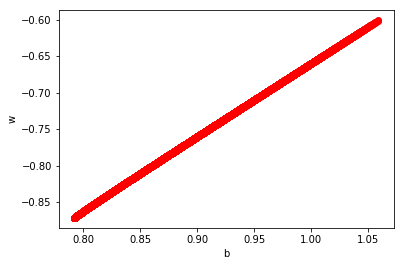

In [27]:
plt.plot(b_history, w_history, 'o-', color = 'red')
plt.xlabel('b')
plt.ylabel('w')
plt.show()

# Visualiaze the Loss
The loss value stopped changing dramatically after the second iteration so I only plotted the first 10 iterations.

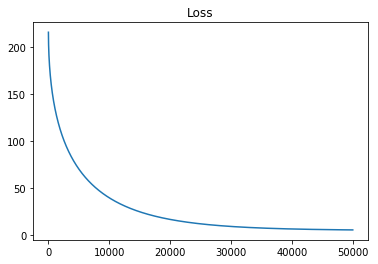

In [28]:
# visualize the loss
fig = plt.figure()
plt.title("Loss")
plt.plot(range(0,iteration), loss_history[0:iteration])    
plt.show()

# Denomalize *w* and *b*

In [29]:
def denomalization(x, y, w, b):
    A = max(y)-min(y)
    B = max(x)-min(x)
    den_w = (w*A)/B
    den_b = -1*((A*w*min(x))/B)+(A*b)+min(y)
    return den_w, den_b

In [30]:
x_output = att['Salnty'].loc[:batchSize].tolist()
y_output = att['T_degC'].loc[:batchSize].tolist()

res_w, res_b = denomalization(x_output, y_output, w, b)
res_w, res_b

(-7.328380330919994, 255.34919785678164)

# Plot the result

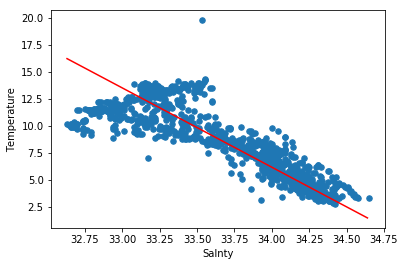

In [31]:
# x_output = att['nor_Salnty'].loc[:batchSize].tolist()
# y_output = att['T_degC'].loc[:batchSize].tolist()

plt.scatter(x_output, y_output, s = 30)
plt.xlabel('Salnty')
plt.ylabel('Temperature')

x_ = np.arange(min(x_output), max(x_output), 0.01)
y_ = res_w*x_ + res_b

# predicted fucntion 
plt.plot(x_, y_, color = 'red')
plt.show()